# MCF7 - SmartSeq - EDA

### Introduction

Our experiment aims to analyze how gene expression patterns in cells are affected by different oxygen environments, specifically normoxia (normal oxygen levels) and hypoxia (reduced oxygen levels). Understanding the impact of oxygen availability on gene expression is crucial, as it plays a fundamental role in various biological processes, including cellular metabolism, development, and disease progression. By investigating the changes in gene expression under normoxic and hypoxic conditions, we can gain insights into the molecular mechanisms that cells employ to adapt and survive in low oxygen environments.

To achieve this, we will utilize two advanced sequencing methods: Smart-Seq and Drop-Seq. These methods enable us to capture the gene expression profiles of individual cells with high resolution, allowing us to examine the heterogeneity within cell populations and identify subtle transcriptional changes induced by oxygen levels. By applying these techniques to our two selected cell lines, HCC1086 and MCF7, we aim to investigate the specific responses of liver cancer cells and breast cancer cells to changes in oxygen availability.

HCC1086 is derived from hepatocellular carcinoma, the most prevalent form of liver cancer. This aggressive malignancy is characterized by uncontrolled growth and the ability to invade surrounding tissues. Understanding the alterations in gene expression patterns associated with hypoxia in HCC1086 cells is of great importance, as hypoxia is a common feature of the tumor microenvironment and has been linked to tumor progression, metastasis, and resistance to therapy in liver cancer.

On the other hand, MCF7 is a widely studied cell line that originates from human breast adenocarcinoma. Breast cancer is a complex disease with diverse subtypes and variable responses to treatment. Investigating the influence of oxygen levels on the gene expression profiles of MCF7 cells can provide valuable insights into the adaptive mechanisms of breast cancer cells under hypoxic conditions. This knowledge may contribute to the development of novel therapeutic strategies targeting hypoxia-related pathways in breast cancer.

The data provided for our analysis is structured as .csv tables, with each column representing a single sequenced cell. The cell is identified by a specific name that includes information about its growth condition (normoxia or hypoxia). Each row in the table corresponds to a gene, identified by its unique gene symbol. This structured data format allows us to efficiently analyze and compare the gene expression levels across different cells and conditions.

By following an experimental approach, we will perform EDA, unsupervised and supervised learning. Our project aims to unravel the transcriptional changes associated with normoxia and hypoxia in HCC1086 and MCF7 cell lines.

### Python libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
import sys
import sklearn

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.decomposition import PCA

## Exploratory data analysis

### Meta data

We read the file with the meta data:

In [2]:
data_meta = pd.read_csv("/Users/ela/Documents/AI_LAB/SmartSeq/MCF7_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(data_meta))
print("First column: ", data_meta.iloc[ : , 0])

Dataframe dimensions: (383, 8)
First column:  Filename
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      MCF7
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      MCF7
                                                            ... 
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    MCF7
Name: Cell Line, Length: 383, dtype: object


Let's verify that there are no duplicate cell names in the data_meta dataset:

In [3]:
names = [i for i in data_meta["Cell name"]]
assert len(names) == len(set(names))

In [4]:
data_meta.head()

Cell Line           Lane  \
Filename                                                                      
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....      MCF7  output.STAR.1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....      MCF7  output.STAR.1   

                                                    Pos Condition  Hours  \
Filename                                                                   
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  A10      Hypo     72   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  A11      Hypo     72   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  A12      Hypo     72   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....   A1      Norm     72   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....   A2      Norm     72   

                                                   Cell name  \
Filename                                                       
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       S28   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       S29   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       S30   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....        S1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....        S2   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....  STAR,FeatureCounts  
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  STAR,FeatureCounts

Each row represents a cell and the columns are: 
- CELL LINE: MCF7 is a cell line derived from breast tumor tissue, so a population of cells that are derived from a single cell source and have been cultured and proliferated under laboratory conditions;
- PCR PLATE: the number of the plate that was used to run the PCR reactions for the DNA of that cell (PCA is a technique used in molecular biology to amplify a specific segment of DNA);
- POS: the position of the cell;
- CONDITION: Normoxia (normal level of oxygen) or Hypoxia (low level of oxygen)  
- HOURS: time the experiment was carried out;
- CELL NAME (all the cells are different);
- PREPROCESSING: info about preprocessing pipeline;
- PROCESSINGCOMMENTS: comments on processing.

In [5]:
data_meta.describe(include='all')

Cell Line           Lane  Pos Condition  Hours Cell name  \
count        383            383  383       383  383.0       383   
unique         1              4   98         2    NaN       383   
top         MCF7  output.STAR.1  A10      Norm    NaN       S28   
freq         383             96    4       192    NaN         1   
mean         NaN            NaN  NaN       NaN   72.0       NaN   
std          NaN            NaN  NaN       NaN    0.0       NaN   
min          NaN            NaN  NaN       NaN   72.0       NaN   
25%          NaN            NaN  NaN       NaN   72.0       NaN   
50%          NaN            NaN  NaN       NaN   72.0       NaN   
75%          NaN            NaN  NaN       NaN   72.0       NaN   
max          NaN            NaN  NaN       NaN   72.0       NaN   

                     PreprocessingTag  ProcessingComments  
count                             383                 383  
unique                              1                   1  
top     Aligned.sortedByCoord.out.bam  STAR,FeatureCounts  
freq                              383                 383  
mean                              NaN                 NaN  
std                               NaN                 NaN  
min                               NaN                 NaN  
25%                               NaN                 NaN  
50%                               NaN                 NaN  
75%                               NaN                 NaN  
max                               NaN                 NaN

In [6]:
print(data_meta.isnull().sum())
for i in data_meta.isnull().sum():
    assert i == 0

Cell Line             0
Lane                  0
Pos                   0
Condition             0
Hours                 0
Cell name             0
PreprocessingTag      0
ProcessingComments    0
dtype: int64


There are no missing values.

*Repeating the same steps for HCC1806 SmartSeq experiment (so the same experiment on another cell line), we obtain a similar result but with dataframe dimensions = (243, 8): we have 243 cells with no duplicates and no missing values in the table.*

### Importing data - MCF7 SmartSeq experiment

We read the file with the MCF7 SmartSeq experiment dataset:

In [7]:
data = pd.read_csv("/Users/ela/Documents/AI_LAB/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(data))
print("First column: ", data.iloc[ : , 0])

Dataframe dimensions: (22934, 383)
First column:  "WASH7P"         0
"MIR6859-1"      0
"WASH9P"         1
"OR4F29"         0
"MTND1P23"       0
              ... 
"MT-TE"          4
"MT-CYB"       270
"MT-TT"          0
"MT-TP"          5
"MAFIP"          8
Name: "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam", Length: 22934, dtype: int64


We transpose the original dataframe to have the cells in the rows and the genes as features in the columns.
We also remove the double quotes in the  features' names to simplify the indexing.

In [8]:
def remove_double_quotes(word):
    return word.replace('"', '')

In [9]:
data = data.rename(columns={"{}".format(i):"{}".format(remove_double_quotes(i)) for i in data.columns})
data = data.T
data = data.rename(columns={"{}".format(i):"{}".format(remove_double_quotes(i)) for i in data.columns})
print("Dataframe dimesions:", np.shape(data))

Dataframe dimesions: (383, 22934)


*HCC1806 SmartSeq experiment: we have a dataframe of dimesions: (243, 23396).*

#### Data Structure and Type

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam to output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
Columns: 22934 entries, WASH7P to MAFIP
dtypes: int64(22934)
memory usage: 67.0+ MB


In [11]:
data.head()

WASH7P  MIR6859-1  WASH9P  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       0          0       1   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       0          0       0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       0          0       0   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....       0          0       0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....       0          0       0   

                                                    OR4F29  MTND1P23  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       0         0   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       0         0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       0         0   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....       0         0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....       0         0   

                                                    MTND2P28  MTCO1P12  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...         2         2   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...         0         0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...         1         1   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....         0         0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....         0         0   

                                                    MTCO2P12  MTATP8P1  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...         0         0   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...         0         0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...         1         0   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....         0         0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....         0         0   

                                                    MTATP6P1  ...  MT-TH  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...        29  ...      0   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...         0  ...      1   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...        12  ...      0   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....         7  ...      1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....        68  ...      0   

                                                    MT-TS2  MT-TL2  MT-ND5  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       0       0     505   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       1       0       1   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       0       0       1   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....       0       0      44   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....       0       0     237   

                                                    MT-ND6  MT-TE  MT-CYB  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...     147      4     270   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       0      0       1   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       0      0      76   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....       8      0      66   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....      31      3     727   

                                                    MT-TT  MT-TP  MAFIP  
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...      0      5      8  
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...      0      0      0  
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...      0      0      0  
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....      0      1      0  
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....      0      0      0  

[5 rows x 22934 columns]

In [12]:
print(data.dtypes)
for i in data.dtypes:
    assert i == "int64"

WASH7P       int64
MIR6859-1    int64
WASH9P       int64
OR4F29       int64
MTND1P23     int64
             ...  
MT-TE        int64
MT-CYB       int64
MT-TT        int64
MT-TP        int64
MAFIP        int64
Length: 22934, dtype: object


In [13]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
all_numeric = len(numeric_columns) == len(data.columns)

print(all_numeric)

True


All data are numerical, there are NO categorical data.

In [14]:
desc_table = data.describe()
desc_table

WASH7P   MIR6859-1      WASH9P     OR4F29    MTND1P23    MTND2P28  \
count  383.000000  383.000000  383.000000  383.00000  383.000000  383.000000   
mean     0.133159    0.026110    1.344648    0.05483    0.049608    6.261097   
std      0.618664    0.249286    2.244543    0.31477    0.229143    7.565749   
min      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.00000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.00000    0.000000    3.000000   
75%      0.000000    0.000000    2.000000    0.00000    0.000000   10.000000   
max      9.000000    4.000000   20.000000    3.00000    2.000000   45.000000   

         MTCO1P12    MTCO2P12    MTATP8P1     MTATP6P1  ...       MT-TH  \
count  383.000000  383.000000  383.000000   383.000000  ...  383.000000   
mean     4.681462    0.524804    0.073107   222.054830  ...    1.060052   
std      6.232649    0.980857    0.298131   262.616874  ...    1.990566   
min      0.000000    0.000000    0.000000     0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    23.000000  ...    0.000000   
50%      2.000000    0.000000    0.000000    98.000000  ...    0.000000   
75%      7.000000    1.000000    0.000000   370.500000  ...    1.000000   
max     36.000000    6.000000    2.000000  1662.000000  ...   15.000000   

           MT-TS2      MT-TL2       MT-ND5       MT-ND6       MT-TE  \
count  383.000000  383.000000   383.000000   383.000000  383.000000   
mean     0.443864    3.146214  1016.477807   204.600522    5.049608   
std      1.090827    4.265352  1009.444811   220.781927    6.644302   
min      0.000000    0.000000     0.000000     0.000000    0.000000   
25%      0.000000    0.000000   172.000000    30.500000    0.000000   
50%      0.000000    1.000000   837.000000   152.000000    3.000000   
75%      0.000000    5.000000  1549.000000   294.000000    7.000000   
max      8.000000   22.000000  8115.000000  2002.000000   46.000000   

            MT-CYB       MT-TT       MT-TP       MAFIP  
count    383.00000  383.000000  383.000000  383.000000  
mean    2374.97389    2.083551    5.626632    1.749347  
std     2920.39000    3.372714    7.511180    3.895204  
min        0.00000    0.000000    0.000000    0.000000  
25%      216.50000    0.000000    0.000000    0.000000  
50%      785.00000    0.000000    3.000000    0.000000  
75%     4059.00000    3.000000    8.000000    2.000000  
max    16026.00000   22.000000   56.000000   32.000000  

[8 rows x 22934 columns]

In [15]:
print("Global max is:", desc_table.loc["max"].max())
print("Global min is:", desc_table.loc["min"].min())

Global max is: 190556.0
Global min is: 0.0


At first glance, the dataset seems to have a lot of 0 entries and some big numbers (outliers). We will deal with sparsity and outliers in the next sections.

In [16]:
print(data.isnull().sum())
for i in data.isnull().sum():
    assert i == 0

WASH7P       0
MIR6859-1    0
WASH9P       0
OR4F29       0
MTND1P23     0
            ..
MT-TE        0
MT-CYB       0
MT-TT        0
MT-TP        0
MAFIP        0
Length: 22934, dtype: int64


There are no missing values.

*HCC1806 SmartSeq experiment: same results but with 210944.0 as global max.*

#### Duplicate genes

The duplicated() function in pandas is used to identify duplicate rows in a DataFrame or Series.
To see which genes are redundant, we take data.T.duplicated() that returns a boolean Series indicating which rows of data.T (columns of data) are duplicated.

In [17]:
duplicate_data = data.T[data.T.duplicated()]
print("Number of duplicate genes:", duplicate_data.shape[0], "over", data.T.shape[0])
print("Percentage of duplicate genes:", (duplicate_data.shape[0] * 100) / (data.T.shape[0]), "%")

Number of duplicate genes: 29 over 22934
Percentage of duplicate genes: 0.12644981250545043 %


Since we have duplicate genes, we need to understand which ones are equal to each other. To do so, we use a correlation matrix of duplicate genes.

In [18]:
duplicate_rows_df_t = duplicate_data.T
duplicate_rows_df_t
c_dupl = duplicate_rows_df_t.corr()
c_dupl

KLF2P3    UGT1A9  SLC22A14  COQ10BP2    LAP3P2   GALNT17  \
KLF2P3     1.000000 -0.014798 -0.008333 -0.008333 -0.032300 -0.007903   
UGT1A9    -0.014798  1.000000 -0.009322 -0.009322 -0.008675 -0.008841   
SLC22A14  -0.008333 -0.009322  1.000000  0.497375 -0.020348  0.948434   
COQ10BP2  -0.008333 -0.009322  0.497375  1.000000 -0.020348  0.630630   
LAP3P2    -0.032300 -0.008675 -0.020348 -0.020348  1.000000 -0.019299   
GALNT17   -0.007903 -0.008841  0.948434  0.630630 -0.019299  1.000000   
PON1      -0.007903 -0.008841  0.948434  0.630630 -0.019299  1.000000   
MIR664B   -0.007142 -0.007990 -0.004499 -0.004499 -0.017440 -0.004267   
KCNS2     -0.008333 -0.009322  0.497375  0.497375 -0.020348  0.630630   
MIR548D1  -0.007903 -0.008841 -0.004979 -0.004979 -0.019299 -0.004722   
STRA6LP    0.173251  0.031704 -0.022850  0.001061  0.050458 -0.021672   
MUC6      -0.007656 -0.008565  0.654887  0.654887 -0.018695  0.829681   
LINC00595 -0.012177 -0.013622 -0.007671 -0.007671 -0.029734 -0.007275   
CACYBPP1  -0.008333 -0.009322 -0.005249 -0.005249 -0.020348 -0.004979   
KNOP1P1   -0.011158 -0.012483 -0.007029 -0.007029 -0.027247 -0.006667   
WDR95P    -0.007903 -0.008841  0.948434  0.312826 -0.019299  0.799056   
MIR19B1   -0.007903 -0.008841 -0.004979 -0.004979  0.156686 -0.004722   
RNU6-539P -0.008333 -0.009322 -0.005249 -0.005249 -0.020348 -0.004979   
SNURF     -0.008333 -0.009322 -0.005249 -0.005249 -0.020348 -0.004979   
RBFOX1    -0.008333 -0.009322  0.497375  0.497375 -0.020348  0.630630   
ASPA      -0.007903 -0.008841  0.630630  0.630630 -0.019299  0.799056   
BCL6B     -0.008333 -0.009322  0.497375  0.497375 -0.020348  0.630630   
CCL3L1    -0.012088 -0.013523 -0.007615 -0.007615 -0.013474 -0.007222   
OTOP3     -0.006928 -0.007750  0.831379  0.134926 -0.016917  0.612365   
RNA5SP450 -0.008333 -0.009322 -0.005249 -0.005249 -0.020348 -0.004979   
PSG1      -0.008333 -0.009322  0.497375  0.497375 -0.020348  0.630630   
MIR3191   -0.008333 -0.009322 -0.005249 -0.005249  0.118817 -0.004979   
SEZ6L     -0.006775 -0.007579  0.813013  0.112487 -0.016543  0.586533   
ADAMTS5   -0.007903 -0.008841  0.630630  0.630630 -0.019299  0.799056   

               PON1   MIR664B     KCNS2  MIR548D1  ...    RBFOX1      ASPA  \
KLF2P3    -0.007903 -0.007142 -0.008333 -0.007903  ... -0.008333 -0.007903   
UGT1A9    -0.008841 -0.007990 -0.009322 -0.008841  ... -0.009322 -0.008841   
SLC22A14   0.948434 -0.004499  0.497375 -0.004979  ...  0.497375  0.630630   
COQ10BP2   0.630630 -0.004499  0.497375 -0.004979  ...  0.497375  0.630630   
LAP3P2    -0.019299 -0.017440 -0.020348 -0.019299  ... -0.020348 -0.019299   
GALNT17    1.000000 -0.004267  0.630630 -0.004722  ...  0.630630  0.799056   
PON1       1.000000 -0.004267  0.630630 -0.004722  ...  0.630630  0.799056   
MIR664B   -0.004267  1.000000 -0.004499 -0.004267  ... -0.004499 -0.004267   
KCNS2      0.630630 -0.004499  1.000000 -0.004979  ...  0.497375  0.630630   
MIR548D1  -0.004722 -0.004267 -0.004979  1.000000  ... -0.004979 -0.004722   
STRA6LP   -0.021672 -0.015486 -0.022850  0.069042  ... -0.022850 -0.021672   
MUC6       0.829681 -0.004134  0.654887 -0.004574  ...  0.654887  0.829681   
LINC00595 -0.007275 -0.006575 -0.007671 -0.007275  ... -0.007671 -0.007275   
CACYBPP1  -0.004979 -0.004499 -0.005249 -0.004979  ... -0.005249 -0.004979   
KNOP1P1   -0.006667 -0.006025 -0.007029 -0.006667  ... -0.007029 -0.006667   
WDR95P     0.799056 -0.004267  0.312826 -0.004722  ...  0.312826  0.397167   
MIR19B1   -0.004722 -0.004267 -0.004979 -0.004722  ... -0.004979 -0.004722   
RNU6-539P -0.004979 -0.004499 -0.005249 -0.004979  ... -0.005249 -0.004979   
SNURF     -0.004979 -0.004499 -0.005249 -0.004979  ... -0.005249 -0.004979   
RBFOX1     0.630630 -0.004499  0.497375 -0.004979  ...  1.000000  0.630630   
ASPA       0.799056 -0.004267  0.630630 -0.004722  ...  0.630630  1.000000   
BCL6B      0.630630 -0.004499  1.000000 -0.004979  ...  0.497375  0.630630   
CCL3L1    -0.007222  0.00795

In [19]:
data_noDup = data.T.drop_duplicates(inplace=False)
data_noDup.T

WASH7P  MIR6859-1  WASH9P  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       0          0       1   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       0          0       0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       0          0       0   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....       0          0       0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....       0          0       0   
...                                                    ...        ...     ...   
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...       0          0       0   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...       0          0       1   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...       1          0       1   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...       0          0       4   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...       1          0       5   

                                                    OR4F29  MTND1P23  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       0         0   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       0         0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       0         0   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....       0         0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....       0         0   
...                                                    ...       ...   
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...       0         0   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...       0         0   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...       0         0   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...       1         0   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...       0         0   

                                                    MTND2P28  MTCO1P12  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...         2         2   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...         0         0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...         1         1   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....         0         0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....         0         0   
...                                                      ...       ...   
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...         0         1   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...         2         5   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...         7         0   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...        29         4   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...         5         3   

                                                    MTCO2P12  MTATP8P1  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...         0         0   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...         0         0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...         1         0   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....         0         0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....         0         0   
...                                                      ...       ...   
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...         0         0   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...         5         0   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...         0         0   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...         0         0   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...         0         0   

                                                    MTATP6P1  ...  MT-TH  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...        29  ...      0   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...         0  ...      1   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...        12  ...      0   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....         7  ...      1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....      

In [20]:
data_noDup.T.shape

(383, 22905)

In [21]:
assert ((data.shape[1] - data_noDup.T.shape[1]) == duplicate_data.shape[0])

In [22]:
data = data_noDup.T

*HCC1806 SmartSeq experiment: the umber of duplicate genes is 54 over 23396. Therefore, after we remove the duplicates, the shape of tha dataset will be (243, 23342).*

#### Correlation between cells

To study the correlation between different cells, we compute the correlation matrix and plot a heatmap in order to visualize it.

Number of cells included:  (383, 383)
Average correlation of expression profiles between cells:  0.49898217617448165
Min. correlation of expression profiles between cells:  -0.002035647651036618


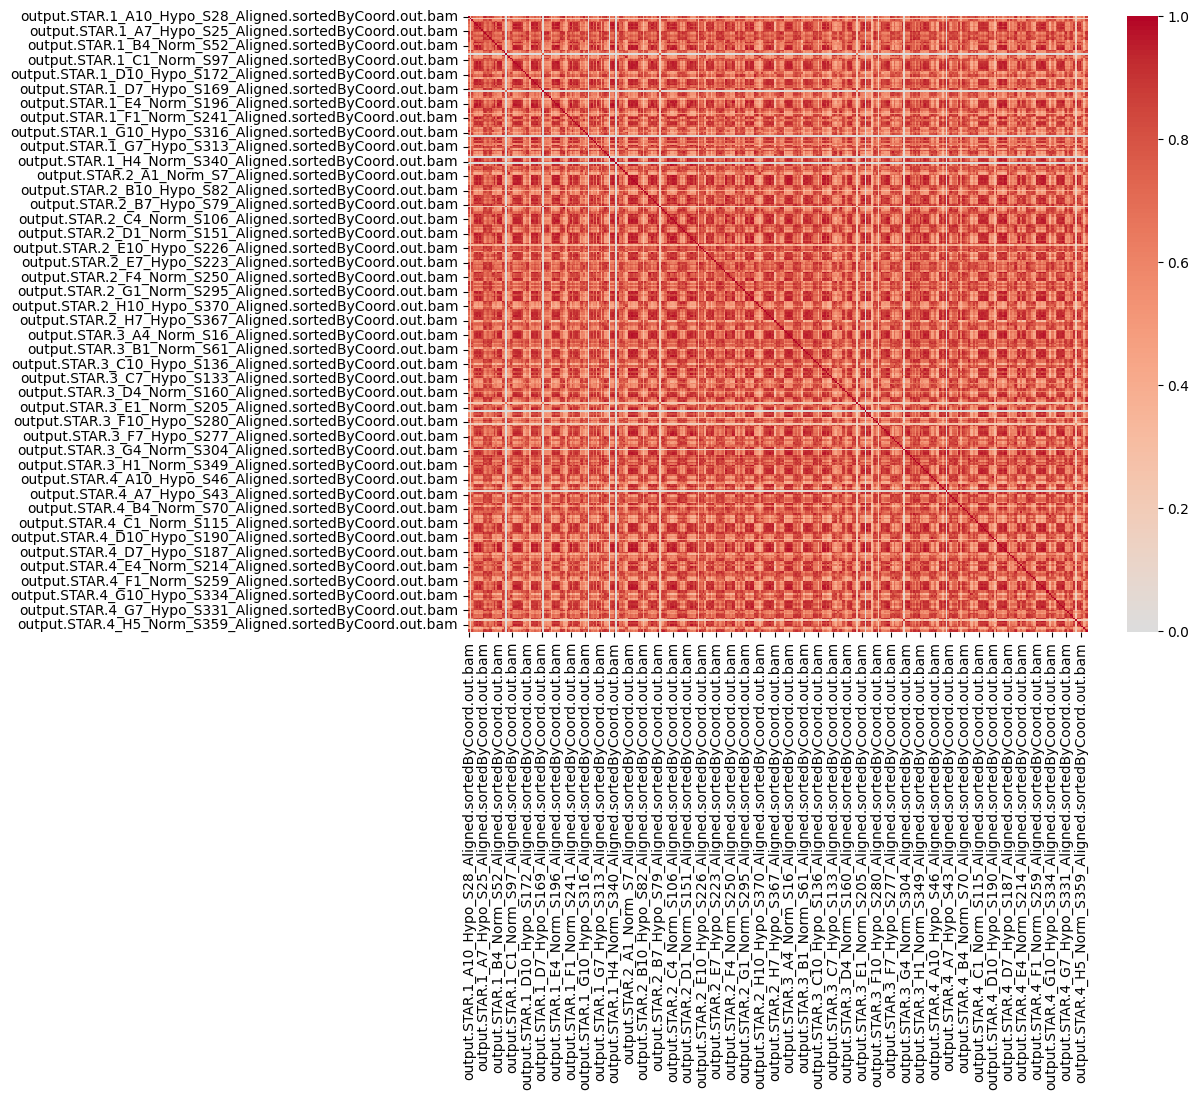

In [23]:
plt.figure(figsize=(10,8))
c= data.T.corr()                   # it computes the correlation between the columns of data.T (the cells)
midpoint = (c.values.max() - c.values.min()) /2 + c.values.min()              # calculates the average correlation value between the expression profiles of cells (find the maximum and minimum correlation values in the c matrix and computes the average of these two values)
sns.heatmap(c,cmap='coolwarm', center=0)               # correlation matrix c as input and applies the colormap 'coolwarm'. The center=0 argument sets the midpoint of the colormap at zero, so positive and negative correlations are shown with different colors
print("Number of cells included: ", np.shape(c))
print("Average correlation of expression profiles between cells: ", midpoint)
print("Min. correlation of expression profiles between cells: ", c.values.min())

Looking at the previous map, we can notice that some cells have very low correlation values. We now try to further investigate why this happens.

We first visualize the previous plot only for some of the cells, in order to select two cells that have low correlation values with all others and two of them that show high correlation values.


In [24]:
data_subset = data.iloc[:20, :]

Number of cells included:  (20, 20)


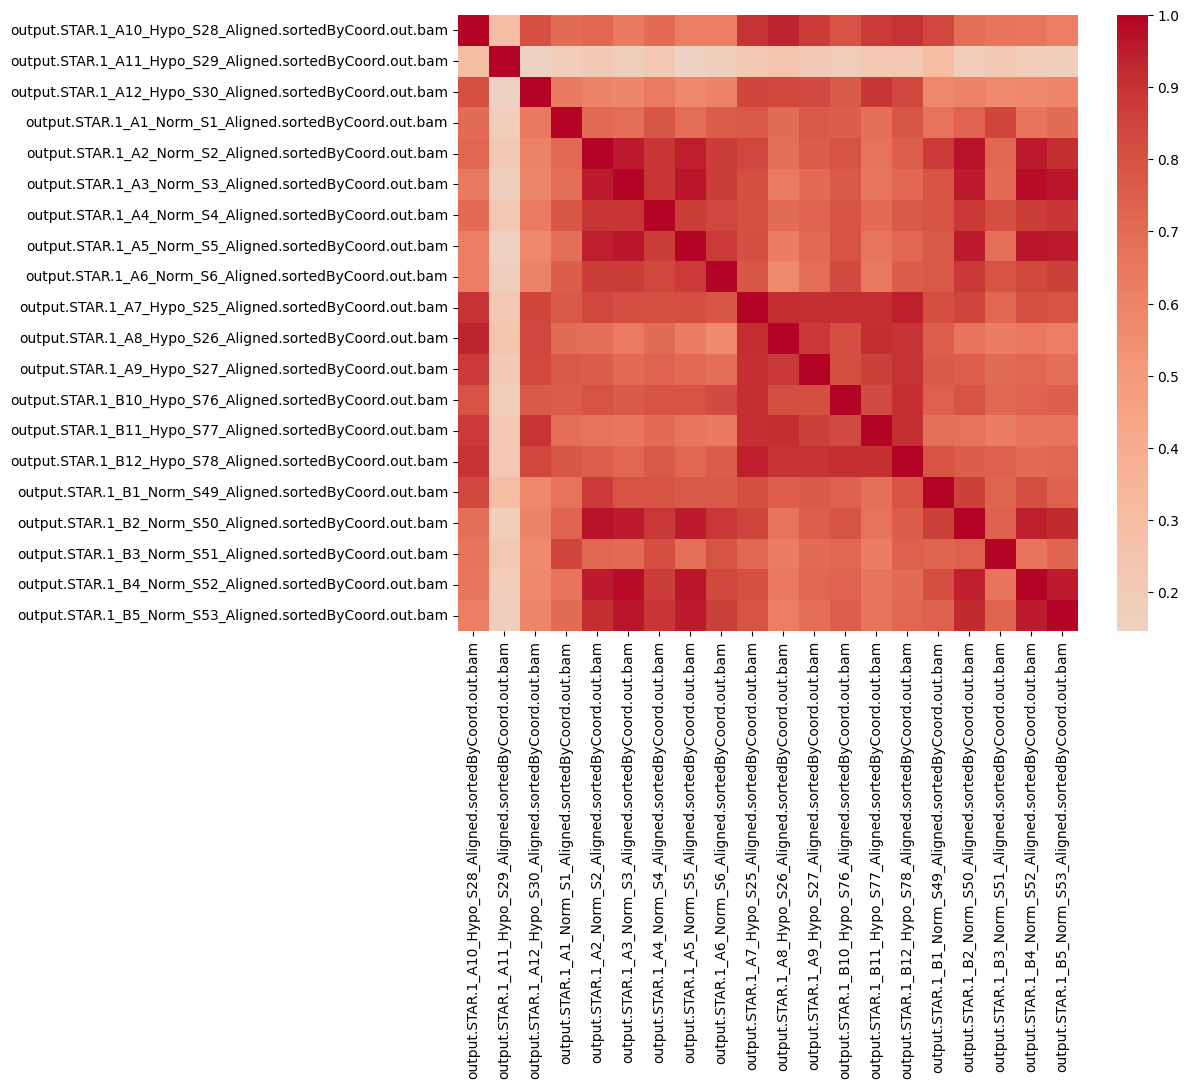

In [25]:
plt.figure(figsize=(10,8))
c= data_subset.T.corr()                   # it computes the correlation between the columns of data.T (the cells)
midpoint = (c.values.max() - c.values.min()) /2 + c.values.min()              # calculates the average correlation value between the expression profiles of cells (find the maximum and minimum correlation values in the c matrix and computes the average of these two values)
sns.heatmap(c,cmap='coolwarm', center=0)               # correlation matrix c as input and applies the colormap 'coolwarm'. The center=0 argument sets the midpoint of the colormap at zero, so positive and negative correlations are shown with different colors
print("Number of cells included: ", np.shape(c))

In [26]:
data_subset_1 = data.iloc[30:60, :]

Number of cells included:  (30, 30)


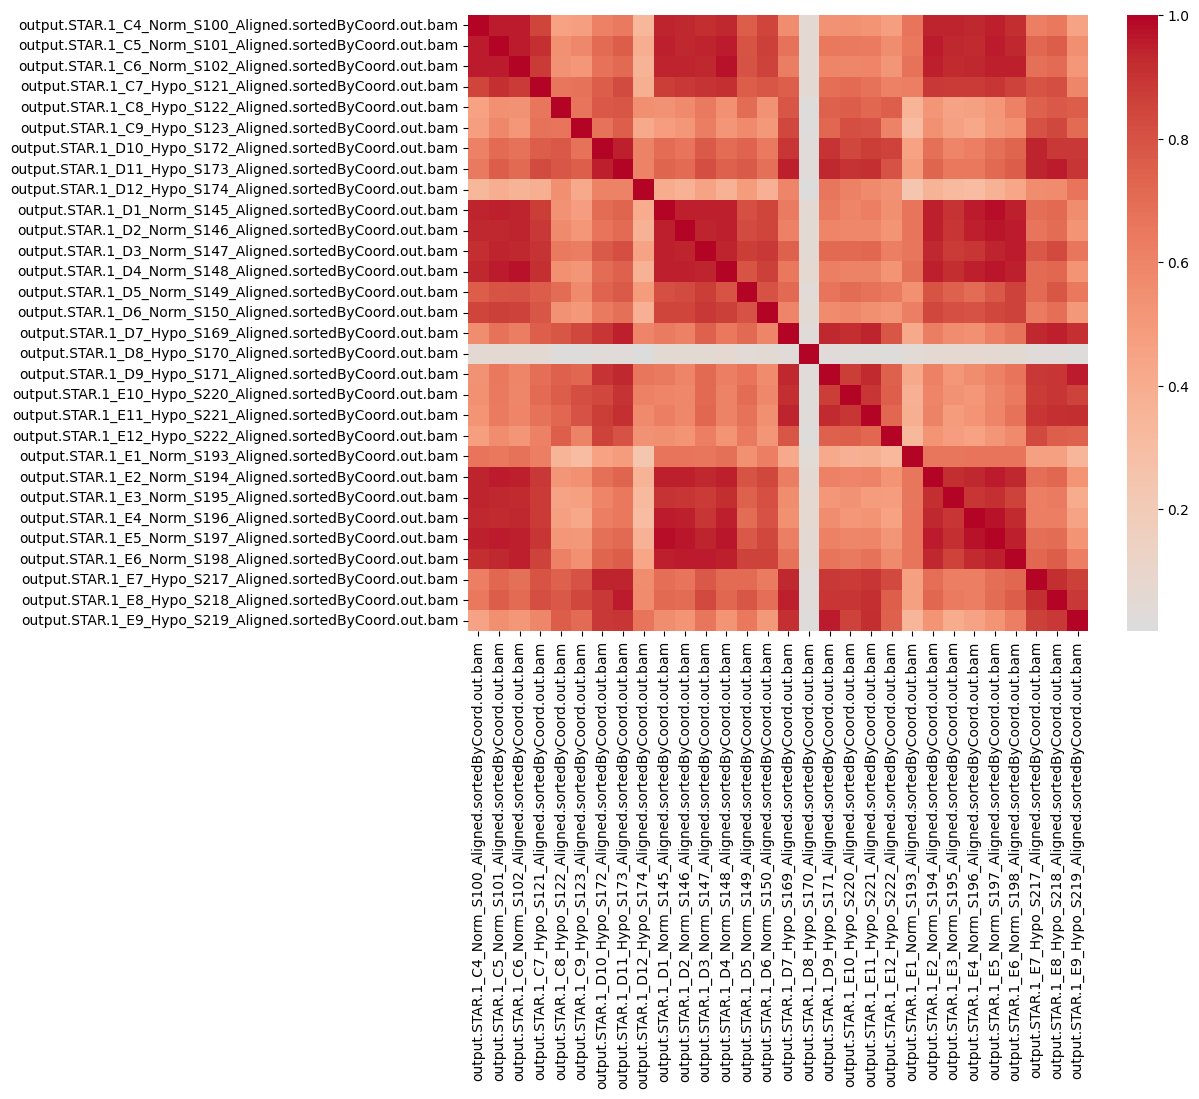

In [27]:
plt.figure(figsize=(10,8))
c= data_subset_1.T.corr()                   # it computes the correlation between the columns of data.T (the cells)
midpoint = (c.values.max() - c.values.min()) /2 + c.values.min()              # calculates the average correlation value between the expression profiles of cells (find the maximum and minimum correlation values in the c matrix and computes the average of these two values)
sns.heatmap(c,cmap='coolwarm', center=0)               # correlation matrix c as input and applies the colormap 'coolwarm'. The center=0 argument sets the midpoint of the colormap at zero, so positive and negative correlations are shown with different colors
print("Number of cells included: ", np.shape(c))

In [28]:
# Cells WITHOUT correlation
cell_1_nocorr = 'output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam'
cell_2_nocorr = 'output.STAR.1_D8_Hypo_S170_Aligned.sortedByCoord.out.bam'

# Cells WITH correlation
cell_3_corr = 'output.STAR.1_C4_Norm_S100_Aligned.sortedByCoord.out.bam'
cell_4_corr = 'output.STAR.4_B4_Norm_S70_Aligned.sortedByCoord.out.bam'

Let's try to visualize their gene expression through their violin plots:

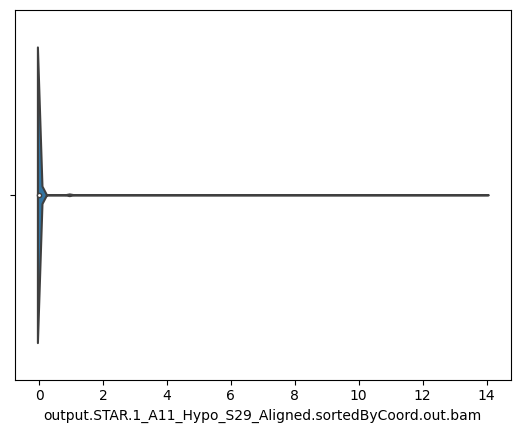

In [29]:
sns.violinplot(x=data.loc[cell_1_nocorr])
plt.show()

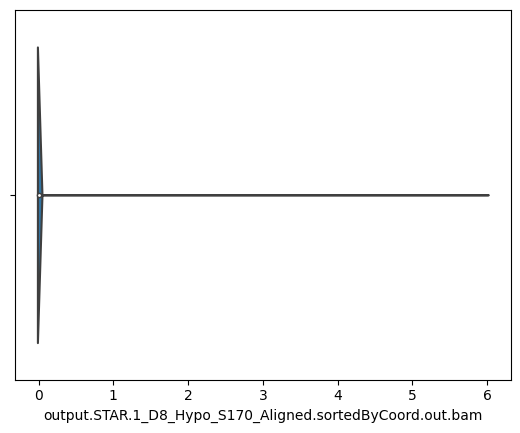

In [30]:
sns.violinplot(x= data.loc[cell_2_nocorr])
plt.show()

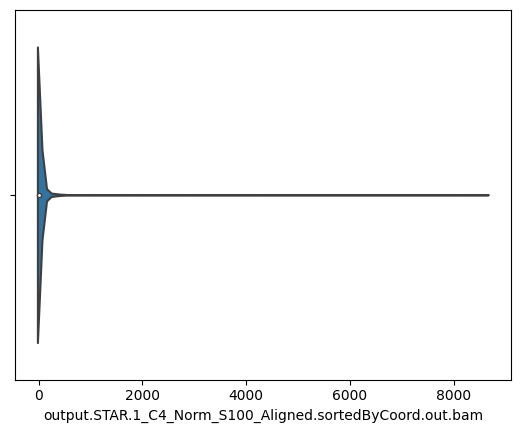

In [31]:
sns.violinplot(x= data.loc[cell_3_corr])
plt.show()

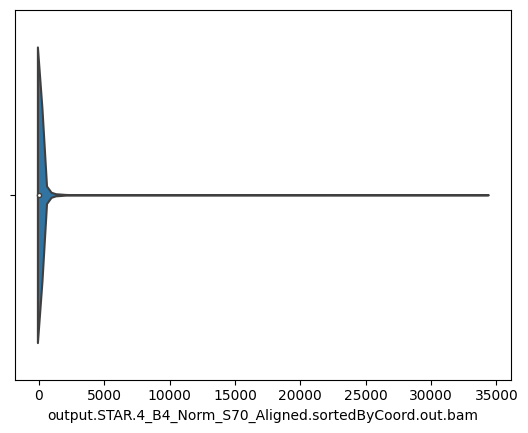

In [32]:
sns.violinplot(x= data.loc[cell_4_corr])
plt.show()

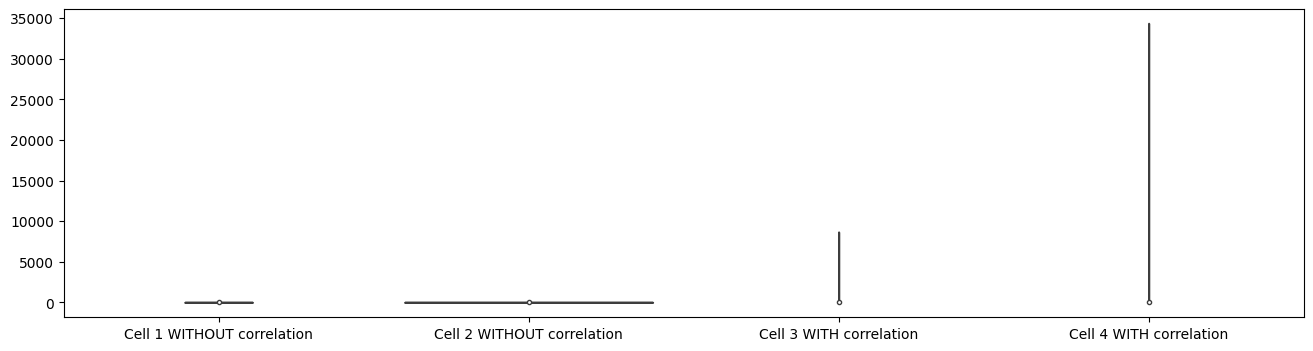

In [33]:
row1_values = data.loc[cell_1_nocorr]
row2_values = data.loc[cell_2_nocorr]
row3_values = data.loc[cell_3_corr]
row4_values = data.loc[cell_4_corr]

# Step 4: Create a new DataFrame using the selected rows
elem = pd.DataFrame({ 'Cell 1 WITHOUT correlation': row1_values, 'Cell 2 WITHOUT correlation': row2_values, 'Cell 3 WITH correlation': row3_values, 'Cell 4 WITH correlation': row4_values})

# Step 5: Plot the violin plot

plt.figure(figsize=(16,4))
sns.violinplot(data=elem)
plt.show()

After the visualization of the plots, we can deduce that the cells that show no correlation at all are the ones that express few genes.
We will need to remove them later.

#### Outliers

Let's try identify the number of outliers and the percentage over the total, assuming that an outlier falls in the 20th quantile (above 95%)

To find the outliers, we compute the 25th percentile Q1 (the value below which 25% of the data falls) and the 75th percentile Q3 (the value below which 75% of the data falls) for each column and find the interquartile range, that is a measure of the spread of the middle 50% of the data used to identify outliers.

In [34]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

WASH7P          0.0
MIR6859-1       0.0
WASH9P          2.0
OR4F29          0.0
MTND1P23        0.0
              ...  
MT-TE           7.0
MT-CYB       3842.5
MT-TT           3.0
MT-TP           8.0
MAFIP           2.0
Length: 22905, dtype: float64


In [35]:
IQR.value_counts()

0.0       10616
1.0         606
2.0         354
3.0         281
4.0         251
          ...  
373.5         1
324.0         1
572.0         1
692.5         1
3842.5        1
Length: 992, dtype: int64

We can see that many genes have an interquartile range of 0.

In [36]:
data_noOut = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_noOut.shape)

(4, 22905)



Considering as outliers the elements of value beyond 1.5 * IQR, if we remove any of these rows/cells, we will remove all values below the first quartile (Q1) or above the third quartile (Q3), so we will obtain a dataset with very few remaining datapoints. We thus should proceed in another way.

*HCC1806 SmartSeq experiment: we would obtain a resulting dataframe of dimensions (0, 23342), therefore an empty one.*

We could try to compute the IQR of each row of the dataset: we transpose the dataset and proceed as above.

In [37]:
dataT = data.T
Q1 = dataT.quantile(0.25)
Q3 = dataT.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    17.0
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam     0.0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam     5.0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam       0.0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam       7.0
                                                            ... 
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam     9.0
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    27.0
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    30.0
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    38.0
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    33.0
Length: 383, dtype: float64


In [38]:
IQR.value_counts()

0.0     38
33.0    16
35.0    15
34.0    14
28.0    12
31.0    12
2.0     12
17.0    11
32.0    11
25.0    10
18.0    10
29.0    10
42.0     9
14.0     9
27.0     9
11.0     8
39.0     8
1.0      8
9.0      8
38.0     8
30.0     7
45.0     7
21.0     7
23.0     7
37.0     7
13.0     7
19.0     7
26.0     7
3.0      6
15.0     6
8.0      6
5.0      6
22.0     5
36.0     5
7.0      5
20.0     5
4.0      5
6.0      5
10.0     4
40.0     4
43.0     4
41.0     4
16.0     4
44.0     4
12.0     3
24.0     3
47.0     2
46.0     1
50.0     1
49.0     1
dtype: int64

In [39]:
data_noOut_T = dataT[~((dataT < (Q1 - 1.5 * IQR)) |(dataT > (Q3 + 1.5 * IQR))).any(axis=1)]
data_noOut = data_noOut_T.T
print(data_noOut.shape)

(383, 6424)


In [40]:
print("Difference of number of columns:", data.shape[1]-data_noOut.shape[1])

Difference of number of columns: 16481


In [41]:
print("Percentage of removed columns:", (data.shape[1]-data_noOut.shape[1])/data.shape[1]*100, "%")

Percentage of removed columns: 71.9537218947828 %


If we remove the rows that have outlier values in any column in the transposed dataset, so any column of the original dataset (gene) that has values that are more than 1.5 times the interquartile range (IQR) below the first quartile (Q1) or above the third quartile (Q3), we obtain a final dataframe with 6424 columns.
We therefore removed a total of 16481 genes, more than 70% of the genes.

*HCC1806 SmartSeq experiment: percentage of removed columns of 53.77431239825208 %, which is still very high.*

It is important to notice that outliers are to be treated very carefully in this case. An observation expresses the RNA sequencing counts, therefore a very high count value should not be treated as an error, but rather as an important indicator. We will investigate in one of the following sections whether removing outliers improves our results.

#### Visualizing the data

Let's try to gain more information about the dataset and how to treat the outliers. 
We do violin plots for some cell singularly (and randomly).

In [42]:
rows = list(data.index)

In [43]:
random.seed(88)

101


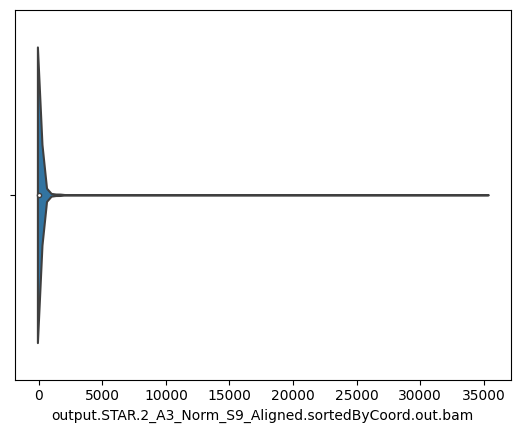

In [44]:
ind1 = random.randint(0,243)
print(ind1)
sns.violinplot(x= data.loc[rows[ind1]])
plt.show()

48


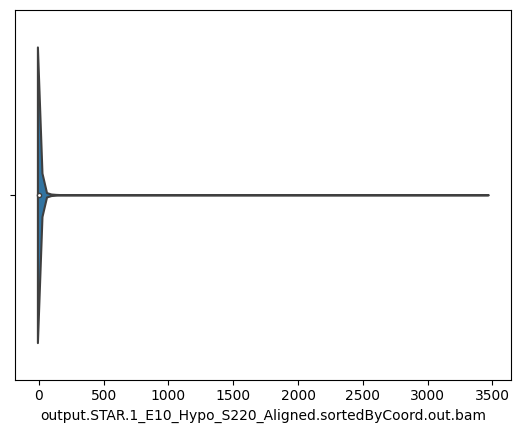

In [45]:
ind2 = random.randint(0,243)
print(ind2)
sns.violinplot(x= data.loc[rows[ind2]])
plt.show()

We can notice that, taking two randomly chosen cells, they have very similar plots:
- most of the values are concentrated around zero
- most of the values are relatively small, i.e. their order of magnitude is less than $10^3$  

However, maxima are considerably different.

Now we do a violin plot with all the cells.
To better viualize it we use as *xticks* labels the *cell name* attribute of each row (saved in the meta data).

For 50 cells:

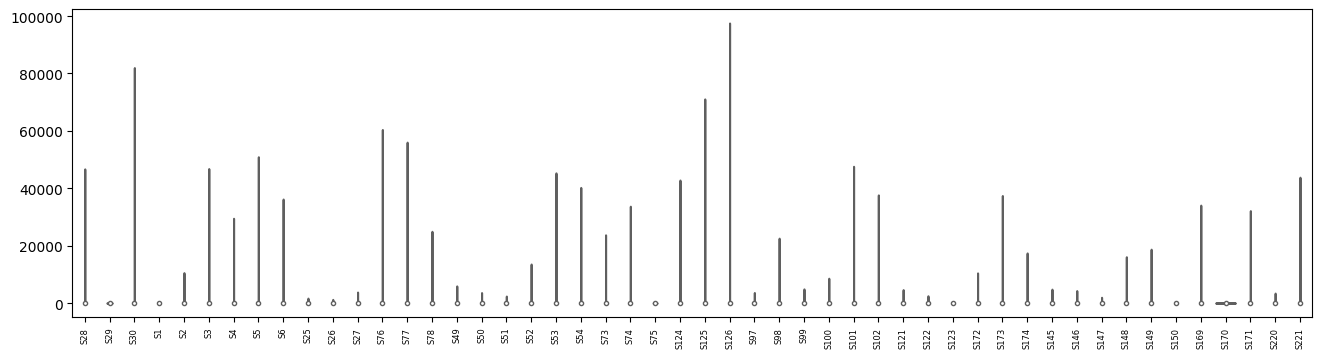

In [46]:
names = [i for i in data_meta["Cell name"]]      # get the cell name attribute of each cell

data_small = data.T.iloc[:, :50]  
names_small = names[:50]                # select 50 cells
plt.figure(figsize=(16,4))

plot=sns.violinplot(data=data_small, palette="Set3", cut=0)
plot.set_xticklabels(names_small, rotation=90, fontsize=6)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

Going back to the issue of outliers, let's plot the first 50 cells of the dataset without outliers:

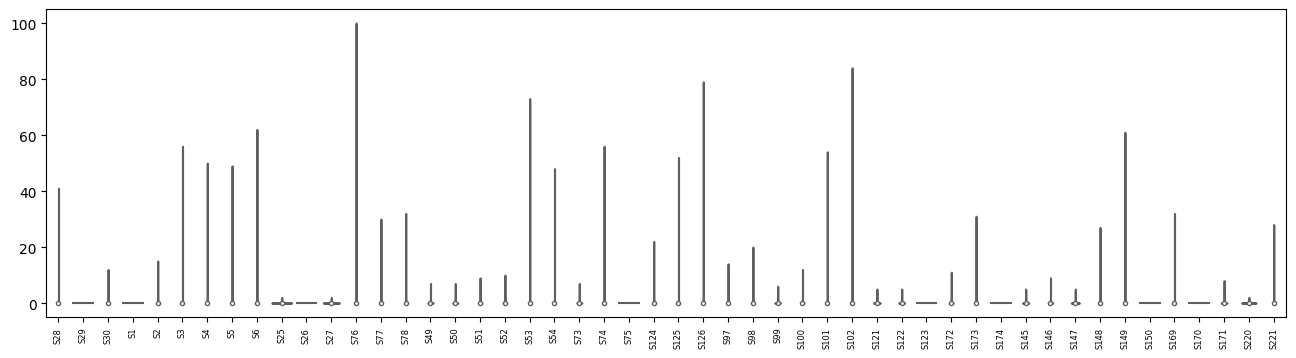

In [47]:
data_noOut_small = data_noOut.T.iloc[:, :50]
names_small = names[:50]
plt.figure(figsize=(16,4))

plot=sns.violinplot(data=data_noOut_small, palette="Set3", cut=0)
plot.set_xticklabels(names_small, rotation=90, fontsize=6)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()


Let's visualize the plot of the previously randomly chosen single cells excluding outliers: 

101


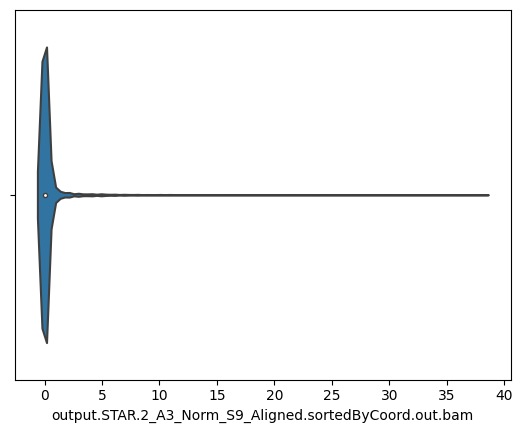

In [48]:
print(ind1)
sns.violinplot(x= data_noOut.loc[rows[ind1]])
plt.show()

48


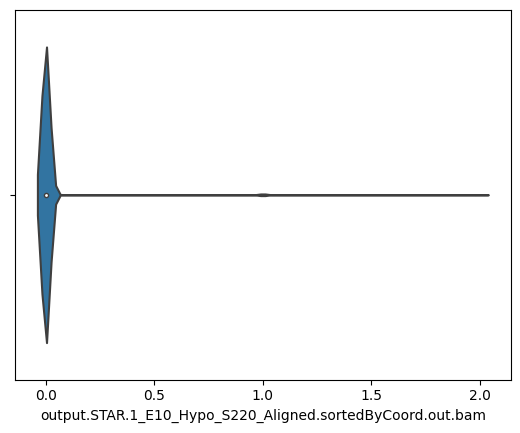

In [49]:
print(ind2)
sns.violinplot(x= data_noOut.loc[rows[ind2]])
plt.show()

From the previous plots we can deduce that, if we remove the outliers, the maxima take lower values but still we have a big amount of zeroes.

We can deduce that the dataset is sparse. Let's analyze this concept more in detail.

*HCC1806 SmartSeq experiment: similar results and same conclusion.*

#### Sparsity of data

Sparsity means that the matrix contains many zero values.

We can try to quantify sparsity of the dataset, calculating the proportion of zero values in the gene expression matrix as:

sparsity = (number of zeros) / (total number of elements in the matrix)


Let's compute this sparsity index for the original dataset:

In [50]:
n_zeros = np.count_nonzero(data==0)                # count the number of elements in the boolean mask (data == 0) that are true, so the number of 0 elements
print('Number of 0 values in the matrix:', n_zeros)

sp = n_zeros / data.size
print('Sparsity index:', sp*100, '%')

Number of 0 values in the matrix: 5278229
Sparsity index: 60.16711094696393 %


In the dataset without outliers, we obtain:

In [51]:
n_zeros_noout = np.count_nonzero(data_noOut==0)                # count the number of elements in the boolean mask (data == 0) that are true, so the number of 0 elements
print('Number of 0 values in the matrix:', n_zeros_noout)

sp_noout = n_zeros_noout / data_noOut.size
print('Sparsity index:', sp_noout*100, '%')

Number of 0 values in the matrix: 2349283
Sparsity index: 95.48409359159028 %


We can see that removing outliers is not a good idea, since sparsity is even higher than before. 

*HCC1806 SmartSeq experiment: the sparsity index of the original dataset is about 55.8 % and the one of the dataset without outliers is about 86.6 %, so the same conclusion holds.* 

Sparse data may lead to several problems for training a machine learning model (like over-fitting, lower performance of the models, etc.), so they should be handled properly.

Even considering the original dataset, the sparsity index underlines that more than half of the elements in the matrix is equal to 0, so the dataset is sparse.

Using *sparse matrix representation* can be advantageous in cases where the data is sparse. Indeed, sparse matrices only store the non-zero values in the matrix, which can lead to significant memory savings.
But here our main problem is not memory saving, so we can try to work with the dense representation.

There are several ways to adress the sparsity problem when training a machine learning model on gene expression data. 

For instance, we could employ *dimensionality reduction* techniques like Principal Component Analysis (PCA)  to reduce the dimensionality of the data while preserving the most important features.

We employ PCA to adress the sparsity problem in the next sections.


#### Distribution of the data

To examine the distribution of the dataset, we look at __Skewness__ and __Kurtosis__ of the gene expression profiles.

*Skewness* measures the degree of asymmetry in the distribution. A distribution is said to be skewed if it is not symmetric around its mean.

*Kurtosis* measures the degree of peakedness or flatness in the distribution, so of how heavy the tails are.

We will use the scipy.stats module to calculate the skewness and kurtosis of each column in a *data.T*, so each row (cell) of *hcc*:

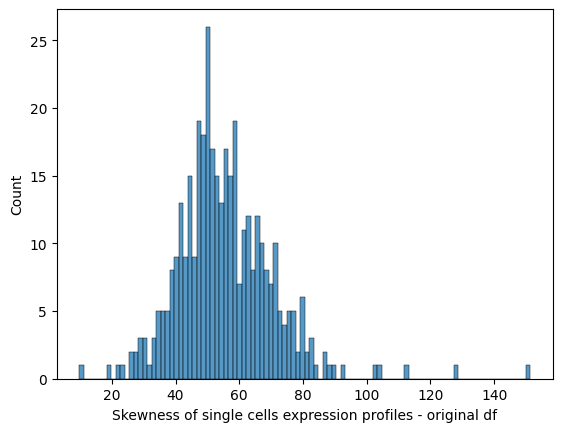

In [52]:
from scipy.stats import kurtosis, skew

cnames = list(data.T.columns)

colN = np.shape(data.T)[1]
data_skew_cells = []
for i in range(colN) :    
    name = data.T[cnames[i]]
    data_skew_cells += [skew(name)]
sns.histplot(data_skew_cells,bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df')
plt.show()

In [53]:
print( "Skewness of data: ", data_skew_cells)
print("Mean of skewness values:", np.mean(data_skew_cells))

Skewness of data:  [65.3293476728411, 38.73257818368301, 48.14055338427522, 25.51111003985754, 61.807162316617756, 67.04123335084539, 36.590323800613746, 71.0267787850064, 46.968455285544245, 50.700986376200646, 62.01708428399256, 48.47588656194911, 43.95274295898324, 44.84104723244163, 45.212925257275465, 78.61404436439186, 58.977735156829084, 21.916000765107164, 73.77516658973012, 59.01333707783532, 66.18273458292978, 58.92877893459357, 44.94185124605908, 103.80162853428926, 57.85913666503987, 52.61678597578867, 79.95809503472208, 29.797032951121288, 75.83878274045708, 62.732518968901765, 58.931309180084575, 56.32305724868327, 57.02376162042931, 57.37104819661485, 35.84361391791805, 69.65974750539775, 51.515414034789075, 50.39866420239922, 38.03240678913514, 63.80300193632892, 55.837467193115366, 50.10913881415591, 65.46704067028153, 35.08184883135755, 39.332180695995035, 57.596025526774575, 82.7008853973779, 61.19103247245235, 52.774568256734895, 68.02944491194704, 38.53118067620604

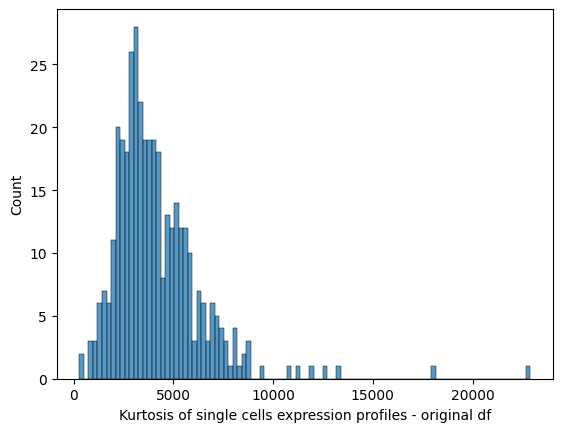

In [54]:
data_kurt_cells = []
for i in range(colN) :     
    name = data.T[cnames[i]]
    data_kurt_cells += [kurtosis(name)]
sns.histplot(data_kurt_cells, bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - original df')
plt.show()

In [55]:
print( "Excess kurtosis of data distribution: ",  data_kurt_cells)
print("Mean of kurtosis values:", np.mean(data_kurt_cells))

Excess kurtosis of data distribution:  [5463.645282643022, 1995.8520052733418, 2901.798051720723, 917.7893553704595, 4656.550578232189, 5580.3195682340875, 2010.9651813965895, 6219.628279280727, 2990.67999138626, 2940.5931578284826, 4592.719301484182, 2627.0498838917624, 2217.448595585073, 2356.356087133049, 2473.511712027504, 7973.608919171623, 4313.571814924348, 799.5354281945483, 6299.13993323815, 4649.269380039665, 5777.840053343645, 3807.887574395473, 2455.9004110862716, 11869.602376301447, 4005.2681270595376, 3504.796075053494, 8055.60069416592, 1308.7672887695835, 6931.3347328174195, 5124.5504128334205, 4615.4316484638475, 4124.508712212333, 4177.310501731559, 3997.8462925983804, 1765.1957149921402, 6856.335494083642, 3107.9509626406248, 2864.8863034575156, 1914.8864839697094, 4998.6709103247695, 4158.328482025339, 3254.8422508530657, 5205.227522488022, 1888.1523758896278, 2312.149738454117, 4020.478021860082, 7434.874527501197, 4223.805454645823, 3561.3577646370686, 5434.304721

*HCC1806 SmartSeq experiment: we obtain mean of skewness values = 36.711205637200365 and mean of kurtosis values = 2390.818798228346.*

From these graphs, we can deduce that the distributions are highly non normal.
Indeed, the high positive kurtosis values indicate a more peaked distribution compared to a normal one. Moreover, the high positive skewness values underline that the distribution is right-skewed.

In general, it is acceptable to deviate from a Gaussian distribution, as not all methods require a normal distribution and this can be addressed during the analysis.
Nevertheless, it would be better to reduce skewness since highly skewed data can be challenging to manage.

#### Data transformation

Data transformation could be an option to deal with these problems. A common choice to transform highly skewed data to a distribution closer to a normal one is to apply a *log based 2* transformation.

In [56]:
data_log2 = np.log2(data+1)
data_log2

WASH7P  MIR6859-1  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...     0.0        0.0   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...     0.0        0.0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...     0.0        0.0   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....     0.0        0.0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....     0.0        0.0   
...                                                    ...        ...   
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...     0.0        0.0   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...     0.0        0.0   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...     1.0        0.0   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...     0.0        0.0   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...     1.0        0.0   

                                                      WASH9P  OR4F29  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  1.000000     0.0   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  0.000000     0.0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  0.000000     0.0   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....  0.000000     0.0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  0.000000     0.0   
...                                                      ...     ...   
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...  0.000000     0.0   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...  1.000000     0.0   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...  1.000000     0.0   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...  2.321928     1.0   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...  2.584963     0.0   

                                                    MTND1P23  MTND2P28  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       0.0  1.584963   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       0.0  0.000000   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       0.0  1.000000   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....       0.0  0.000000   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....       0.0  0.000000   
...                                                      ...       ...   
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...       0.0  0.000000   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...       0.0  1.584963   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...       0.0  3.000000   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...       0.0  4.906891   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...       0.0  2.584963   

                                                    MTCO1P12  MTCO2P12  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  1.584963  0.000000   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  0.000000  0.000000   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  1.000000  1.000000   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....  0.000000  0.000000   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  0.000000  0.000000   
...                                                      ...       ...   
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoor...  1.000000  0.000000   
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoor...  2.584963  2.584963   
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoor...  0.000000  0.000000   
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoor...  2.321928  0.000000   
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoor...  2.000000  0.000000   

                                                    MTATP8P1  MTATP6P1  ...  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       0.0  4.906891  ...   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       0.0  0.000000  ...   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       0.0  3.700440  ...   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....       0.0  3.000000  ...   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....       0.0  6.108524  ...   
...                                                      .

We visualize violin plots using the same indeces previously randomly selected.

101


<Axes: xlabel='output.STAR.2_A3_Norm_S9_Aligned.sortedByCoord.out.bam'>

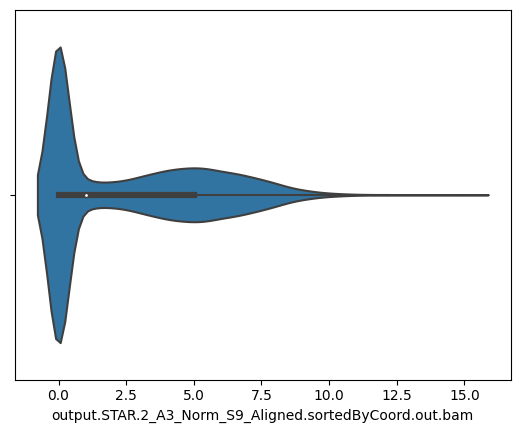

In [57]:
print(ind1)
sns.violinplot(x=data_log2.loc[rows[ind1]])

48


<Axes: xlabel='output.STAR.1_E10_Hypo_S220_Aligned.sortedByCoord.out.bam'>

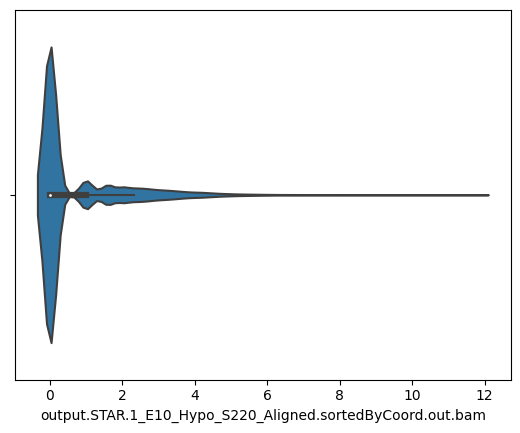

In [58]:
print(ind2)
sns.violinplot(x=data_log2.loc[rows[ind2]])

In [59]:
data_log2.T.describe()

output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam  \
count                                       22905.000000          
mean                                            1.892372          
std                                             2.744578          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             4.169925          
max                                            15.512524          

       output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam  \
count                                       22905.000000          
mean                                            0.009677          
std                                             0.115966          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.000000          
max                                             3.906891          

       output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam  \
count                                       22905.000000          
mean                                            1.734012          
std                                             3.062152          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             2.584963          
max                                            16.324181          

       output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam  \
count                                       22905.000000        
mean                                            0.409288        
std                                             0.933189        
min                                             0.000000        
25%                                             0.000000        
50%                                             0.000000        
75%                                             0.000000        
max                                             8.179909        

       output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam  \
count                                       22905.000000        
mean                                            1.565756        
std                                             2.159384        
min                                             0.000000        
25%                                             0.000000        
50%                                             0.000000        
75%                                             3.000000        
max                                            13.369461        

       output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam  \
count                                       22905.000000        
mean                                            2.177625        
std                                             2.937413        
min                                             0.000000        
25%                                             0.000000        
50%                                             0.000000        
75%                                             4.584963        
max                                            15.515977        

       output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam  \
count                                       22905.000000        
mean                                            2.542539        
std                                             3.167468        
min                                             0.000000        
25%                                             0.000000        
50%                                            

The plot for 50 cells is:

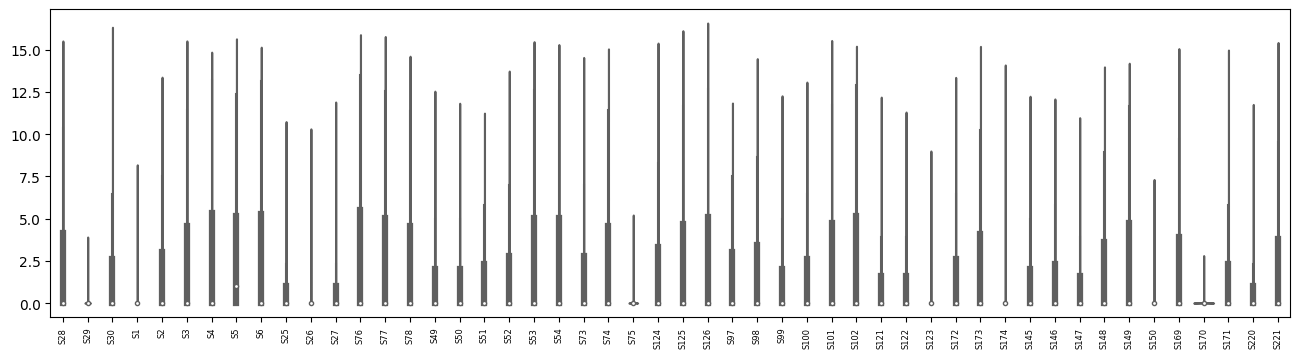

In [60]:
data_small_log2 = data_log2.T.iloc[:, :50]
names_small = names[:50]
plt.figure(figsize=(16,4))

plot=sns.violinplot(data=data_small_log2, palette="Set3", cut=0)
plot.set_xticklabels(names_small, rotation=90, fontsize=6)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

Let's visualize skewness and kurtosis of the transformed data:

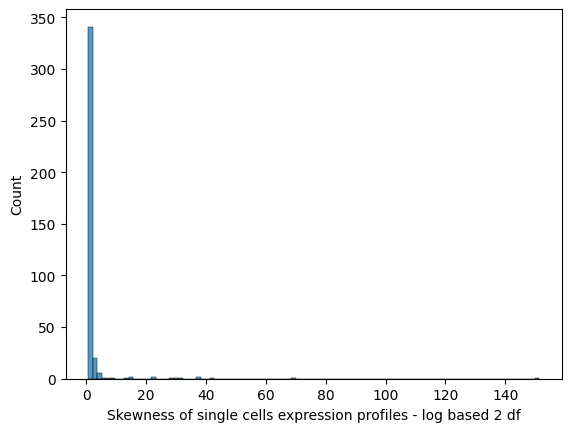

In [61]:
cnames = list(data_log2.T.columns)

colN = np.shape(data_log2.T)[1]
colN
data_log_skew_cells = []
for i in range(colN) :     
    name = data_log2.T[cnames[i]]
    data_log_skew_cells += [skew(name)]
sns.histplot(data_log_skew_cells, bins=100)
plt.xlabel('Skewness of single cells expression profiles - log based 2 df')
plt.show()

In [62]:
print( "Skewness of log base 2 df: ", data_log_skew_cells)
print("Mean skewness:", np.mean(data_log_skew_cells))

Skewness of log base 2 df:  [1.1057395234854044, 15.61679195544179, 1.4670439553197712, 2.675818577529791, 1.204185389342206, 1.0040053557524433, 0.807298608546033, 0.714275166199882, 0.786030463236182, 2.1786644629707634, 3.1037743710662844, 2.3717951551680914, 0.923493751583869, 0.9124854279824427, 0.8549620433809288, 1.5336274062343476, 1.5864532323735512, 1.4396820263053096, 1.3643529331601185, 0.8283157691472006, 0.7585850471537893, 1.346823591574563, 0.9066805806659899, 37.721060851815736, 1.3444946409550385, 0.9501331188032239, 0.8547386066753241, 1.1741243574925364, 1.144944773164568, 1.4860446273370016, 1.4277677684867498, 1.0239458910695918, 0.7979132358687113, 1.7393061803458028, 1.7387396016793497, 3.80251229801015, 1.4080655380951959, 1.0452382744722124, 3.0581623164518823, 1.5362964142750475, 1.4111801073556067, 1.8621435520669851, 1.0455839714775215, 0.9060168412656754, 3.513705417834959, 1.0701002144231377, 68.91277437158584, 1.6248646572728893, 2.281439487283935, 1.048

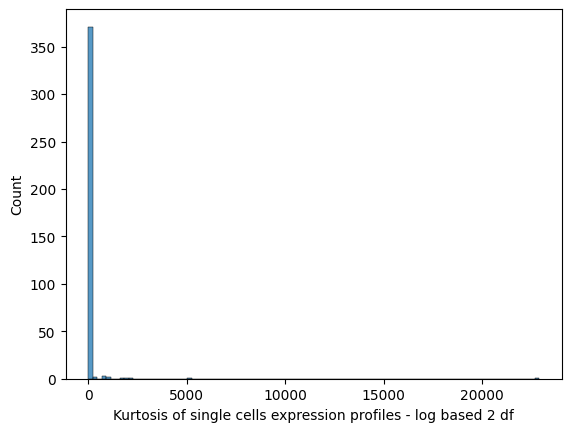

In [63]:
data_kurt_cells = []
for i in range(colN) :     
    name = data_log2.T[cnames[i]]
    data_kurt_cells += [kurtosis(name)]   
sns.histplot(data_kurt_cells, bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - log based 2 df')
plt.show()

In [64]:
print( "Excess kurtosis of log based 2 distribution: ",  data_kurt_cells)
print("Mean kurtosis:", np.mean(data_kurt_cells))

Excess kurtosis of log based 2 distribution:  [-0.10313617588687274, 321.7228980621053, 0.699056587846735, 8.099655025021805, 0.46953390252257465, -0.2990000642606714, -0.7410539783404424, -0.8274756397974397, -0.7881491075967832, 5.421178737785846, 13.539953146793508, 6.444560654465231, -0.6242714510722296, -0.5407508720475307, -0.5410284782306705, 1.741747726877497, 1.915706932536172, 1.0786174910777584, 0.8999365173423133, -0.6209195978263264, -0.7650753790953289, 1.0625310481811487, -0.41726588866032976, 2001.121073581476, 0.7383702718357847, -0.37532443412558836, -0.6545311622131482, 0.34385686720299047, 0.1886697476446928, 1.4764414513263393, 1.0731646281971843, -0.30557722939786736, -0.7747894863554299, 2.916159144186106, 2.6759563919298897, 19.776659432488245, 1.256419994177966, -0.06792076908983402, 8.456681686016648, 1.6576032498416682, 1.156123278046656, 3.3580267356717908, -0.009889035599438323, -0.5523808121907101, 16.089408662853746, -0.04862013057481418, 5072.39111395831

*HCC1806 SmartSeq experiment: after applying a log based 2 transformation, we obtain mean skewness = 1.940801299270791 and mean kurtosis = 59.442962646309546.*

Taking a log transformation, the dataset is still not perfectly following a normal distribution but the resulting values of skewness and kurtosis are lower than the ones of the original dataset: rescaling it is therefore a good idea by the reasoning above.

In [65]:
data = data_log2

#### Cell Filtering
As our previous analysis shows, we have to filter out cells that show low activity i.e. low gene reads.

In [66]:
row_sum = data.sum(axis=1)
counter = 0
for x in row_sum:
    if x == 0:
        counter += 1

print(counter)

0


There are no cells that have 0 expression of every gene, but still as we have seen before there are cells that have very low gene reads, so they should be removed since they are anomalous.

To understand which cells are anomalous, we decide to make a plot representing the total counts of genes vs the number of expressed ones for each cell.

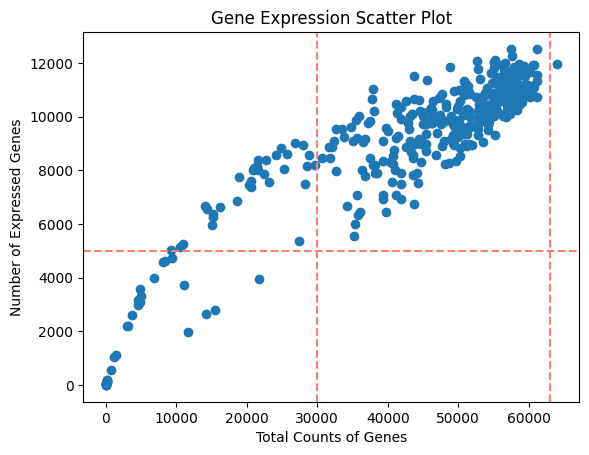

In [67]:
# Step 1: Calculate total counts of genes for each cell (sum of all elements in each row of the matrix)
total_gene_counts = data.sum(axis=1)

# Step 2: Calculate number of expressed genes for each cell (count of non-zero elements in each row of the matrix)
expressed_genes = (data != 0).sum(axis=1)

# Step 3: Create a scatter plot
plt.scatter(total_gene_counts, expressed_genes)
plt.xlabel('Total Counts of Genes')
plt.ylabel('Number of Expressed Genes')
plt.title('Gene Expression Scatter Plot')
plt.axvline(x=30000, color='salmon', linestyle='--')
plt.axvline(x=63000, color='salmon', linestyle='--')
plt.axhline(y=5000, color='salmon', linestyle='--')
plt.show()

From this plot, we can define as 'outlier' cells the ones with:
- low gene expression and low total gene counts: their activity is very low;
- very high gene expression and very high gene counts: their activity is too high, so they behave in an anomalous way.

We defined some bounds simply looking at the plot, in a heuristic way, so it may not be completely accurate.

To remove these cells we have identified, we create a copy of data so that we do not modify the original dataframe while working on it.

In [68]:
data_copy = data.copy()

In [69]:
original_indices = data_copy.index


# Calculate total counts of genes for each cell
total_gene_counts = data_copy.sum(axis=1)

# Calculate number of expressed genes for each cell
expressed_genes = (data_copy != 0).sum(axis=1)

total_counts_range = (30000, 63000)
expressed_genes_range = (5000, 14000)
data_copy['total_counts'] = total_gene_counts
data_copy['expressed_genes'] = expressed_genes 
# Filter the dataset to select only the rows within the specified range
data_filtered = data_copy.loc[
    (data_copy['total_counts'] >= total_counts_range[0]) & (data_copy['total_counts'] <= total_counts_range[1]) &
    (data_copy['expressed_genes'] >= expressed_genes_range[0]) & (data_copy['expressed_genes'] <= expressed_genes_range[1])
].reset_index(drop=True)
original_indices = original_indices[(data_copy['total_counts'] >= total_counts_range[0]) & (data_copy['total_counts'] <= total_counts_range[1]) &
    (data_copy['expressed_genes'] >= expressed_genes_range[0]) & (data_copy['expressed_genes'] <= expressed_genes_range[1])
]

data_filtered = data_filtered.iloc[:, :22905] # remove columns total_counts and expressed_genes
data_filtered.index = original_indices

We visualize again the plot and do some other checks to verify that we correctly removed the cells we defined as 'outliers'.

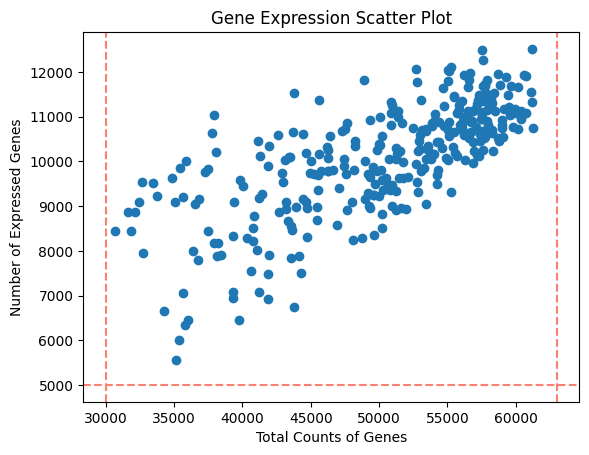

In [70]:
# Step 1: Calculate total counts of genes for each cell
total_gene_counts = data_filtered.sum(axis=1)

# Step 2: Calculate number of expressed genes for each cell
expressed_genes = (data_filtered != 0).sum(axis=1)

# Step 3: Create a scatter plot
plt.scatter(total_gene_counts, expressed_genes)
plt.xlabel('Total Counts of Genes')
plt.ylabel('Number of Expressed Genes')
plt.title('Gene Expression Scatter Plot')
plt.axvline(x=30000, color='salmon', linestyle='--')
plt.axvline(x=63000, color='salmon', linestyle='--')
plt.axhline(y=5000, color='salmon', linestyle='--')
plt.show()

In [71]:
total_gene_counts_filtered = data_filtered.sum(axis=1)

expressed_genes_filtered = (data_filtered != 0).sum(axis=1)


for x in total_gene_counts_filtered:
    assert x >= 30000
    assert x <= 63000

for x in expressed_genes_filtered:
    assert x >= 5000
# we assert that all the values are in the correct range, so we have removed the outliers

In [72]:
data_filtered.head()

WASH7P  MIR6859-1  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...     0.0        0.0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...     0.0        0.0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....     0.0        0.0   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....     0.0        0.0   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....     0.0        0.0   

                                                      WASH9P  OR4F29  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  1.000000     0.0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  0.000000     0.0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  0.000000     0.0   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  1.000000     0.0   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  3.459432     0.0   

                                                    MTND1P23  MTND2P28  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       0.0  1.584963   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       0.0  1.000000   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....       0.0  0.000000   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....       0.0  1.000000   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....       0.0  2.000000   

                                                    MTCO1P12  MTCO2P12  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  1.584963       0.0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  1.000000       1.0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  0.000000       0.0   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  2.000000       0.0   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  3.459432       1.0   

                                                    MTATP8P1  MTATP6P1  ...  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       0.0  4.906891  ...   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       0.0  3.700440  ...   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....       0.0  6.108524  ...   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....       0.0  7.672425  ...   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....       0.0  9.434628  ...   

                                                    MT-TH  MT-TS2  MT-TL2  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...    0.0     0.0     0.0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...    0.0     0.0     0.0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....    0.0     0.0     0.0   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....    1.0     0.0     0.0   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....    1.0     0.0     2.0   

                                                       MT-ND5    MT-ND6  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...   8.982994  7.209453   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...   1.000000  0.000000   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....   7.894818  5.000000   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....   9.805744  6.832890   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  10.321928  7.044394   

                                                       MT-TE     MT-CYB  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  2.321928   8.082149   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  0.000000   6.266787   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  2.000000   9.507795   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  2.000000  11.408330   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  0.000000  13.187197   

                                                    MT-TT     MT-TP     MAFIP  
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...    0.0  2.584963  3.169925  
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...    0.0  0.000000  0.000000  
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....    0.0  0.000000  0.000000  
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....    1.0  1.000000  0.000000  
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....

In [73]:
data = data_filtered

*HCC1806 experiment: we do the same procedure, using as ranges: total_counts_range = (41000, 80000) and expressed_genes_range = (7100, 13300).*

#### Feature scaling and normalization

We need to notice that each individual cell was sequenced independently; this implies the possibility that the data may require normalization across cells. Normalization is the process of transforming a dataset to a common scale. This tranformation does not always lead to have a Gaussian distribution, but this is accettable as explained before.

Let's plot the the gene expression distributions of some selected cells from our dataset.

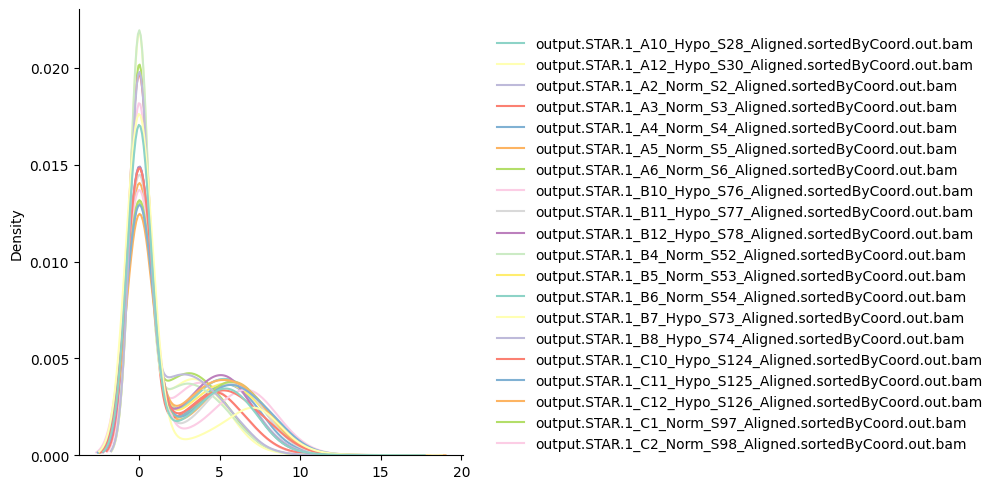

In [74]:
data_small = data.T.iloc[:, :20]  #just selecting part of the samples so run time not too long
sns.displot(data=data_small,palette="Set3",kind="kde", bw_adjust=2)

We can see that the distribution of each cell shows two peaks: this is expected since they represent genes of low and high abundance.

If we visualize the distribution of a single cell, we can clearly see this behaviour.

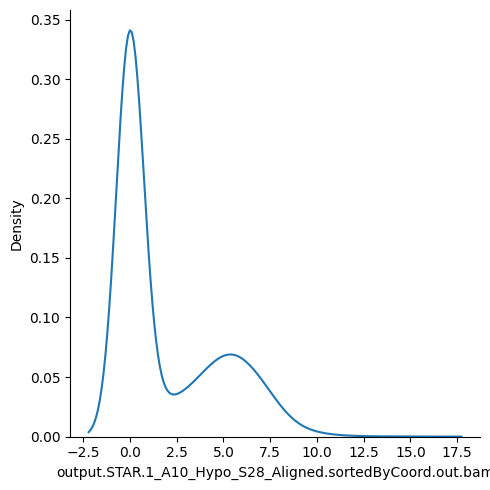

In [75]:
data_small_cell = data.loc['output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam'] 
sns.displot(data_small_cell, kind="kde", bw_adjust=2)
plt.show()

In order to compare the plots of our dataset (that we have filtered in the previous steps), we open a filtered-normalized dataset of the same experiment.

In [76]:
norm_df = pd.read_csv("/Users/ela/Documents/AI_LAB/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
norm_df = norm_df.T
print("Dataframe dimesions:", np.shape(norm_df))

Dataframe dimesions: (250, 3000)


Since we took a log transformation on our dataset, let's do the same with the normalized one to have the plots on a similar scale.

In [77]:
norm_df = np.log2(norm_df+1)

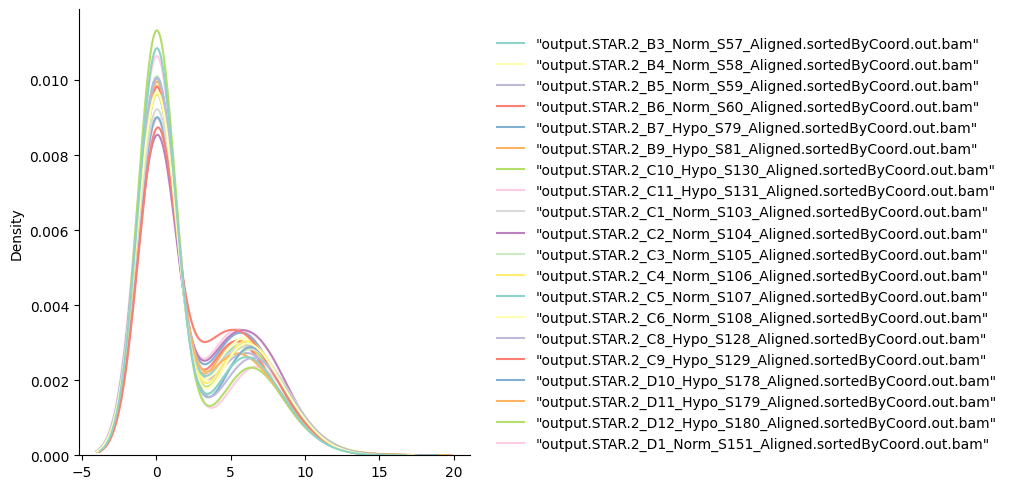

In [78]:
norm_df_small = norm_df.T.iloc[:, :20]  #just selecting part of the samples so run time not too long
sns.displot(data=norm_df_small,palette="Set3",kind="kde", bw_adjust=2)
plt.show()

Again, let's visualize the plot of the previously chosen single cell for these datasets:

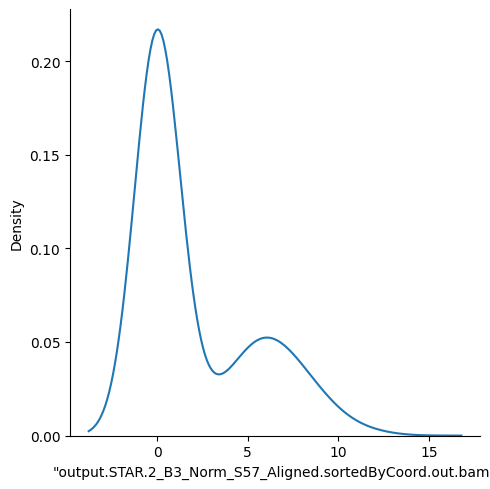

In [79]:
norm_small_cell1 = norm_df.loc['"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"'] 
sns.displot(norm_small_cell1, kind="kde", bw_adjust=2)
plt.show()

The plots of the normalized data seem already quite similar to the ones of our dataset; let's try to apply some normalization technique and see how they change.
We choose to apply StandardScaler, since it is not so much affected by outliers and standard approach is easily interpretable by a biologist.

Using StandardScaler, we subtract the mean value and divide by variance for every row.

In [80]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
data_standardized = scaler.fit_transform(data.T)

data_standardized = pd.DataFrame(data_standardized.T, columns=data.columns, index=data.index)

In [81]:
data_standardized.head()

WASH7P  MIR6859-1  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor... -0.689509  -0.689509   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor... -0.566285  -0.566285   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.... -0.725110  -0.725110   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.... -0.741357  -0.741357   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.... -0.802721  -0.802721   

                                                      WASH9P    OR4F29  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor... -0.325147 -0.689509   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor... -0.566285 -0.566285   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.... -0.725110 -0.725110   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.... -0.400914 -0.741357   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  0.289478 -0.802721   

                                                    MTND1P23  MTND2P28  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor... -0.689509 -0.112008   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor... -0.566285 -0.239710   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.... -0.725110 -0.725110   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.... -0.741357 -0.400914   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.... -0.802721 -0.171288   

                                                    MTCO1P12  MTCO2P12  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor... -0.112008 -0.689509   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor... -0.239710 -0.239710   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.... -0.725110 -0.725110   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.... -0.060471 -0.741357   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  0.289478 -0.487005   

                                                    MTATP8P1  MTATP6P1  ...  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor... -0.689509  1.098378  ...   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor... -0.566285  0.642186  ...   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.... -0.725110  2.103780  ...   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.... -0.741357  1.870667  ...   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.... -0.802721  2.175946  ...   

                                                       MT-TH    MT-TS2  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor... -0.689509 -0.689509   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor... -0.566285 -0.566285   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.... -0.725110 -0.725110   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.... -0.400914 -0.741357   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.... -0.487005 -0.802721   

                                                      MT-TL2    MT-ND5  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor... -0.689509  2.583558   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor... -0.566285 -0.239710   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.... -0.725110  2.931022   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.... -0.741357  2.596941   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.... -0.171288  2.456082   

                                                      MT-ND6     MT-TE  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  1.937346  0.156514   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor... -0.566285 -0.566285   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  1.590416  0.201101   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  1.584853 -0.060471   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  1.421310 -0.802721   

                                                      MT-CYB     MT-TT  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  2.255324 -0.689509   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  1.480290 -0.566285   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  3.678000 -0.725110   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  3.142530 -0.400914   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  3.360694 -0.487005   

             

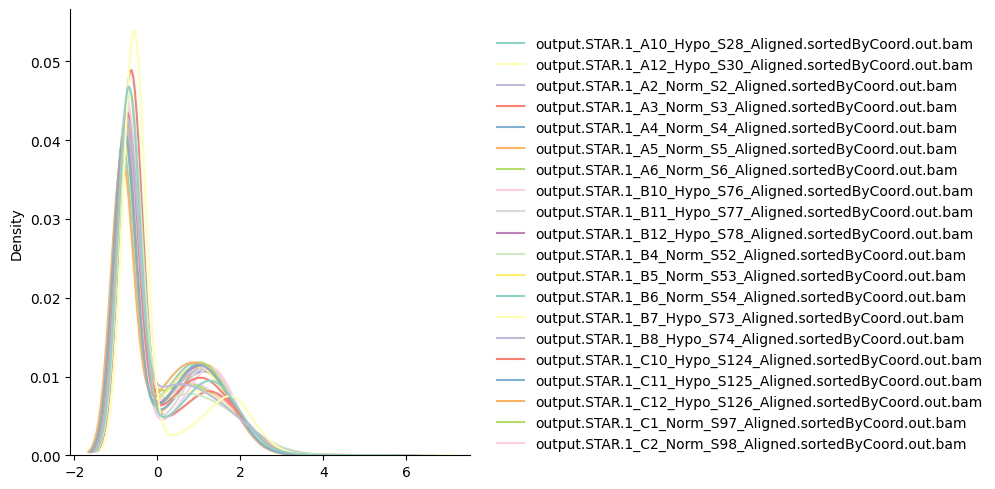

In [82]:
data_stand_df_small = data_standardized.T.iloc[:, :20]  #just selecting part of the samples so run time not too long
sns.displot(data_stand_df_small,palette="Set3",kind="kde", bw_adjust=2)
plt.show()

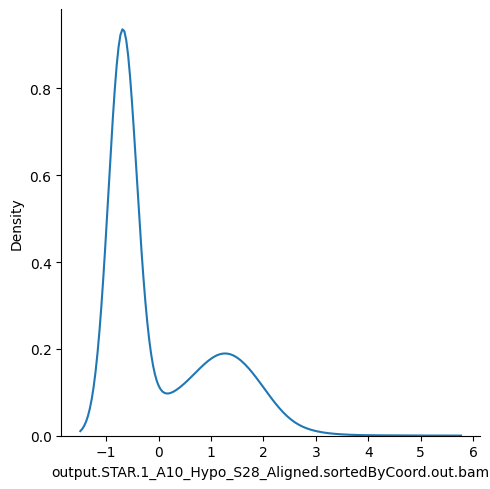

In [83]:
data_stand_cell= data_standardized.loc['output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam'] 
sns.displot(data_stand_cell, kind="kde", bw_adjust=2)
plt.show()

Let's compute the values of skeweness and kurtosis of the standardized dataset:

In [84]:
print( "Skeweness: ",  skew(data_standardized))
print("Mean skeweness:", np.mean(skew(data_standardized)))
print()
print( "Kurtosis: ",  kurtosis(data_standardized))
print("Mean kurtosis:", np.mean(kurtosis(data_standardized)))

Skeweness:  [ 3.17808611  3.01766603  0.5686532  ...  0.56069821 -0.05658675
  1.06748017]
Mean skeweness: 1.320638567645328

Kurtosis:  [15.5641668  19.7366884  -0.52045079 ... -0.57930253 -0.75553775
  0.15421078]
Mean kurtosis: 10.02160514345388


The resulting values are quite low: the distribution is still non-normal, but we reduced a lot the skeweness compared to the original dataset's one and also compared to the values we obtained just taking the log transformation. This is a good result, since high skeweness values may lead to problems, as already pointed out.

In conclusion, standardization seems to be a good way to scale our parameters, so we decide to apply it.

In [85]:
data = data_standardized

*HCC1806 experiment: the same conclusion applies, since we find mean skeweness of 1.2134374660939942 and mean kurtosis of 10.25664719668806.*

In [86]:
data.shape

(316, 22905)

## Feature selection

Another important part of our analysis is the selection of genes that are connected to the Hypoxia and Normoxia conditions.
We can try to select them using the concepts of entropy and information gain: the most important genes are the ones that give us the highest values of information gain. 

Information gain is a measure used to quantify the usefulness of a feature (in this case, a gene) in predicting the target variable ('Hypoxia' or 'Normoxia').


In [87]:
merge = data.merge(data_meta, left_index=True, right_index=True, how="inner")
data_lab = merge.drop(["Cell Line", "Lane", "Pos", "Hours", "PreprocessingTag", "ProcessingComments", "Cell name"], axis=1)
data_lab["Condition"]

output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    Hypo
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    Hypo
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      Norm
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam      Norm
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam      Norm
                                                            ... 
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    Norm
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    Norm
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    Hypo
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    Hypo
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    Hypo
Name: Condition, Length: 316, dtype: object

In [88]:
data_genes = data.T
n = len(data.index)

We now calculate the information gain for each gene, using the corresponding target variable data_lab["Condition"] (so the label 'Hypoxia' or 'Normoxia'). We can see that approximately the first 3000 genes of this list (3414) are the ones that are the most useful in our prediction. We thus keep those with information gain higher than 0.215 and visualize this in a plot:

In [89]:
from sklearn.feature_selection import mutual_info_classif

# Calculate the information gain for each gene
information_gain = mutual_info_classif(data, data_lab["Condition"])

# Sort the genes based on their information gain (descending order)
sorted_genes = np.argsort(information_gain)[::-1]
sorted_genes = sorted_genes[:3415]
# Print the selected genes
for gene_index in sorted_genes:
    print(f"{data.columns[gene_index]}: Information Gain = {information_gain[gene_index]}")

NDRG1: Information Gain = 0.652850010929818
BNIP3: Information Gain = 0.6293716987199368
HK2: Information Gain = 0.6229342045507877
P4HA1: Information Gain = 0.6182155449226839
GAPDHP1: Information Gain = 0.6146039495703683
BNIP3L: Information Gain = 0.6112144648963216
MT-CYB: Information Gain = 0.6071714290100367
MT-CO3: Information Gain = 0.6069431008363095
FAM162A: Information Gain = 0.5978657302685877
LDHAP4: Information Gain = 0.596249888004365
ENO2: Information Gain = 0.5901785407123785
HILPDA: Information Gain = 0.5893623976490796
ERO1A: Information Gain = 0.5885970357759547
PDK1: Information Gain = 0.5848792556958529
PGK1: Information Gain = 0.5829428094806763
VEGFA: Information Gain = 0.5788163036952783
C4orf3: Information Gain = 0.5759660862000839
LDHA: Information Gain = 0.5705938251485365
KDM3A: Information Gain = 0.567630555850209
DSP: Information Gain = 0.5673717635860669
PFKP: Information Gain = 0.5658814558901728
PFKFB3: Information Gain = 0.5621446524474103
DDIT4: Info

In [90]:
filtered_genes1 = list(filter(lambda gene: information_gain[gene] > 0.215, sorted_genes))
r = len(filtered_genes1)
print(r)

3414


In [91]:
def plot_info(len_data, data):
    plt.figure(figsize=(10, 6))
    plt.bar(range(len_data), information_gain[data])
    plt.xlabel('Genes')
    plt.ylabel('Information Gain')
    plt.title('Information Gain for Selected Genes')
    plt.tight_layout()
    plt.grid(False)
    plt.show()

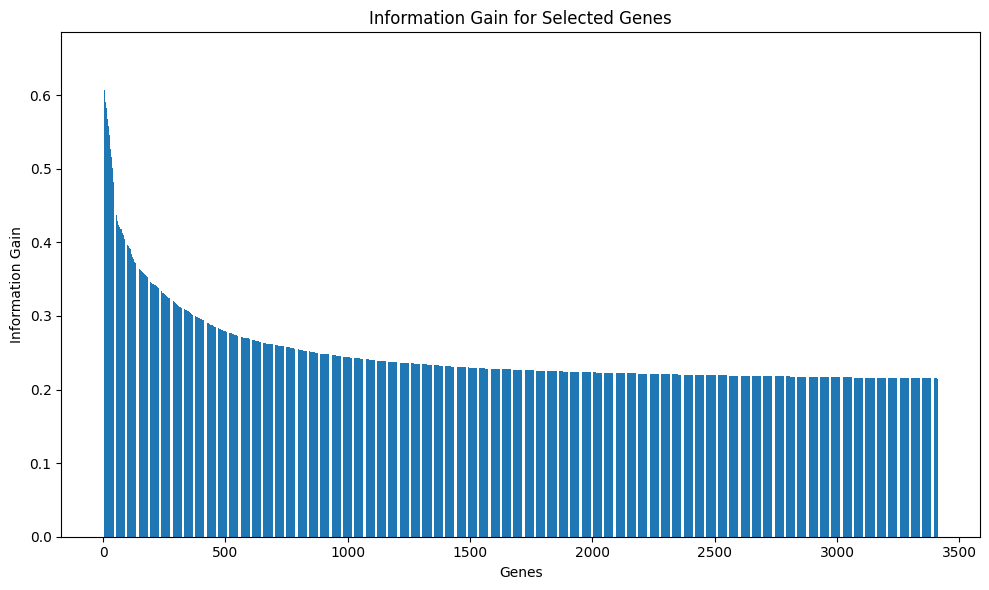

In [92]:
plot_info(r, filtered_genes1)

This is the list of selected genes:

In [93]:
for x in filtered_genes1:
    print(data.columns[x])

NDRG1
BNIP3
HK2
P4HA1
GAPDHP1
BNIP3L
MT-CYB
MT-CO3
FAM162A
LDHAP4
ENO2
HILPDA
ERO1A
PDK1
PGK1
VEGFA
C4orf3
LDHA
KDM3A
DSP
PFKP
PFKFB3
DDIT4
PFKFB4
GAPDHP65
CYP1B1
GPI
MTATP6P1
CYP1B1-AS1
AK4
IRF2BP2
BNIP3P1
MT-ATP8
MXI1
MT-ATP6
TLE1
FUT11
RIMKLA
UBC
IFITM2
CIART
TES
HK2P1
HIF1A-AS3
GBE1
MYO1B
GAPDH
P4HA2
SLC2A1
PGK1P1
ITGA5
NFE2L2
ALDOA
RSBN1
MT-TK
EIF1
FDPS
STC2
DYNC2I2
MT-CO2
PGAM1
TMEM45A
ENO1
ALDOAP2
PTPRN
MIR210HG
RUSC1-AS1
FOSL2
C8orf58
PYCR3
ELOVL2
RAP2B
HLA-B
BHLHE40
RIOK3
BHLHE40-AS1
KRT80
SOX4
P4HA2-AS1
CYP1A1
USP3
SNRNP25
TNFRSF21
TANC2
PSME2
GAREM1
IER5L
AK1
WDR45B
EGLN3
PGK1P2
EGLN1
GAPDHP72
PGP
CEBPG
SPOCK1
IFITM3
DAPK3
GNA13
HLA-C
ACTG1
NAMPT
DSCAM-AS1
CLK3
SLC9A3R1
PNRC1
IGFBP3
SPRY1
MIR6892
NEBL
BBC3
PGM1
ADM
QSOX1
DARS1
MKNK2
SLC27A4
EML3
EMP2
SDF2L1
ST3GAL1
TGIF1
GAPDHP70
MRPL4
DAAM1
LY6E
IDI1
TST
SLC9A3R1-AS1
IFITM1
HNRNPA2B1
CCNG2
TRAPPC4
VLDLR-AS1
GAPDHP60
LSM4
NCK2
ARPC1B
GABARAP
LDHAP7
TSC22D2
PRELID2
MSANTD3
RAD9A
POLR1D
MIR3615
CA9
PSME2P2
MKRN1
CTPS1
NTN4
NDU

# Unsupervised Analysis

In this section we want to explore the dataset using unsupervised learning techniques.   
We will use the dataset Train and we will carry out our analysis focusing on MCF7 - Smart Seq, adding remarks and considerations on HCC1806 when needed.
Applying the logarithm to our data will be helpful in its visualization.

## **PCA**

Reducing the dimension of the dataset is useful for some reasons:
- for visualization purposes;
- to understand how the variance is distributed among features;
- to visualize the results of clustering and perform clustering on the highest variance features found with PCA.

## Cells

We start by performing PCA on cells' features: we try to reduce the number of genes (dimensions) while trying to maintain the ones with the highest values of variance (we take 95% as a threshold).
PCA is performed on the original dataset, with no transformation applied.

In [ ]:
PCA_data = PCA(n_components=0.95)
data_train_red = PCA_data.fit_transform(data_train)
print("Number of components:", PCA_data.n_components_)
print('Explained variation per principal component: {}'.format(PCA_data.explained_variance_ratio_))

Number of components: 20
Explained variation per principal component: [0.6344835  0.09107496 0.06270155 0.04033215 0.03156572 0.01538185
 0.01138705 0.01009336 0.00898676 0.00758287 0.00614321 0.00492391
 0.00467293 0.00430685 0.00377886 0.00331298 0.00300167 0.0027689
 0.00266241 0.00228027]


In [ ]:
print("Reconstruction error:", mean_squared_error(PCA_data.inverse_transform(data_train_red), data_train))

Reconstruction error: 24488.13749442456


For *HCC1806 experiment* the results are similar: there are 35 PC instead of 20, and the reconstruction error is quite high.

In [ ]:
PCA_data = PCA(n_components=0.95)
data_train_red = PCA_data.fit_transform(data_train)
print("Number of components:", PCA_data.n_components_)
print('Explained variation per principal component: {}'.format(PCA_data.explained_variance_ratio_))

Number of components: 34
Explained variation per principal component: [0.29018923 0.18101256 0.12288734 0.07970126 0.04956884 0.03640102
 0.02737402 0.02113149 0.01743474 0.01317286 0.01208516 0.0111941
 0.00880007 0.00783661 0.00748447 0.00693555 0.00579659 0.00509238
 0.00467221 0.00422117 0.00399608 0.00383594 0.00365575 0.00342266
 0.00304432 0.00285331 0.00257095 0.00235782 0.0022066  0.00215775
 0.00209672 0.00204413 0.00186566 0.00174111]


In [ ]:
print("Reconstruction error:", mean_squared_error(PCA_data.inverse_transform(data_train_red), data_train))

Reconstruction error: 17554.361399621102


We would also like to see how much the first components are insightful as part of the variance, and how the variance varies as we increase the number of components.

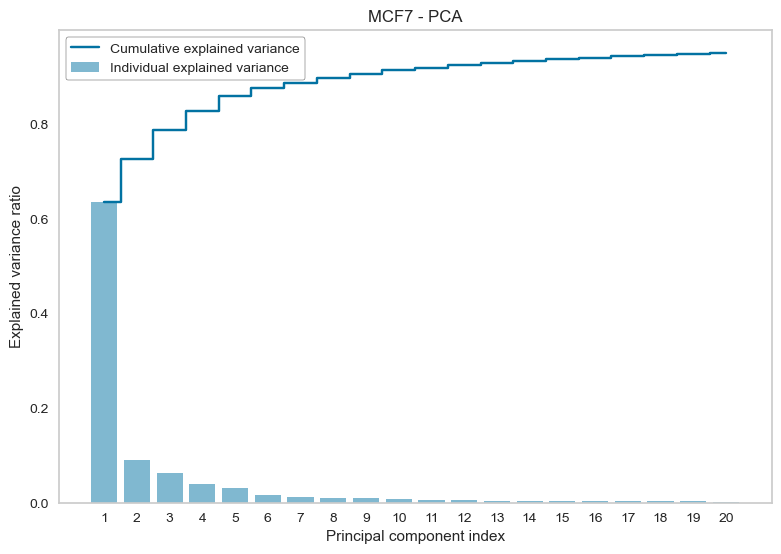

In [ ]:
exp_var_pca = PCA_data.explained_variance_ratio_
v = len(PCA_data.explained_variance_ratio_)
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
legend = plt.legend(loc='best', frameon=True)
legend.get_frame().set_edgecolor('black')
plt.tight_layout()
plt.title("MCF7 - PCA")
plt.grid(visible=False)
plt.xticks([i for i in range(v)], [i+1 for i in range(v)])
plt.show()

It's interesting to see that the first component explains more than 60% of the variance and the second one is significantly lower. This is not true for *HCC1806*, where the first component is reponsible for only 29% of the variance but the decrease with the second component is less dramatic. 

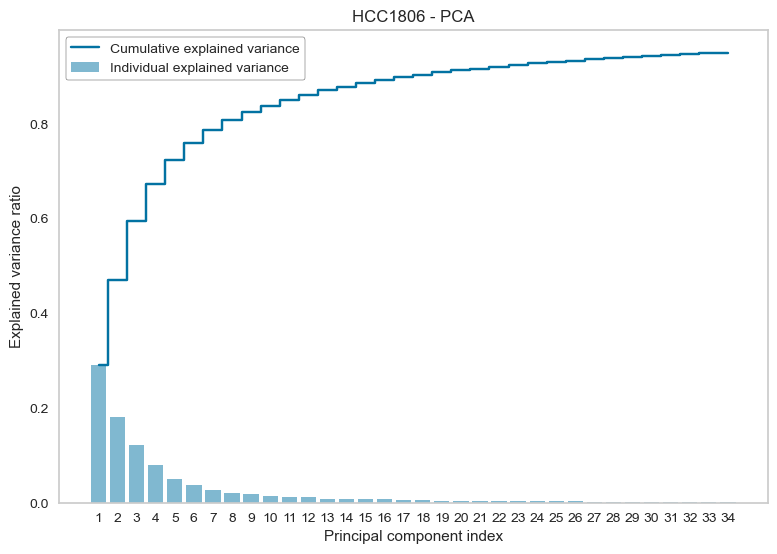

In [ ]:
exp_var_pca = PCA_data.explained_variance_ratio_
v = len(PCA_data.explained_variance_ratio_)
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
legend = plt.legend(loc='best', frameon=True)
legend.get_frame().set_edgecolor('black')
plt.tight_layout()
plt.title("HCC1806 - PCA")
plt.grid(visible=False)
plt.xticks([i for i in range(v)], [i+1 for i in range(v)])
plt.show()

Let's visualize the first five components plotted against each other: we can see that distribution of the cells is quite different.

In [ ]:
n_components = 5
pca = PCA(n_components=n_components)
components = pca.fit_transform(data_train)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Condition'

fig = px.scatter_matrix(
    components,
    color=data_train_lab["Condition"],
    dimensions=range(n_components),
    labels=labels,
    title=f'MCF7 - Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
n_components = 5
pca = PCA(n_components=n_components)
components = pca.fit_transform(data_train)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Condition'

fig = px.scatter_matrix(
    components,
    color=data_train_lab["Condition"],
    dimensions=range(n_components),
    labels=labels,
    title=f'HCC1806 - Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

For visualization purposes, we now set the number of components to 2 and then to 3. Starting from the reduced dataset, we plot each datapoint (cell) in green if it is from Hypoxia environment and in red if it is from Normoxia environment.

### In 2D

In [ ]:
PCA2_data = PCA(n_components=2)
principalComponents_hcc2 = PCA2_data.fit_transform(data_train)
data_pr2 = pd.DataFrame(data = principalComponents_hcc2
             , columns = ['PC1', 'PC2'])
print('Explained variation per principal component: {}'.format(PCA2_data.explained_variance_ratio_)) 

Explained variation per principal component: [0.6344835  0.09107496]


In [ ]:
data_pr2_lab = data_pr2.copy()
data_pr2_lab["Condition"] = [i for i in range(n)]
for i in range(n):
    if (data_train_lab["Condition"][i] == "Norm"):
        data_pr2_lab["Condition"][i] = 0
    elif (data_train_lab["Condition"][i] == "Hypo"):
        data_pr2_lab["Condition"][i] = 1

/var/folders/r2/bld_lf155710hgxgss_mfsym0000gn/T/ipykernel_35472/721786036.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r2/bld_lf155710hgxgss_mfsym0000gn/T/ipykernel_35472/721786036.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



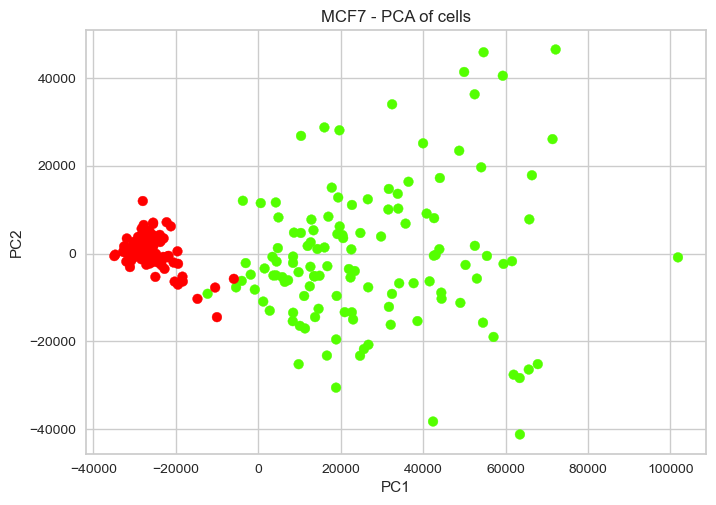

In [ ]:
x = np.array(data_pr2_lab['PC1'])
y = np.array(data_pr2_lab['PC2'])
plt.scatter(x, y, c=data_pr2_lab["Condition"], cmap="prism")
plt.title("MCF7 - PCA of cells")
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

For HCC1806:

In [ ]:
PCA2_data = PCA(n_components=2)
principalComponents_hcc2 = PCA2_data.fit_transform(data_train)
data_pr2 = pd.DataFrame(data = principalComponents_hcc2
             , columns = ['PC1', 'PC2'])
print('Explained variation per principal component: {}'.format(PCA2_data.explained_variance_ratio_)) 

Explained variation per principal component: [0.29018923 0.18101256]


In [ ]:
data_pr2_lab = data_pr2.copy()
data_pr2_lab["Condition"] = [i for i in range(n)]
for i in range(n):
    if (data_train_lab["Condition"][i] == "Normo"):
        data_pr2_lab["Condition"][i] = 0
    elif (data_train_lab["Condition"][i] == "Hypo"):
        data_pr2_lab["Condition"][i] = 1

/var/folders/r2/bld_lf155710hgxgss_mfsym0000gn/T/ipykernel_35463/3019903764.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r2/bld_lf155710hgxgss_mfsym0000gn/T/ipykernel_35463/3019903764.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



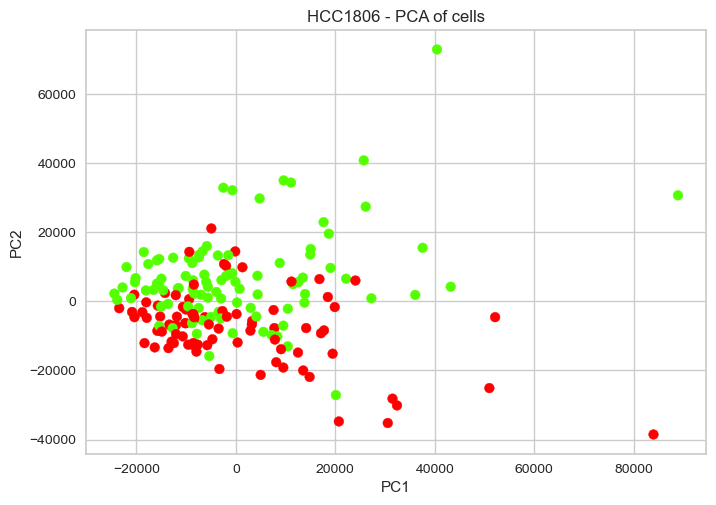

In [ ]:
x = np.array(data_pr2_lab['PC1'])
y = np.array(data_pr2_lab['PC2'])
plt.scatter(x, y, c=data_pr2_lab["Condition"], cmap="prism")
plt.title("HCC1806 - PCA of cells")
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

As already noticed, the cells are distributed in quite a different way.  
In 2D normoxic and hypoxic cells in MCF7 seems clearly divided, while it is not the case for *HCC1806*.

### In 3D

In [ ]:
PCA3_hcc = PCA(n_components=3)
principalComponents_hcc3 = PCA3_hcc.fit_transform(data_train)
data_pr3 = pd.DataFrame(data = principalComponents_hcc3
             , columns = ['PC1', 'PC2', 'PC3'])
print('Explained variation per principal component: {}'.format(PCA3_hcc.explained_variance_ratio_)) 

Explained variation per principal component: [0.6344835  0.09107496 0.06270155]


In [ ]:
data_pr3_lab = data_pr3.copy()
data_pr3_lab["Condition"] = [i for i in range(n)]
for i in range(n):
    if (data_train_lab["Condition"][i] == "Norm"):
        data_pr3_lab["Condition"][i] = 0
    elif (data_train_lab["Condition"][i] == "Hypo"):
        data_pr3_lab["Condition"][i] = 1

/var/folders/r2/bld_lf155710hgxgss_mfsym0000gn/T/ipykernel_35472/1474751301.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r2/bld_lf155710hgxgss_mfsym0000gn/T/ipykernel_35472/1474751301.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def PCA_3(EL, AZ):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
     
    x = np.array(data_pr3_lab['PC1'])
    y = np.array(data_pr3_lab['PC2'])
    z = np.array(data_pr3_lab['PC3'])
    scatter = ax.scatter(x, y, z, c=data_pr3_lab["Condition"], cmap="prism") 

    labels = ["Normoxia", "Hypoxia"]
    legend_handles, legend_labels = scatter.legend_elements()
    legend = ax.legend(handles=legend_handles, labels=labels, loc='center left', bbox_to_anchor=(0, 0.8))

    ax.view_init(elev=EL, azim=AZ)
    print("Elevation:",EL," Azimut:",AZ)

Elevation: 20  Azimut: 120


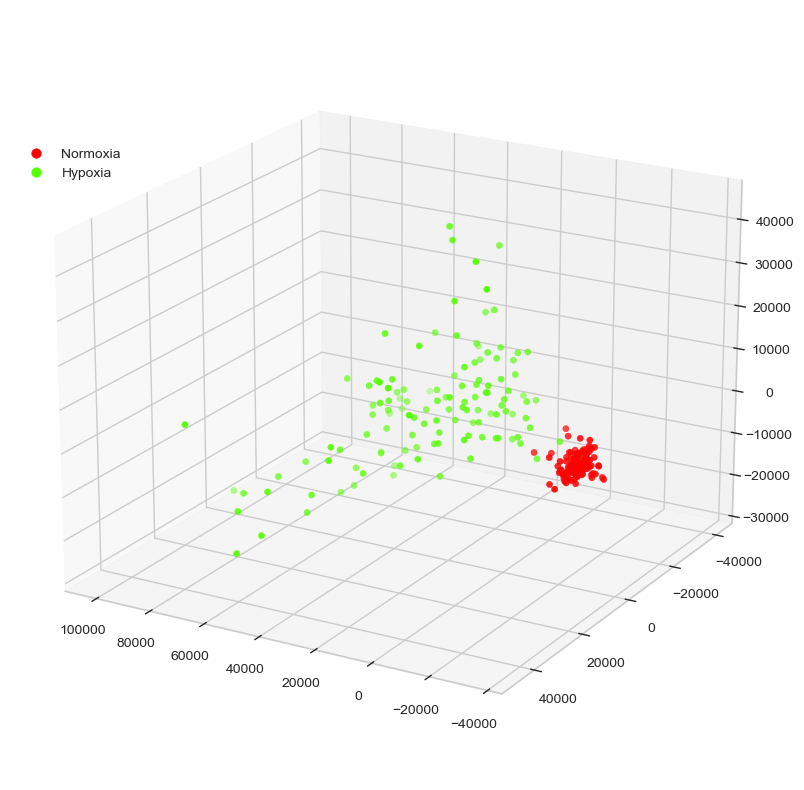

In [ ]:
PCA_3(20,120)

In [ ]:
PCA3_hcc = PCA(n_components=3)
principalComponents_hcc3 = PCA3_hcc.fit_transform(data_train)
data_pr3 = pd.DataFrame(data = principalComponents_hcc3
             , columns = ['PC1', 'PC2', 'PC3'])
print('Explained variation per principal component: {}'.format(PCA3_hcc.explained_variance_ratio_)) 

Explained variation per principal component: [0.29018923 0.18101256 0.12288734]


In [ ]:
data_pr3_lab = data_pr3.copy()
data_pr3_lab["Condition"] = [i for i in range(n)]
for i in range(n):
    if (data_train_lab["Condition"][i] == "Normo"):
        data_pr3_lab["Condition"][i] = 0
    elif (data_train_lab["Condition"][i] == "Hypo"):
        data_pr3_lab["Condition"][i] = 1

/var/folders/r2/bld_lf155710hgxgss_mfsym0000gn/T/ipykernel_35463/1377304862.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/r2/bld_lf155710hgxgss_mfsym0000gn/T/ipykernel_35463/1377304862.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def PCA_3(EL, AZ):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
     
    x = np.array(data_pr3_lab['PC1'])
    y = np.array(data_pr3_lab['PC2'])
    z = np.array(data_pr3_lab['PC3'])
    scatter = ax.scatter(x, y, z, c=data_pr3_lab["Condition"], cmap="prism") 

    labels = ["Normoxia", "Hypoxia"]
    legend_handles, legend_labels = scatter.legend_elements()
    legend = ax.legend(handles=legend_handles, labels=labels, loc='center left', bbox_to_anchor=(0, 0.8))

    ax.view_init(elev=EL, azim=AZ)
    print("Elevation:",EL," Azimut:",AZ)

Elevation: 20  Azimut: 120


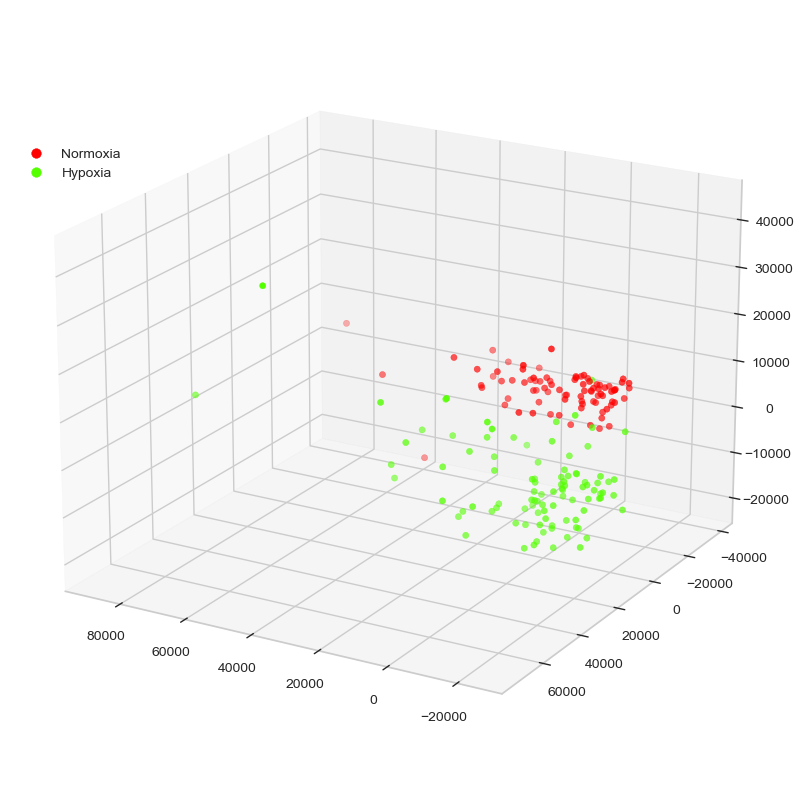

In [ ]:
PCA_3(20,120)

In 3D cells of *HCC1806* are better separated: this makes sense, as the variance explained by the third principal component is roughly similar to the variance explained by the second one (18% and 12%), so also the third component is relevant.

## Genes

PCA on genes is mainly done for visualization and later for clustering. We are not interested in reducing the dimensions per se, as it is not so relevant from a biological point of view.

In [ ]:
PCA_hcc_g = PCA(n_components=3)
pc_hcc_genes = PCA_hcc_g.fit_transform(data_genes)
data_pr3_g = pd.DataFrame(data = pc_hcc_genes
             , columns = ['PC1', 'PC2', 'PC3'])
print('Explained variation per principal component: {}'.format(PCA_hcc_g.explained_variance_ratio_)) 

Explained variation per principal component: [0.64301682 0.06518905 0.0184779 ]


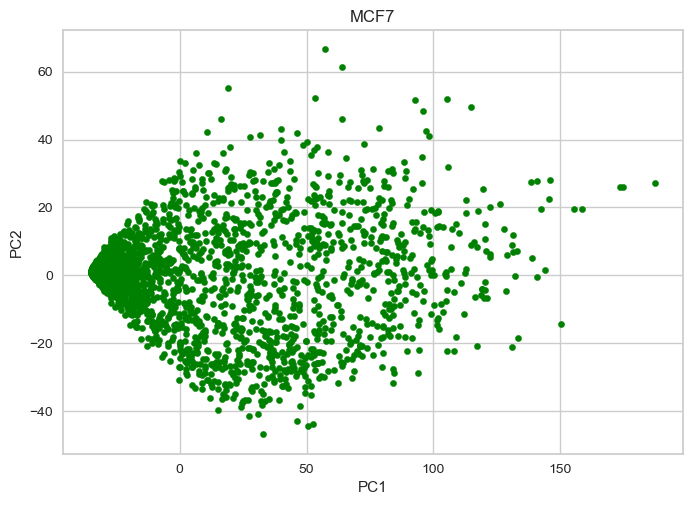

In [ ]:
x = np.array(data_pr3_g['PC1'])
y = np.array(data_pr3_g['PC2'])
plt.scatter(x, y, c="green", s=20)
plt.title("MCF7")
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

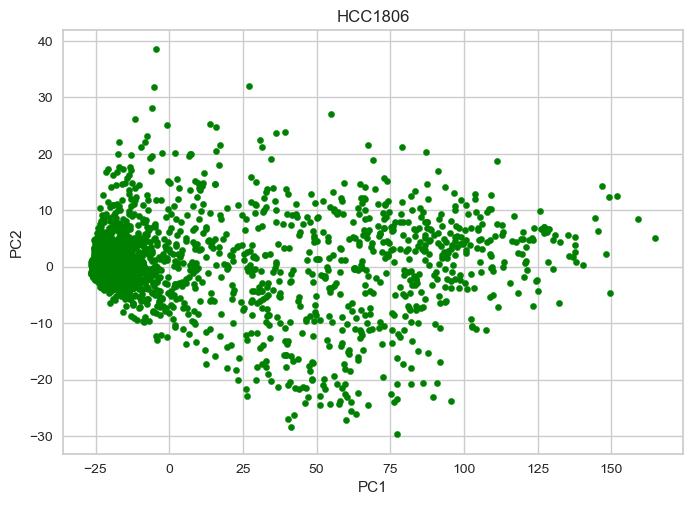

In [ ]:
x = np.array(data_pr3_g['PC1'])
y = np.array(data_pr3_g['PC2'])
plt.scatter(x, y, c="green", s=20)
plt.title("HCC1806")
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

The plots are clearly similar for both cell lines.

## **Clustering**

Clustering is a crucial tool to gain insights on the datasets, especially when we have an enormous amount of features and it is difficult to understand how the data is structured. Ideally, we would like to obtain 2 clusters which we could identify with cells cultivated in Hypoxia and cells cultivated in Normoxia.  

The types of clustering used are:
- K-means
- Agglomerative 
- UMAP (only for HCC1806)

### Clustering in full dimensions and visualization of the results with PCA

We start by doing the clustering in full dimensions and then plotting the clusters found with PCA.  

### **K-Means**

We try out some methods to determine the right number of clusters. 

#### Elbow method

The elbow is a heuristic method consisting in plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

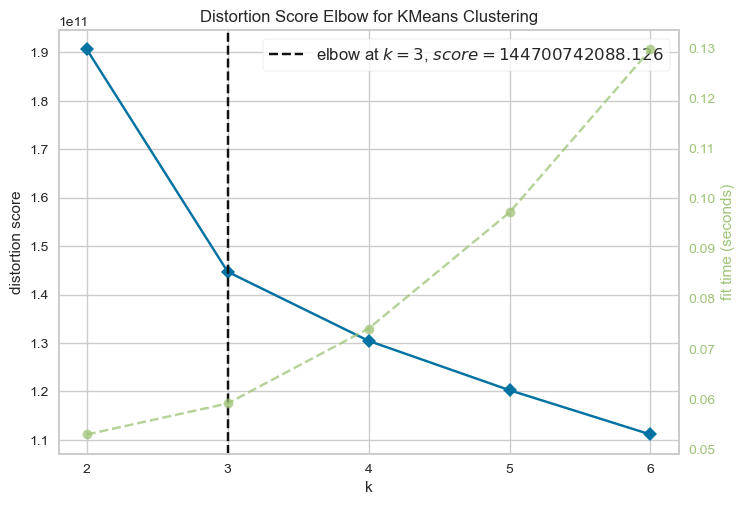

In [ ]:
fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2,7), ax=ax)
visualizer.fit(data_train)
ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

#### Silhouette score

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters in a range of [-1, 1].  
Silhouette coefficients close to +1 indicate that the sample is far from the neighboring clusters. A value of 0 indicates that the sample is very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. The Silhouette score is a mean of the values.

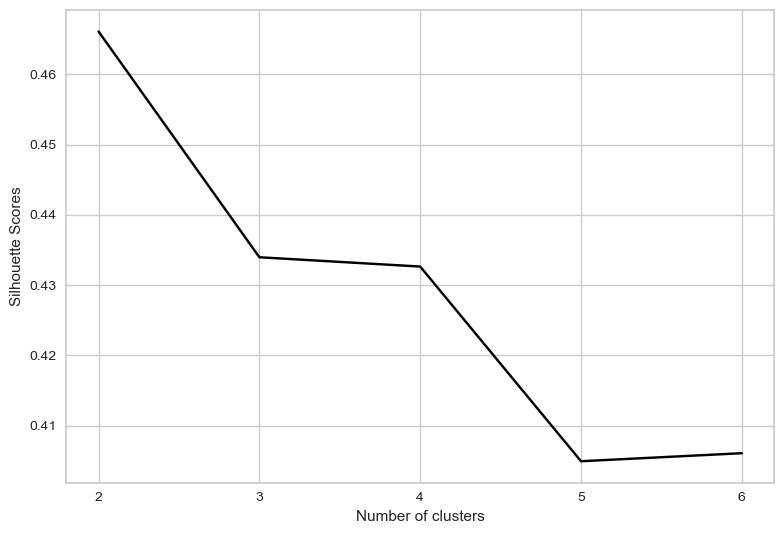

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')
    km.fit(data_train)
    silhouette_scores.append(silhouette_score(data_train, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, color="black")
#ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

#### Silhouette analysis

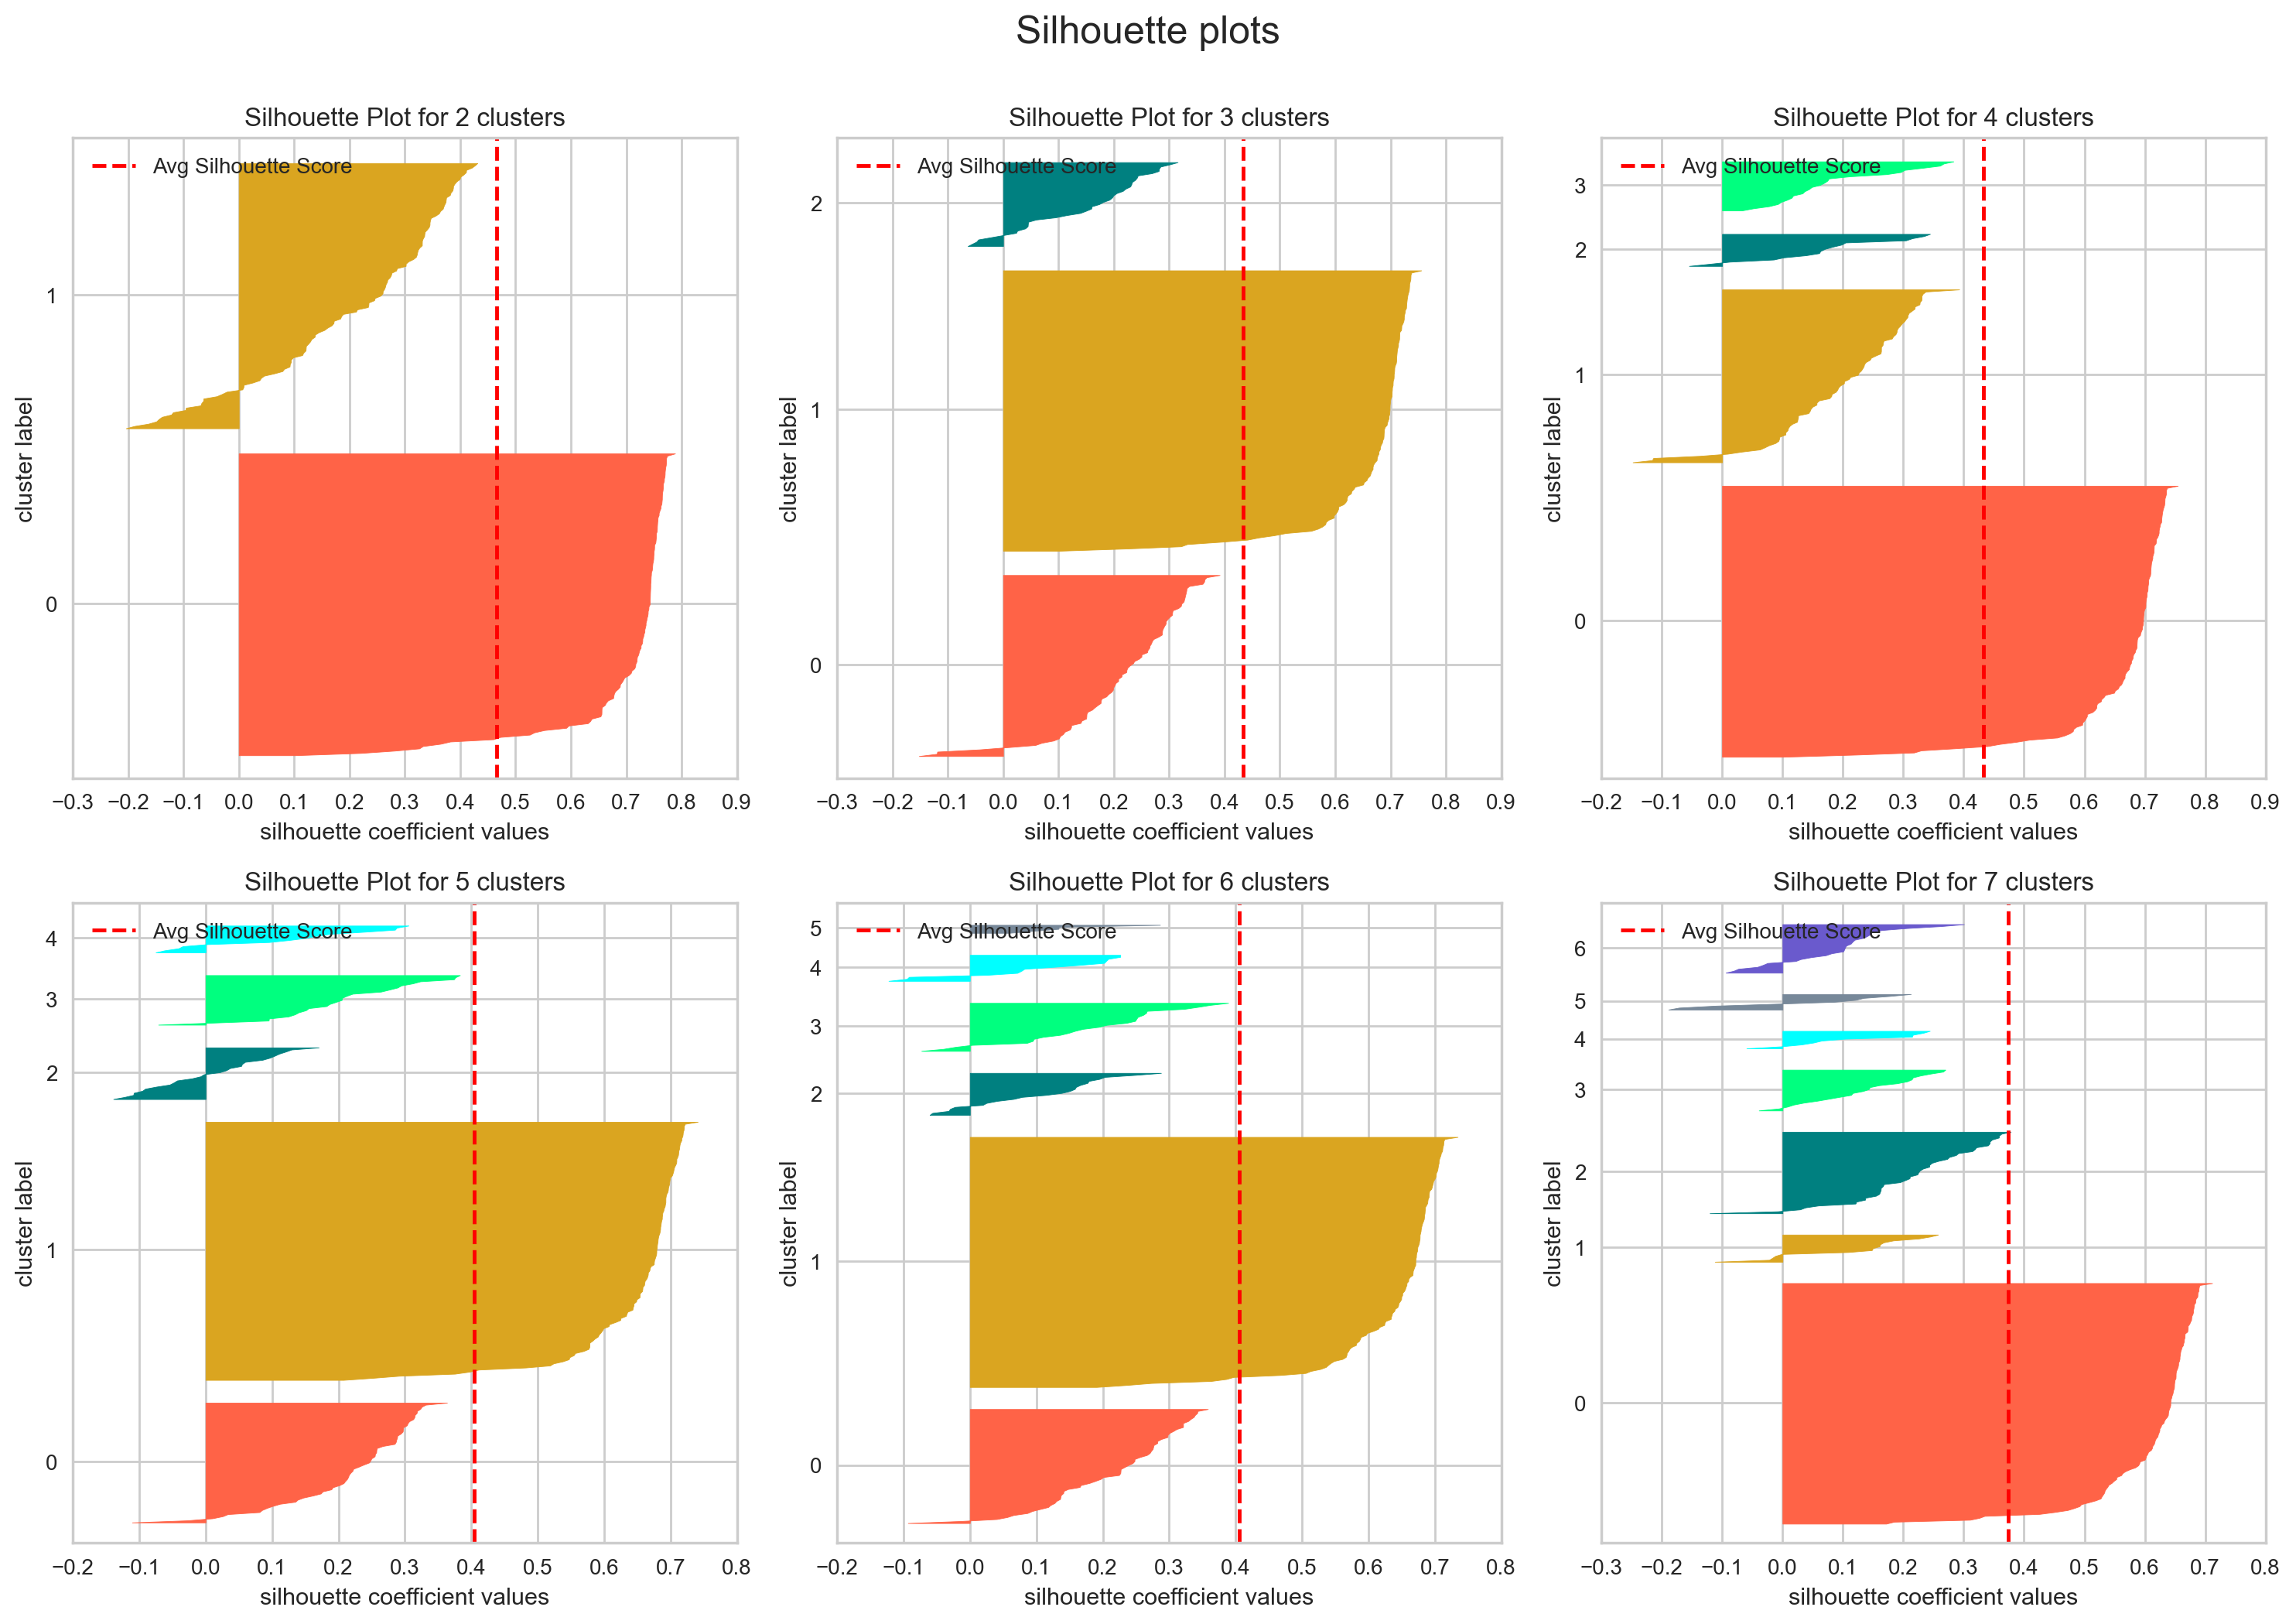

In [ ]:
def silhouette_plot(X, model, ax, colors):
    y_lower = 10
    y_tick_pos_ = []
    sh_samples = silhouette_samples(X, model.labels_)
    sh_score = silhouette_score(X, model.labels_)
    
    for idx in range(model.n_clusters):
        values = sh_samples[model.labels_ == idx]
        values.sort()
        size = values.shape[0]
        y_upper = y_lower + size
        ax.fill_betweenx(np.arange(y_lower, y_upper),0,values,
                         facecolor=colors[idx],edgecolor=colors[idx]
        )
        y_tick_pos_.append(y_lower + 0.5 * size)
        y_lower = y_upper + 10

    ax.axvline(x=sh_score, color="red", linestyle="--", label="Avg Silhouette Score")
    ax.set_title("Silhouette Plot for {} clusters".format(model.n_clusters))
    l_xlim = max(-1, min(-0.1, round(min(sh_samples) - 0.1, 1)))
    u_xlim = min(1, round(max(sh_samples) + 0.1, 1))
    ax.set_xlim([l_xlim, u_xlim])
    ax.set_ylim([0, X.shape[0] + (model.n_clusters + 1) * 10])
    ax.set_xlabel("silhouette coefficient values")
    ax.set_ylabel("cluster label")
    ax.set_yticks(y_tick_pos_)
    ax.set_yticklabels(str(idx) for idx in range(model.n_clusters))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.legend(loc="best")
    return ax

k_max = 7
ncols = 3
nrows = k_max // ncols + (k_max % ncols > 0)
fig = plt.figure(figsize=(15,15), dpi=200)

for k in range(2,k_max+1):
    
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')

    km_fit = km.fit(data_train)
    
    ax = plt.subplot(nrows, ncols, k-1)
    silhouette_plot(data_train, km_fit,ax, cluster_colors)

fig.suptitle("Silhouette plots", fontsize=18, y=1)
plt.tight_layout()
plt.show()

Analyzing these plots, we understand that the best choice of clusters should be 2. The elbow method also suggests that clustering with k=3 makes sense. This means that there may be a further division between cells in addition to the basic 'Hypoxia' and 'Normoxia'.

We also see that for every choice of k there is a cluster that is more defined, the bigger one.  


Let's proceed with clustering:
- we perform the k-mean clustering;
- we plot the result on the principal components;
- we perform a cluster diagnosis, analysing the cardinality and magnitude of each cluster.

#### 2 clusters

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=2352).fit(data_train)
kmeans.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

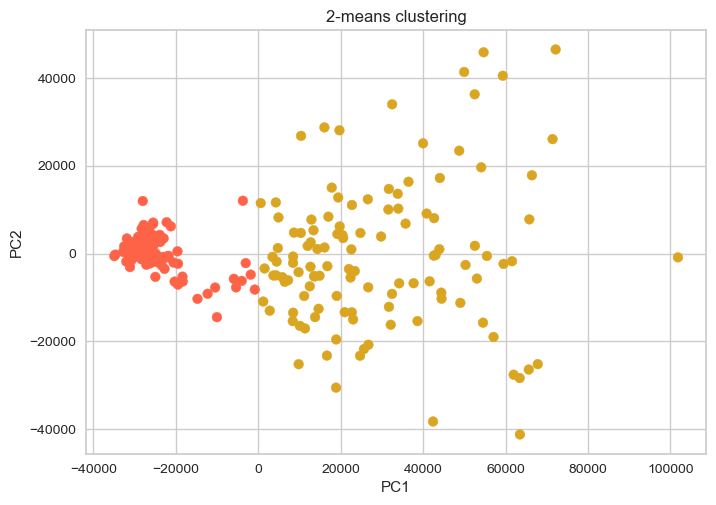

In [ ]:
x = np.array(data_pr3['PC1'])
y = np.array(data_pr3['PC2'])
plt.scatter(x, y, c=kmeans.labels_, cmap=ListedColormap(cluster_colors[:2]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("2-means clustering")
plt.show()

Elevation: 20  Azimut: 120


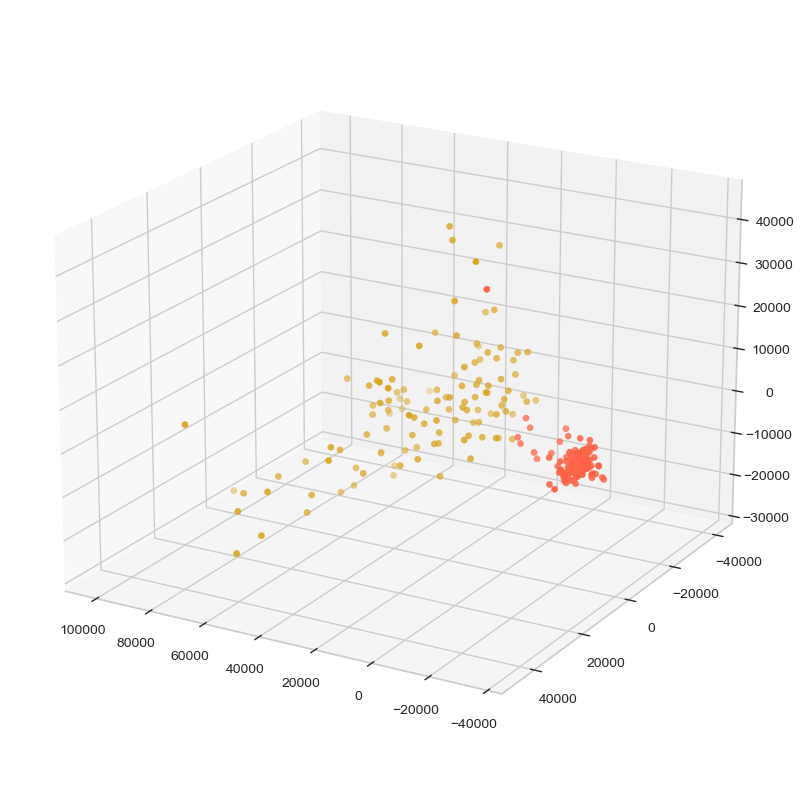

In [ ]:
KM_plot(20, 120, kmeans)

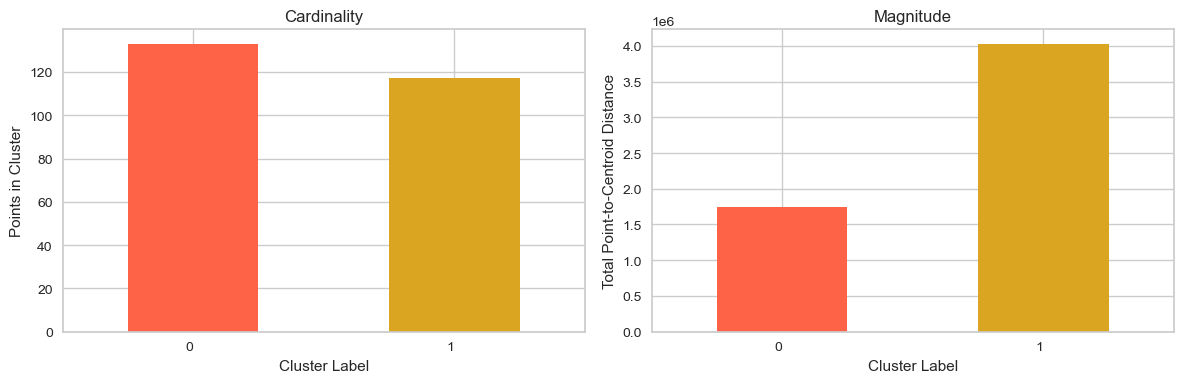

In [ ]:
diagnoses(kmeans, data_train, cluster_colors)

#### 3 clusters

In [ ]:
kmeans2 = KMeans(n_clusters=3, random_state=2352).fit(data_train)
kmeans2.labels_

array([1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 2], dtype=int32)

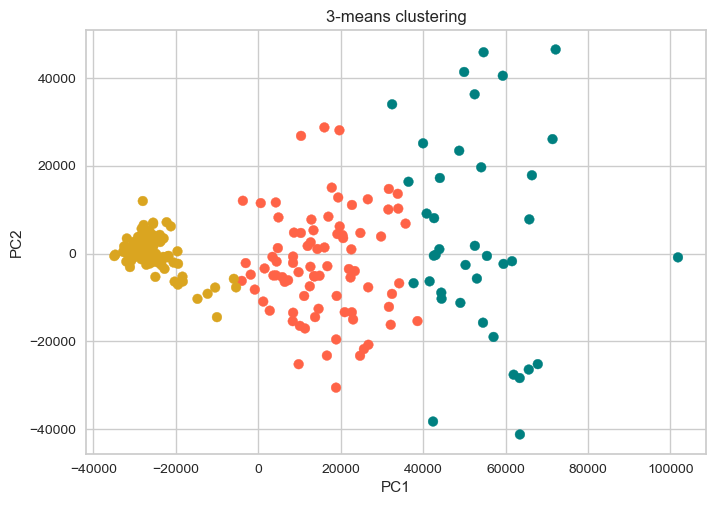

In [ ]:
x = np.array(data_pr3['PC1'])
y = np.array(data_pr3['PC2'])
plt.scatter(x, y, c=kmeans2.labels_, cmap=ListedColormap(cluster_colors[:3]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("3-means clustering")
plt.show()

Elevation: 20  Azimut: 120


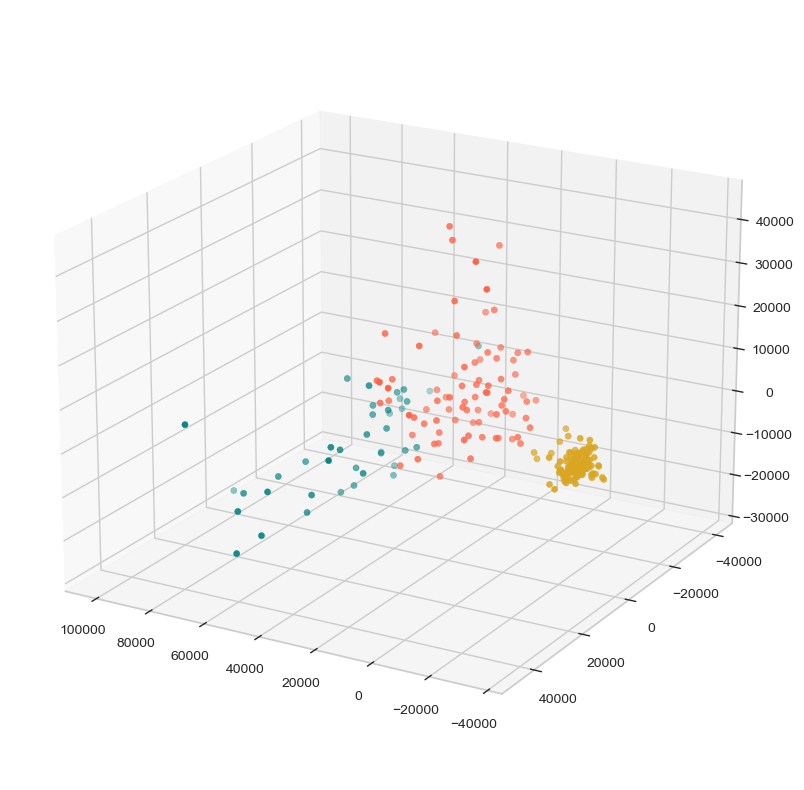

In [ ]:
KM_plot(20, 120, kmeans2)

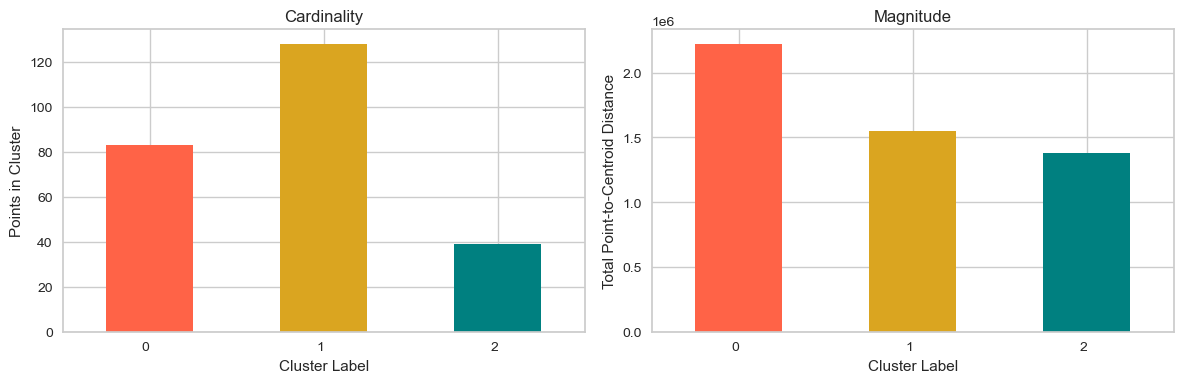

In [ ]:
diagnoses(kmeans2, data_train, cluster_colors)

Doing clustering we identify two main clusters. Comparing the plots with the visualization of PCA, we understand that these two clusters effectively divide cells into normoxic and hypoxic with a high accuracy.

Let's quantify how good is this division by defining a clustering accuracy.

In [ ]:
def clustering_accuracy(clust_labels, og_labels):
    print("Clustering accuracy:",
          max(np.count_nonzero(clust_labels == og_labels) * 100 / len(og_labels), 100 - np.count_nonzero(clust_labels == og_labels) * 100 / len(og_labels)),
            "%")

In [ ]:
og_labels = data_pr2_lab["Condition"].values
clust_predict = kmeans.labels_
clustering_accuracy(og_labels, clust_predict)

Clustering accuracy: 97.2 %


Hence, K-means clustering is able to distinguish cells with a 97.2% precision score, measured as the number of correct classifications divided by the total number of samples.

Doing a 3-means clustering, we notice that we can still visualize the Normoxic cells' cluster that we detected with a 2-clustering, while the cluster corresponding to Hypoxic cells is splitted in two halves. The interpretation we could give is that there are two subclasses of Hypoxic cells, that may be related to a different level of oxygen supply (the blue cluster could be the cells with less oxygen) and to some other factors that should be discussed with an expert.

### **Agglomerative Clustering**

We perform agglomerative clustering using the standard euclidean distance, that fits quite well the task of identifying the distance between cells, and using the ward linkage. Other linkage were tried out (single, average and complete) but the results were much worse.

In [ ]:
agglomerative = AgglomerativeClustering().fit(data_train)
agglomerative.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0])

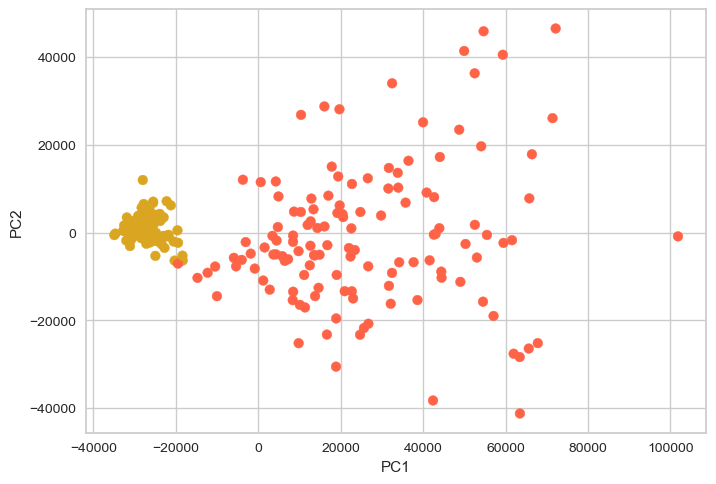

In [ ]:
x = np.array(data_pr3['PC1'])
y = np.array(data_pr3['PC2'])
plt.scatter(x, y, c=agglomerative.labels_, cmap=ListedColormap(cluster_colors[:2]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

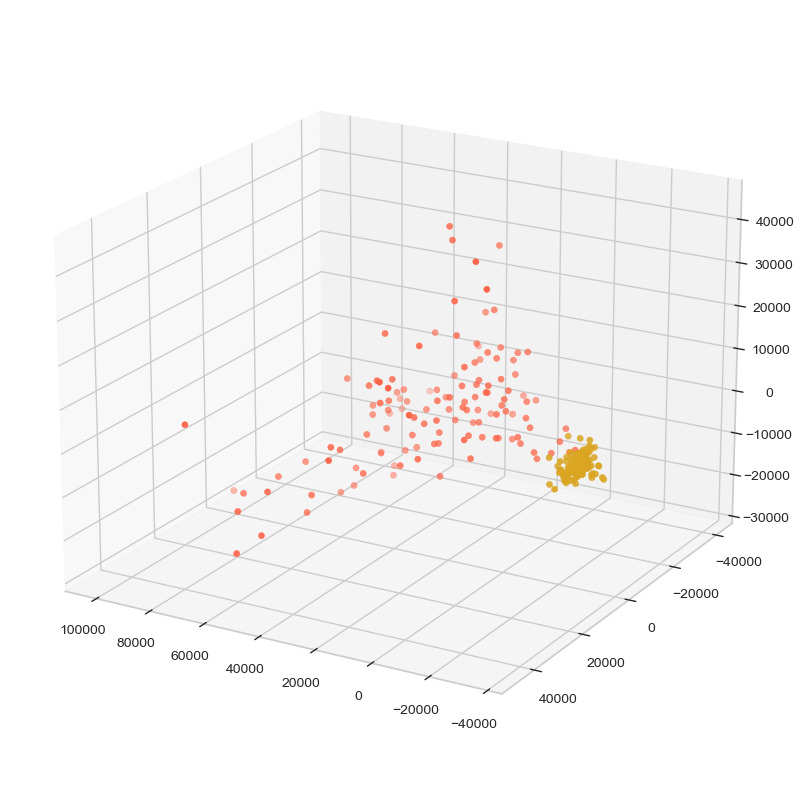

In [ ]:
AG_plot(20,120)

In [ ]:
agg_predict = agglomerative.labels_
clustering_accuracy(og_labels, agg_predict)

Clustering accuracy: 98.0 %


We can also plot the results in a dendogram:

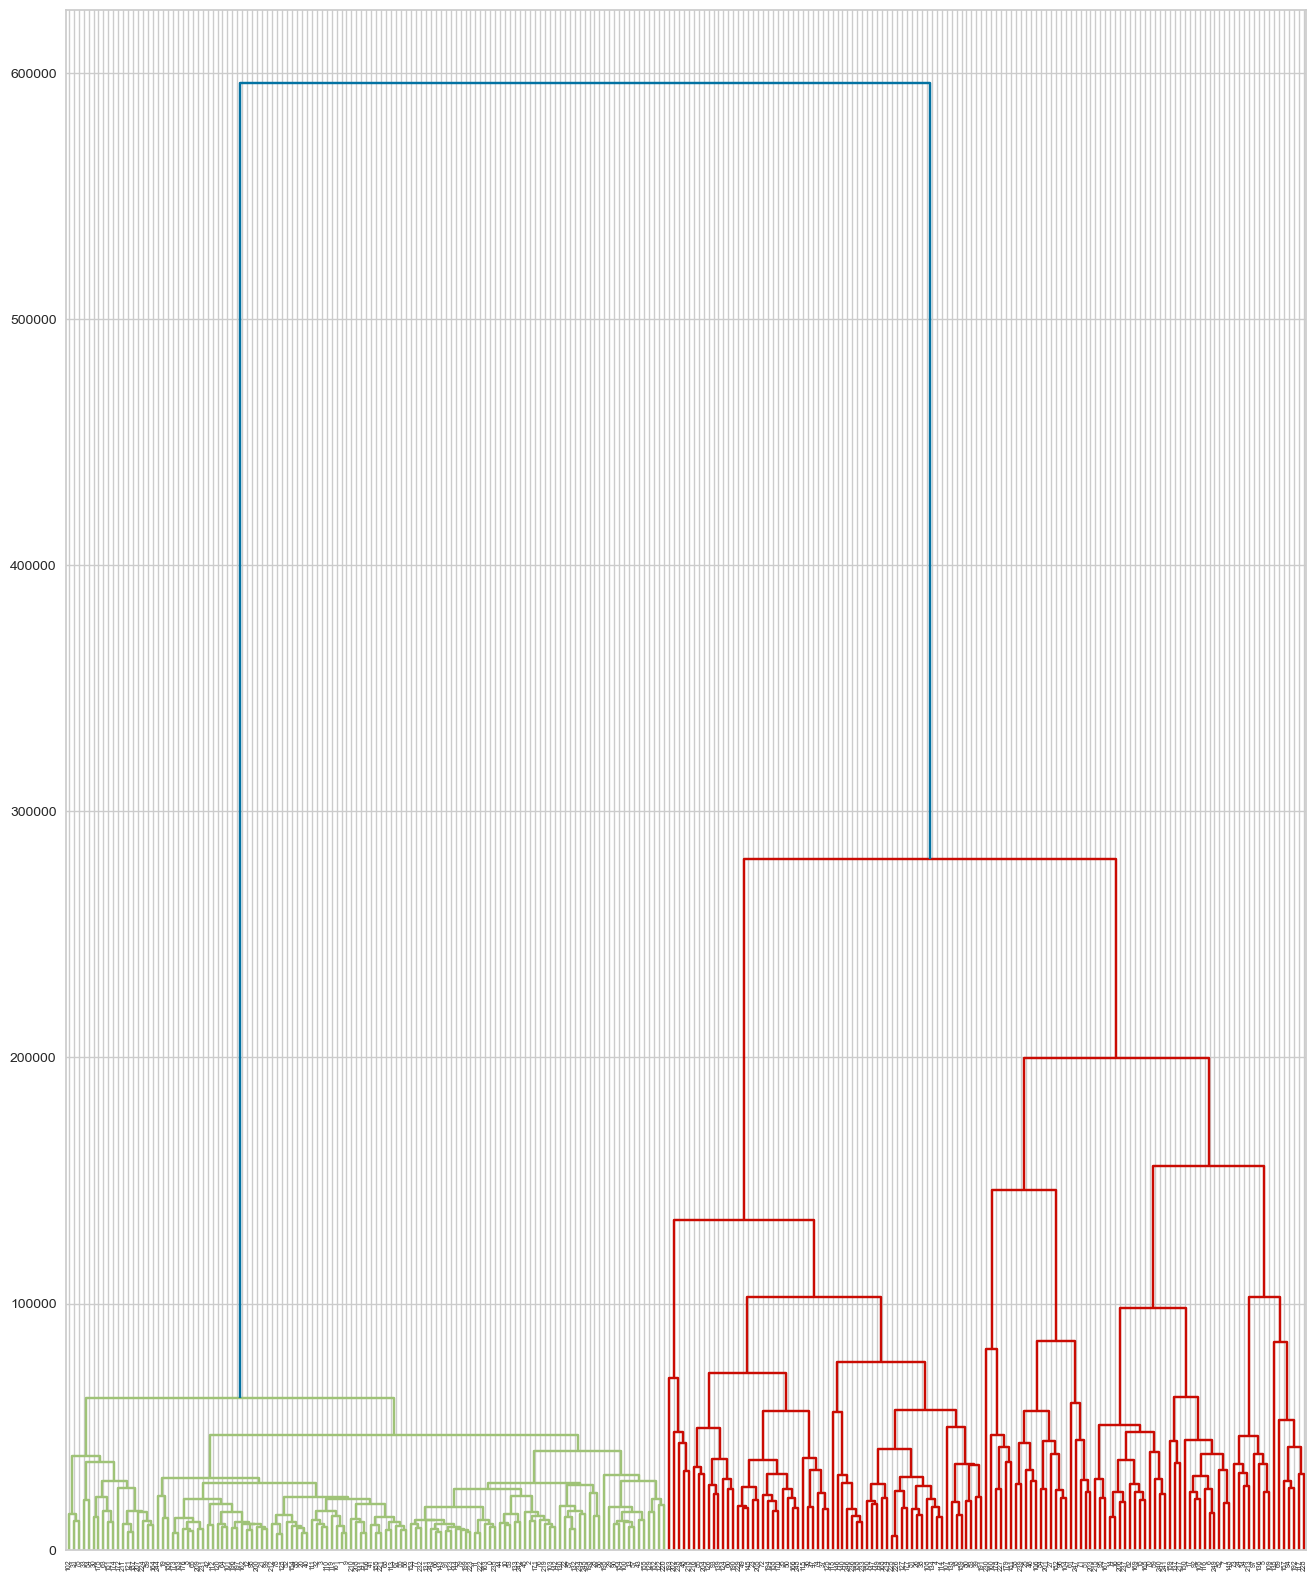

In [ ]:
plot_dendrogram(agglomerative)

The performed agglomerative clustering seems to confirm the results of the k-means clustering: the accuracy is 98%.  

Now we can proceed by performing clustering on the space defined by the first 2 and 3 principal components. We start by performing agglomerative clustering.

### Clustering of principal components

### **Agglomerative Clustering**

In [ ]:
agg_PC2 = AgglomerativeClustering().fit(data_pr2)
agg_PC2.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0])

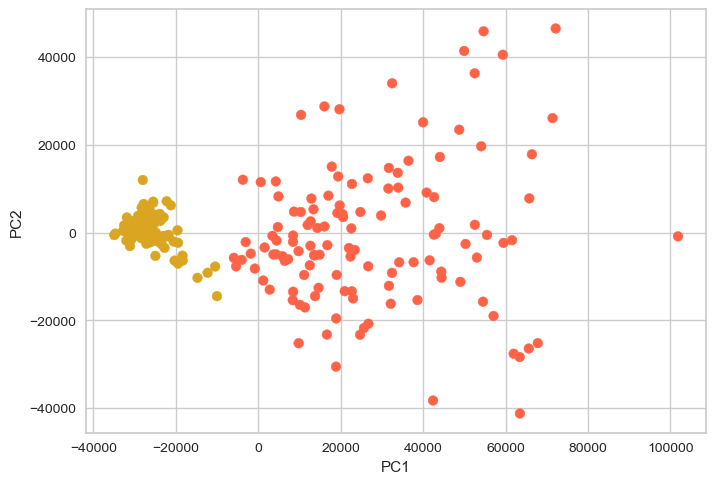

In [ ]:
x = np.array(data_pr3['PC1'])
y = np.array(data_pr3['PC2'])
plt.scatter(x, y, c=agg_PC2.labels_, cmap=ListedColormap(cluster_colors[:2]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
aggPC2_predict = agg_PC2.labels_
clustering_accuracy(og_labels, aggPC2_predict)

Clustering accuracy: 99.2 %


In [ ]:
agg_PC3 = AgglomerativeClustering().fit(data_pr3)
agg_PC3.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
aggPC3_predict = agg_PC3.labels_
clustering_accuracy(og_labels, aggPC3_predict)

Clustering accuracy: 98.4 %


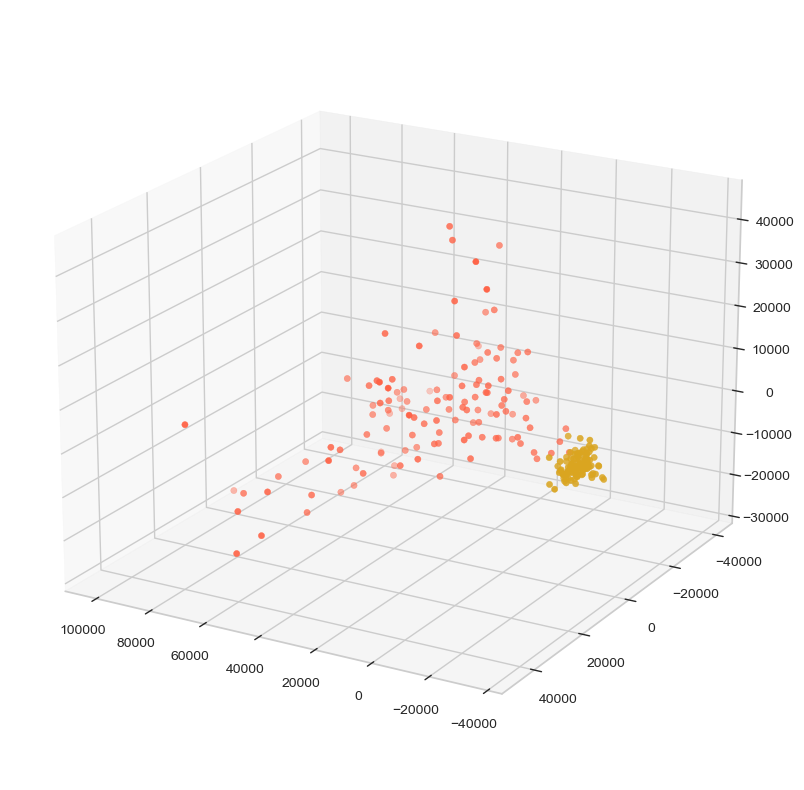

In [ ]:
AGPC_plot_int(20,120)

We can see that the cluster accuracy is even higher, both in the two and three dimensional spaces of principal components. Since the accuracy is already high, we avoid performing k-means on the space of principal components.

Now we pass to clustering for *HCC1806*, as the results are quite different.
In particular, we will see how the resulting clusters do not resemble the division in hypoxic and normoxic groups, previously visualized with PCA.
The methods, technique and analysis are similar to the ones used for MCF7.

### **K-Means**

#### Elbow method

/Users/emanuelemarinolibrandi/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

/Users/emanuelemarinolibrandi/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



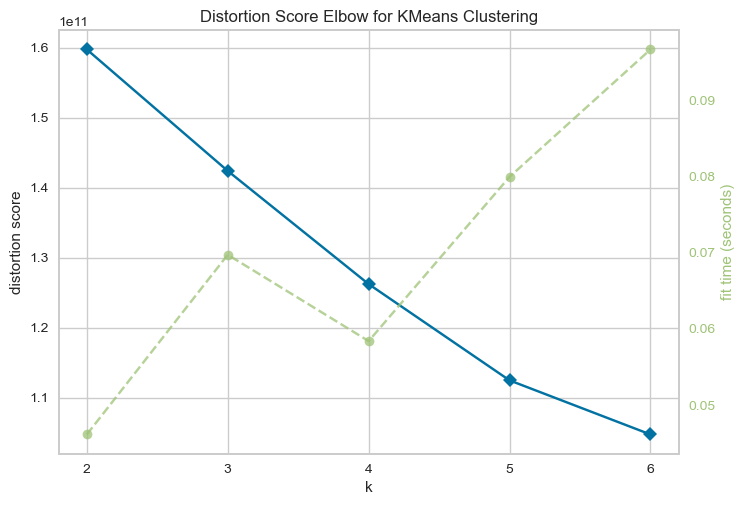

In [ ]:
fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2,7), ax=ax)
visualizer.fit(data_train)
ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

No knee or elbow point is detected in this case: we could already say that maybe cells in HCC1806 are not clearly diveded into clusters.

#### Silhouette score

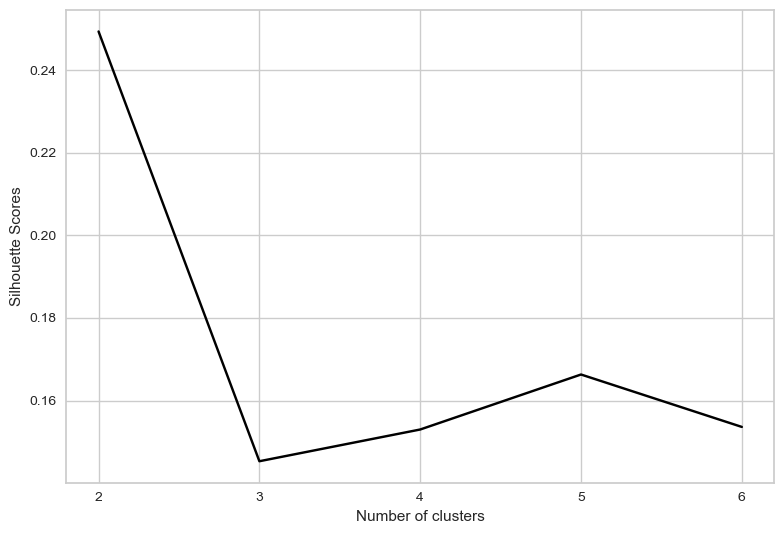

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')
    km.fit(data_train)
    silhouette_scores.append(silhouette_score(data_train, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, color="black")
#ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

#### Silhouette analysis

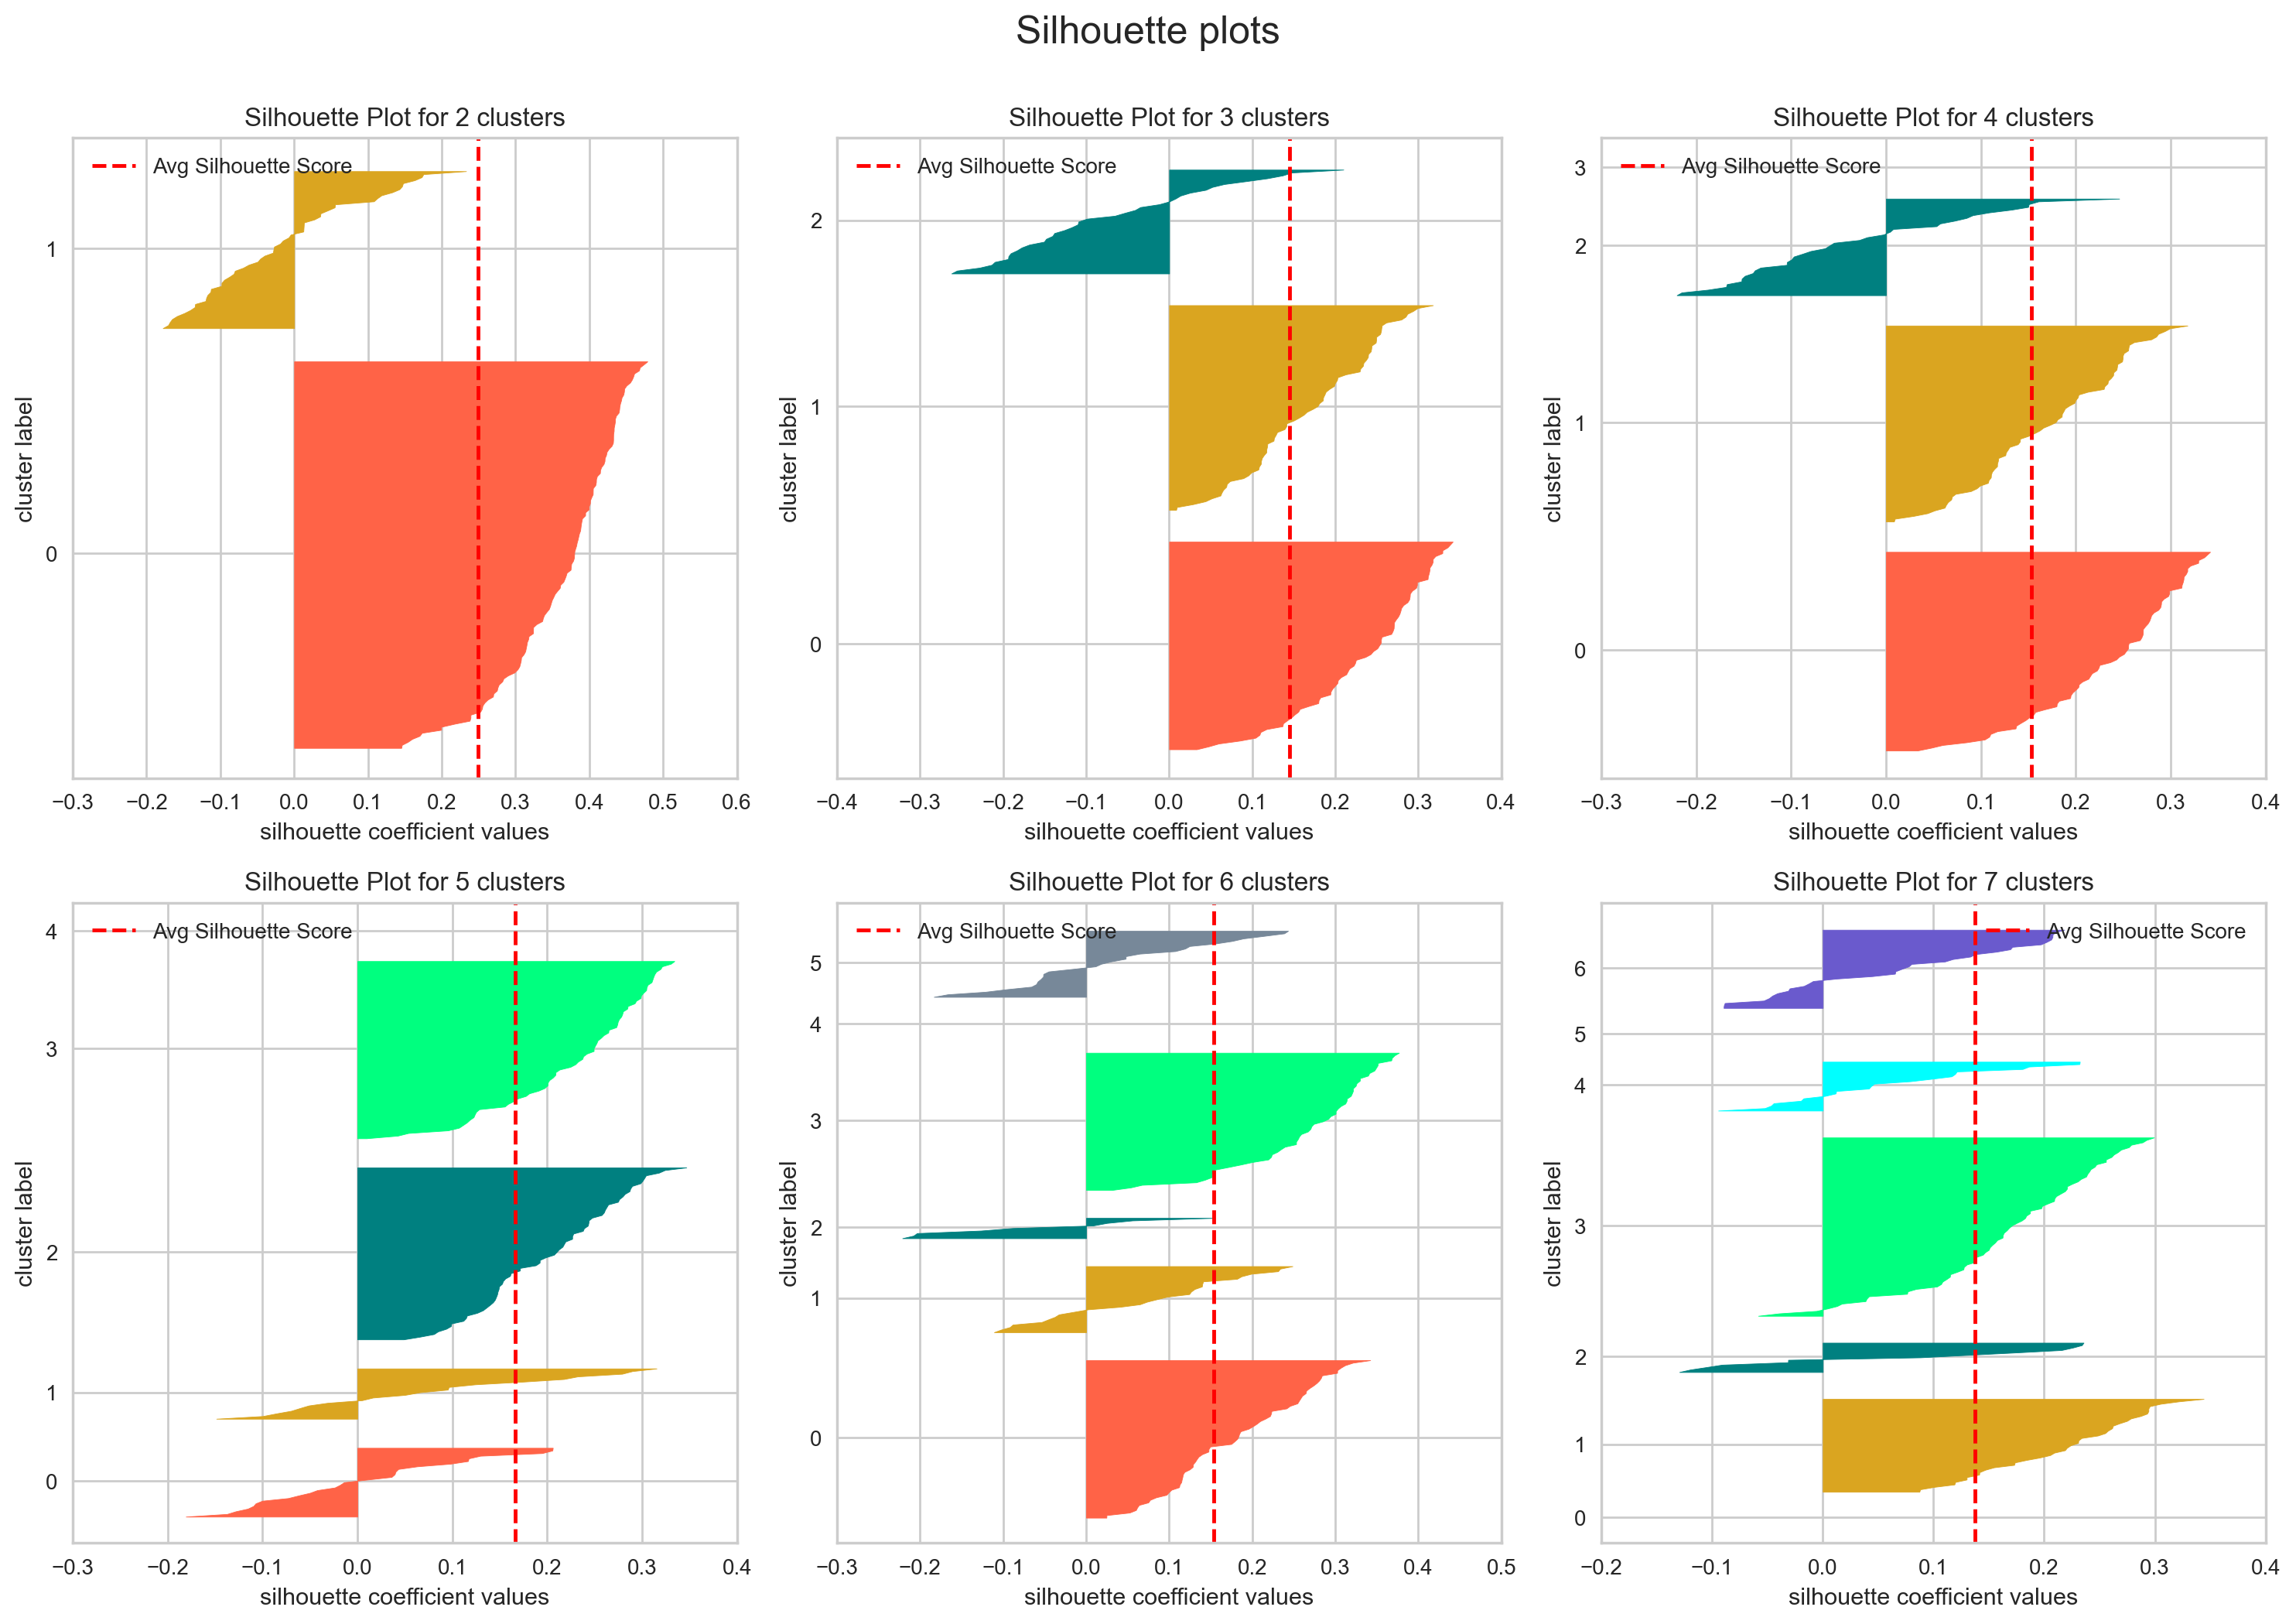

In [ ]:
def silhouette_plot(X, model, ax, colors):
    y_lower = 10
    y_tick_pos_ = []
    sh_samples = silhouette_samples(X, model.labels_)
    sh_score = silhouette_score(X, model.labels_)
    
    for idx in range(model.n_clusters):
        values = sh_samples[model.labels_ == idx]
        values.sort()
        size = values.shape[0]
        y_upper = y_lower + size
        ax.fill_betweenx(np.arange(y_lower, y_upper),0,values,
                         facecolor=colors[idx],edgecolor=colors[idx]
        )
        y_tick_pos_.append(y_lower + 0.5 * size)
        y_lower = y_upper + 10

    ax.axvline(x=sh_score, color="red", linestyle="--", label="Avg Silhouette Score")
    ax.set_title("Silhouette Plot for {} clusters".format(model.n_clusters))
    l_xlim = max(-1, min(-0.1, round(min(sh_samples) - 0.1, 1)))
    u_xlim = min(1, round(max(sh_samples) + 0.1, 1))
    ax.set_xlim([l_xlim, u_xlim])
    ax.set_ylim([0, X.shape[0] + (model.n_clusters + 1) * 10])
    ax.set_xlabel("silhouette coefficient values")
    ax.set_ylabel("cluster label")
    ax.set_yticks(y_tick_pos_)
    ax.set_yticklabels(str(idx) for idx in range(model.n_clusters))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.legend(loc="best")
    return ax

k_max = 7
ncols = 3
nrows = k_max // ncols + (k_max % ncols > 0)
fig = plt.figure(figsize=(15,15), dpi=200)

for k in range(2,k_max+1):
    
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')

    km_fit = km.fit(data_train)
    
    ax = plt.subplot(nrows, ncols, k-1)
    silhouette_plot(data_train, km_fit,ax, cluster_colors)

fig.suptitle("Silhouette plots", fontsize=18, y=1)
plt.tight_layout()
plt.show()

Contrary to MCF7, here we do not have any big cluster for any choice of k.  

Let's perform the clustering.

#### 2 clusters

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=2352).fit(data_train)
kmeans.labels_

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

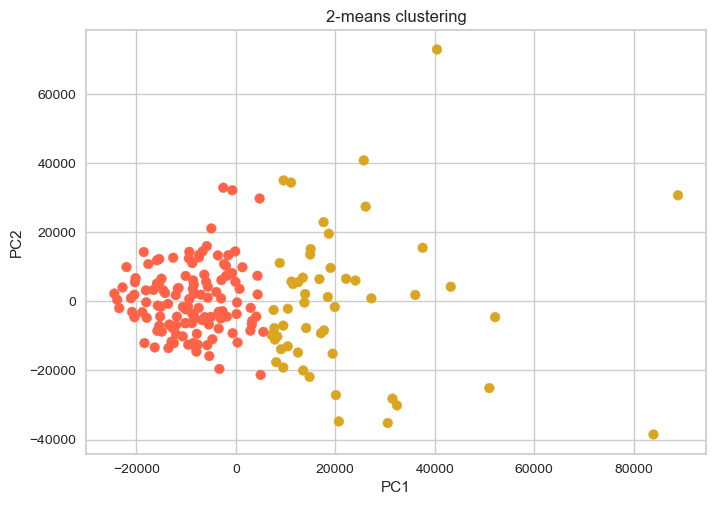

In [ ]:
x = np.array(data_pr3['PC1'])
y = np.array(data_pr3['PC2'])
plt.scatter(x, y, c=kmeans.labels_, cmap=ListedColormap(cluster_colors[:2]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("2-means clustering")
plt.show()

Elevation: 20  Azimut: 100


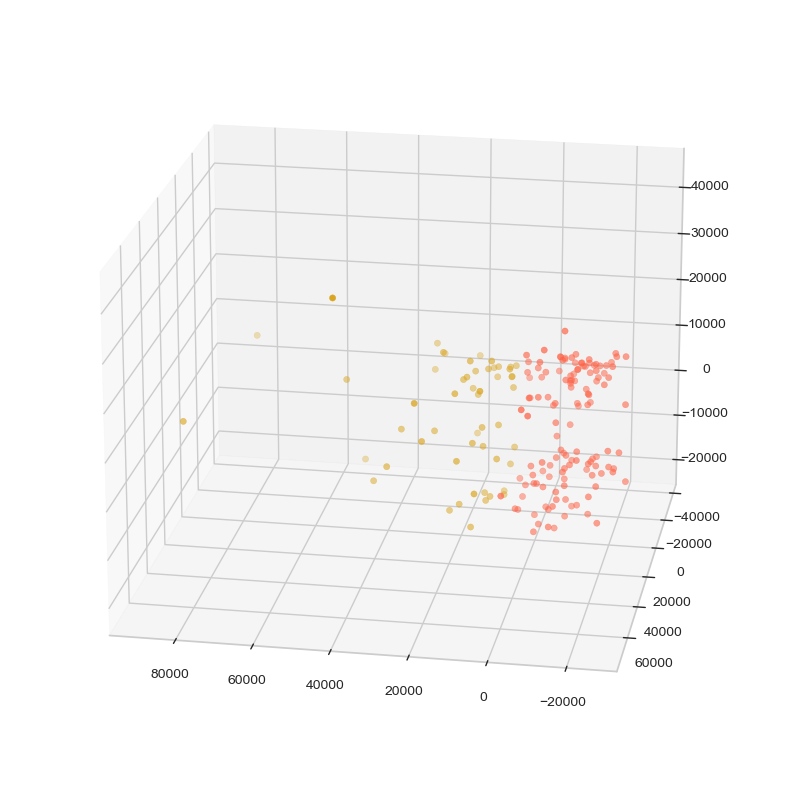

In [ ]:
KM_plot(20, 100, kmeans)

#### 3 clusters

In [ ]:
kmeans2 = KMeans(n_clusters=3, random_state=2352).fit(data_train)
kmeans2.labels_

array([0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2,
       2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0,
       2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2,
       0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1,
       1, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 1,
       2, 2, 2, 1, 2, 2], dtype=int32)

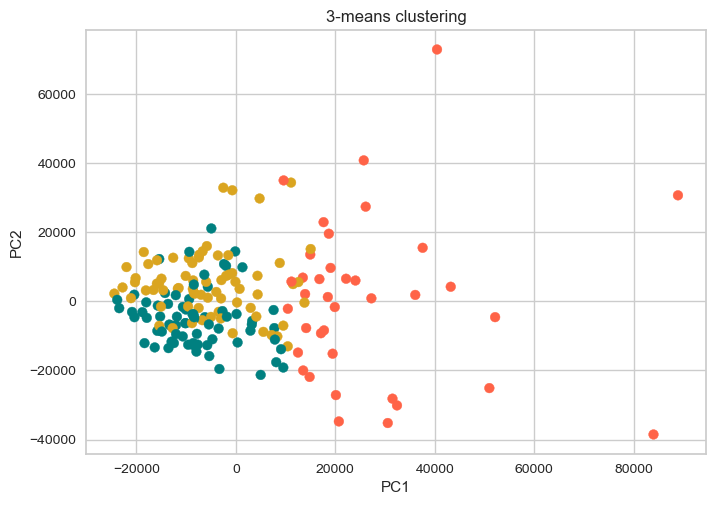

In [ ]:
x = np.array(data_pr3['PC1'])
y = np.array(data_pr3['PC2'])
plt.scatter(x, y, c=kmeans2.labels_, cmap=ListedColormap(cluster_colors[:3]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("3-means clustering")
plt.show()

Elevation: 20  Azimut: 100


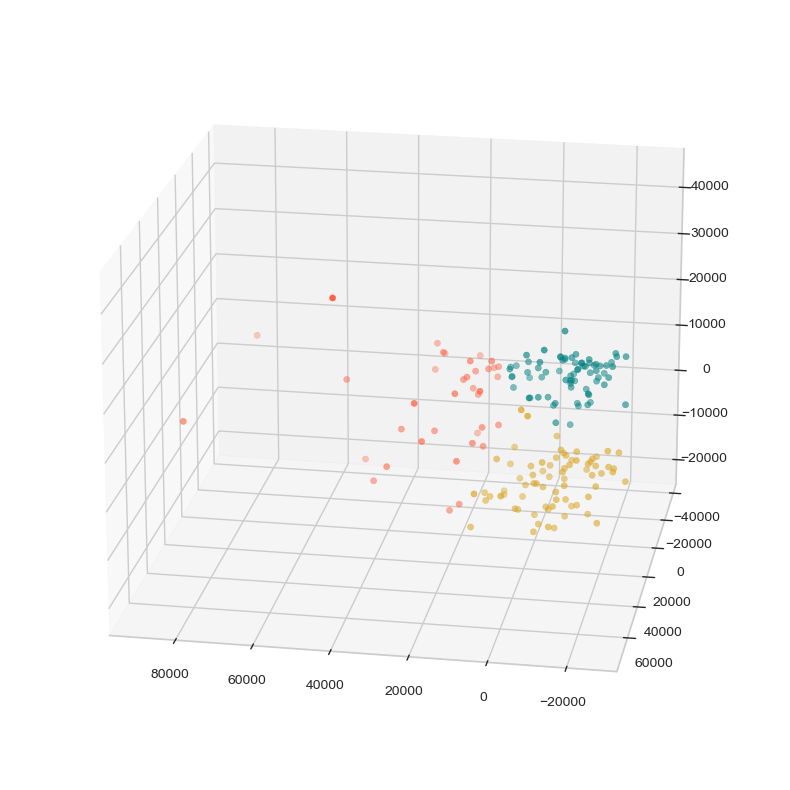

In [ ]:
KM_plot(20, 100, kmeans2)

The clustering does not gives us a great result: we can clearly see how many cells are misclassified. Since the centroids are randomly inizialized, we could try out different seeds: the result doesn't change anyway, it remains similar. Comparing the 3-means clustering with the classification of the cells, we see that it seems to define two clusters (out of three) that are more accurate. Now let's compute the accuracy of the clustering:

In [ ]:
og_labels = data_pr2_lab["Condition"].values
clust_predict = kmeans.labels_
clustering_accuracy(og_labels, clust_predict)

Clustering accuracy: 51.64835164835165 %


Hence, K-means clustering is able to distinguish cells with a 51.65% precision score, measured as the number of correct classifications divided by the total number of samples.

### **Agglomerative Clustering**

In [ ]:
agglomerative = AgglomerativeClustering().fit(data_train)
agglomerative.labels_

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

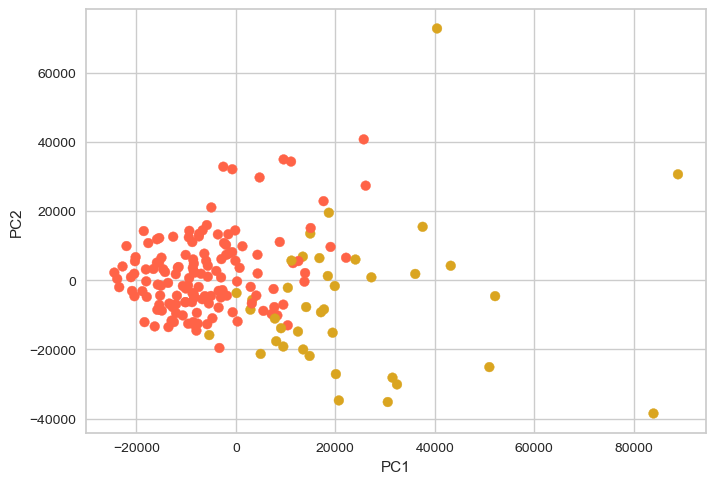

In [ ]:
x = np.array(data_pr3['PC1'])
y = np.array(data_pr3['PC2'])
plt.scatter(x, y, c=agglomerative.labels_, cmap=ListedColormap(cluster_colors[:2]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

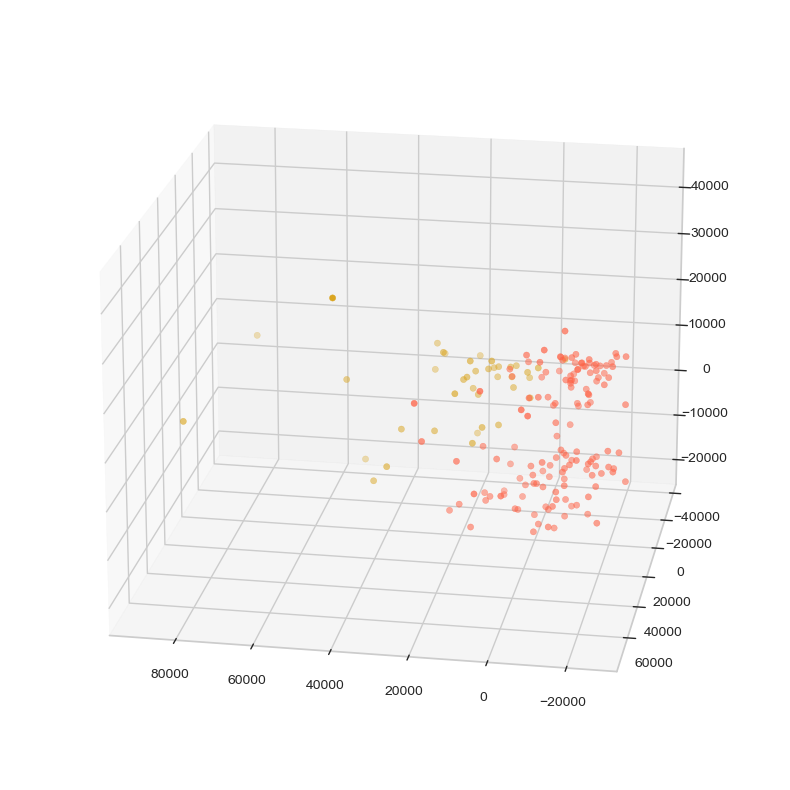

In [ ]:
AG_plot_k(20,100,2)

In [ ]:
agg_predict = agglomerative.labels_
clustering_accuracy(og_labels, agg_predict)

Clustering accuracy: 61.53846153846154 %


The accuracy of agglomerative clustering is thus higher: agglomerative clustering gives better results.

### Clustering of principal components

We perform only agglomerative clustering, as it seems more promising than k-means.

### **Agglomerative Clustering**

In [ ]:
agg_PC2 = AgglomerativeClustering().fit(data_pr2)
agg_PC2.labels_

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1])

In [ ]:
aggPC2_predict = agg_PC2.labels_
clustering_accuracy(og_labels, aggPC2_predict)

Clustering accuracy: 51.0989010989011 %


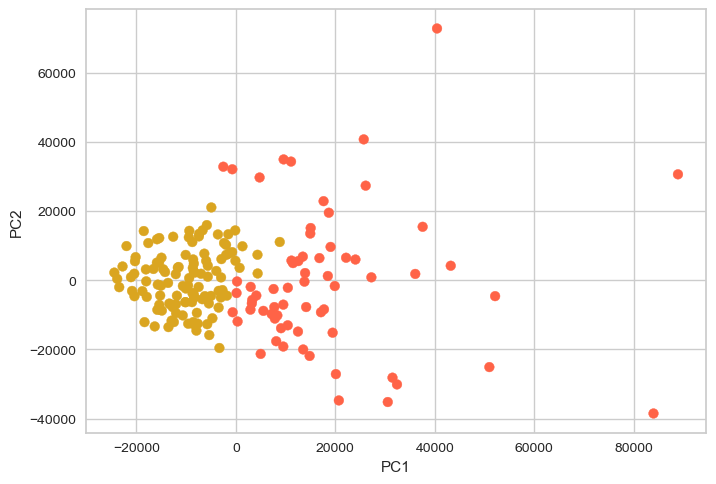

In [ ]:
x = np.array(data_pr3['PC1'])
y = np.array(data_pr3['PC2'])
plt.scatter(x, y, c=agg_PC2.labels_, cmap=ListedColormap(cluster_colors[:2]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
agg_PC3 = AgglomerativeClustering().fit(data_pr3)
agg_PC3.labels_

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
aggPC3_predict = agg_PC3.labels_
clustering_accuracy(og_labels, aggPC3_predict)

Clustering accuracy: 57.142857142857146 %


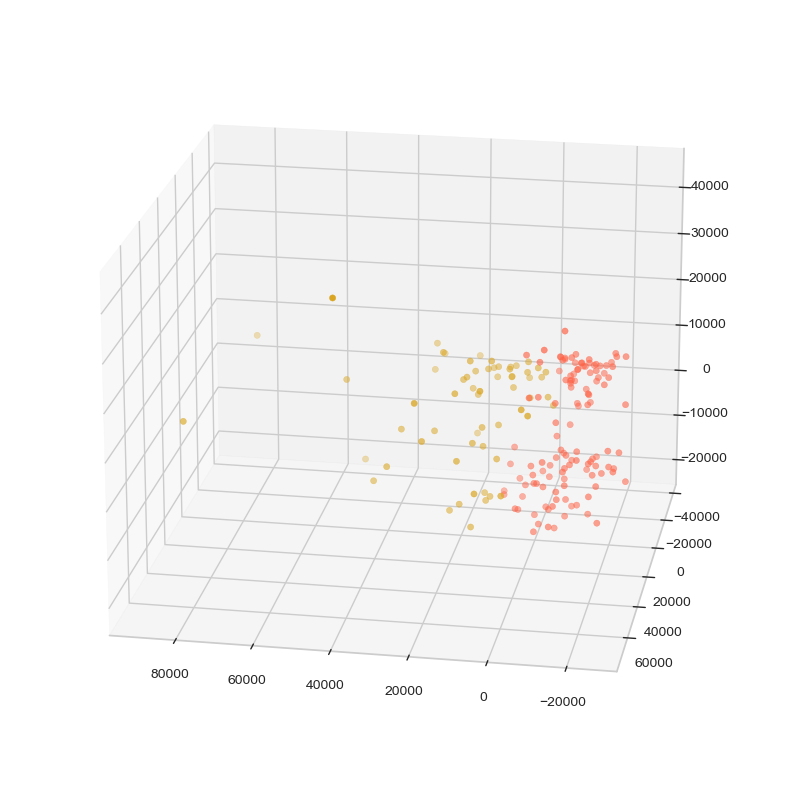

In [ ]:
AGPC_plot_int(20,100)

In the space of the principal components, agglomerative clustering performs worse.

Overall, clustering on HCC1806 does not give good results in trying to dividing cells into Normoxia and Hypoxia clusters. We should try different clustering methods to get a better division. We try out clustering using UMAP dimensionality reduction.

### Clustering using UMAP

UMAP is a nonlinear dimensionality reduction technique that aims to preserve the local and global structure of the data. It constructs a high-dimensional graph representation of the data, where each data point is connected to its nearest neighbors and then optimizes the embedding of the data points in a lower-dimensional space in a way that the distances between connected points in the high-dimensional graph are preserved as closely as possible in the lower-dimensional embedding.

After dimensionality reduction with UMAP, we perform k-means clustering on the space of the reduced components. 

In [ ]:
UMA = KMeans(n_clusters=2)
labels_UM = UMA.fit_predict(embedding)

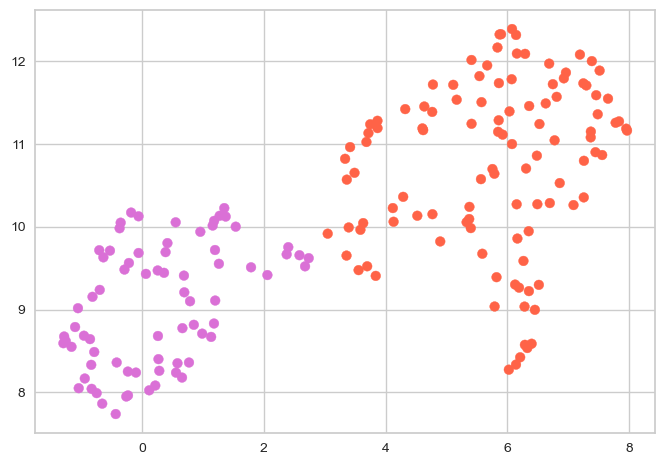

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels_UM, cmap=my_cmap)
plt.show()

In [ ]:
clustering_accuracy(og_labels, labels_UM)

Clustering accuracy: 86.81318681318682 %


The accuracy of this technique is significantly higher.

## Genes

We perform clustering on genes, to get more insights on the matter. We do it both in full dimension, projecting the results with PCA, and in the space of the principal components. We use the same methods and techniques as before:  
- k-means clustering (establishing the number of clusters with the methods described before)  
- agglomerative clustering   

### Clustering in full dimensions and visualization of the results with PCA

### **K-Means**

We start by the determining the right number of clusters (with the same methods used before).

#### Elbow method

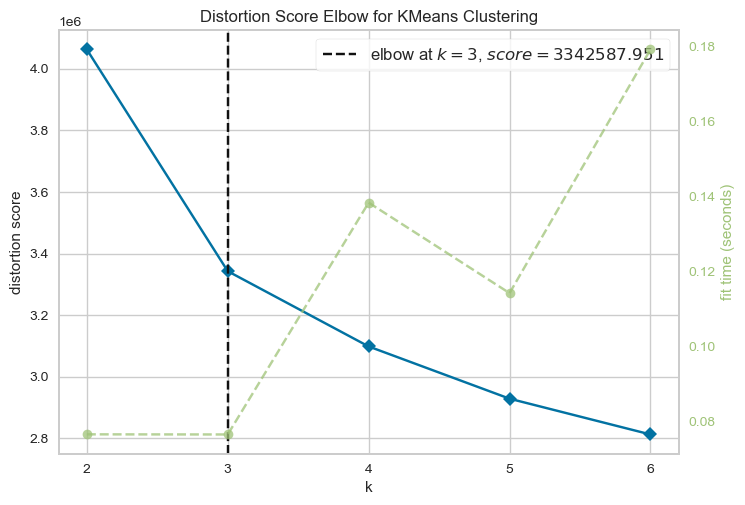

In [ ]:
fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(), k=(2,7),ax=ax)
visualizer.fit(data_genes)
ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

#### Silhouette score

/var/folders/r2/bld_lf155710hgxgss_mfsym0000gn/T/ipykernel_35472/1442953304.py:14: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.



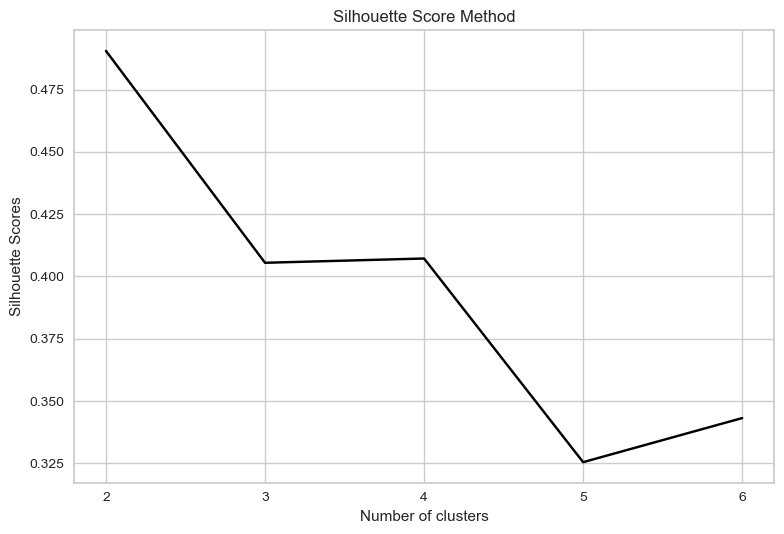

In [ ]:
silhouette_scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')
    km.fit(data_genes)
    silhouette_scores.append(silhouette_score(data_genes, km.labels_))

fig, ax = plt.subplots()
ax.plot(range(2, 7), silhouette_scores, 'bx-', color="black")
ax.set_title('Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Scores')
plt.xticks(range(2, 7))
plt.tight_layout()
plt.show()

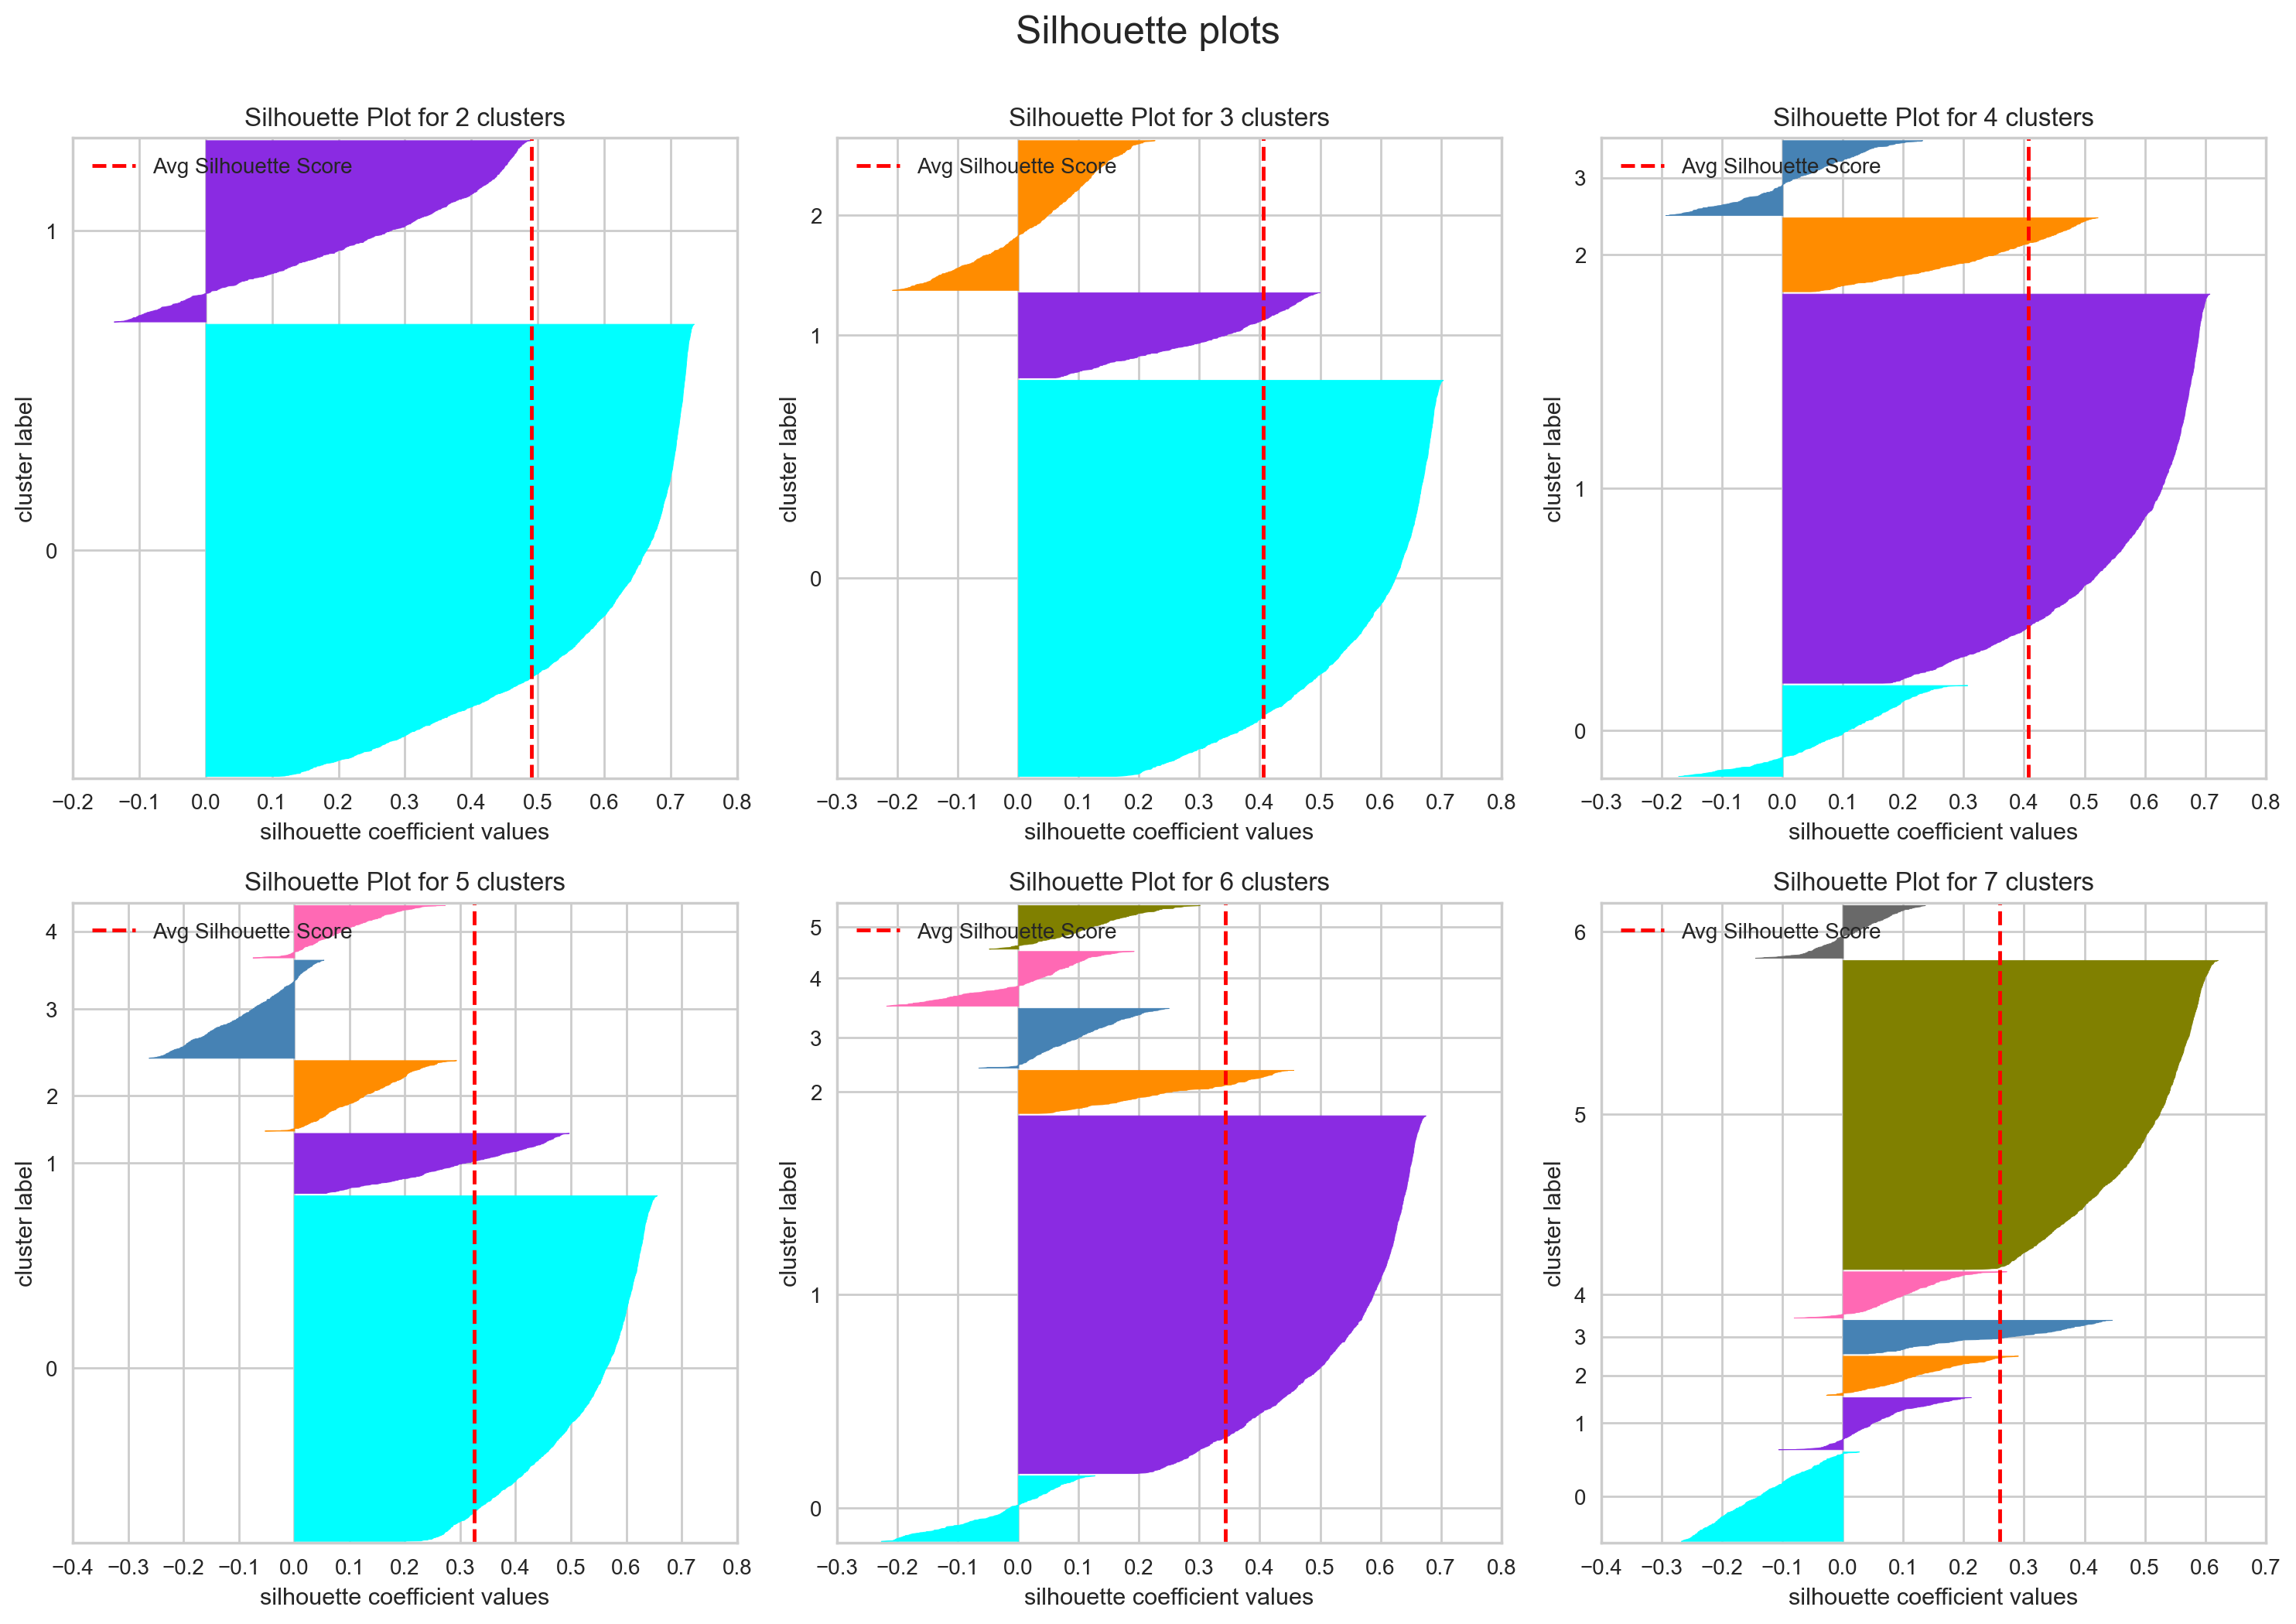

In [ ]:
def silhouette_plot(X, model, ax, colors):
    y_lower = 10
    y_tick_pos_ = []
    sh_samples = silhouette_samples(X, model.labels_)
    sh_score = silhouette_score(X, model.labels_)
    
    for idx in range(model.n_clusters):
        values = sh_samples[model.labels_ == idx]
        values.sort()
        size = values.shape[0]
        y_upper = y_lower + size
        ax.fill_betweenx(np.arange(y_lower, y_upper),0,values,
                         facecolor=colors[idx],edgecolor=colors[idx]
        )
        y_tick_pos_.append(y_lower + 0.5 * size)
        y_lower = y_upper + 10

    ax.axvline(x=sh_score, color="red", linestyle="--", label="Avg Silhouette Score")
    ax.set_title("Silhouette Plot for {} clusters".format(model.n_clusters))
    l_xlim = max(-1, min(-0.1, round(min(sh_samples) - 0.1, 1)))
    u_xlim = min(1, round(max(sh_samples) + 0.1, 1))
    ax.set_xlim([l_xlim, u_xlim])
    ax.set_ylim([0, X.shape[0] + (model.n_clusters + 1) * 10])
    ax.set_xlabel("silhouette coefficient values")
    ax.set_ylabel("cluster label")
    ax.set_yticks(y_tick_pos_)
    ax.set_yticklabels(str(idx) for idx in range(model.n_clusters))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax.legend(loc="best")
    return ax

k_max = 7
ncols = 3
nrows = k_max // ncols + (k_max % ncols > 0)
fig = plt.figure(figsize=(15,15), dpi=200)

for k in range(2,k_max+1):
    
    km = KMeans(n_clusters=k, 
                max_iter=300, 
                tol=1e-04, 
                init='k-means++', 
                n_init=10, 
                random_state=42, 
                algorithm='auto')

    km_fit = km.fit(data_genes)
    
    ax = plt.subplot(nrows, ncols, k-1)
    silhouette_plot(data_genes, km_fit,ax, genes_colors)

fig.suptitle("Silhouette plots", fontsize=18, y=1)
plt.tight_layout()
plt.show()

These analysis suggest us that the best number of clusters should be either two (silhouette) or three (elbow). Moreover, from the silhouette plot we clearly see that for any choice of k there is a big, main cluster.

#### 2 clusters

In [ ]:
kmeans_g2 = KMeans(n_clusters=2, random_state=1324).fit(data_genes)
kmeans_g2.labels_

array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

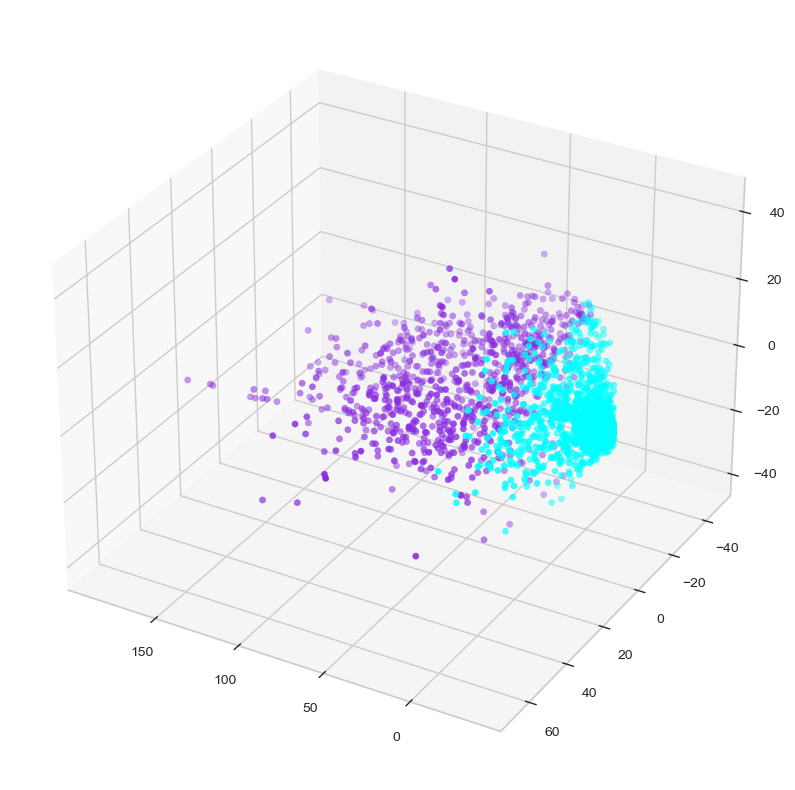

In [ ]:
KM_plot_k_int(30, 120, 2)

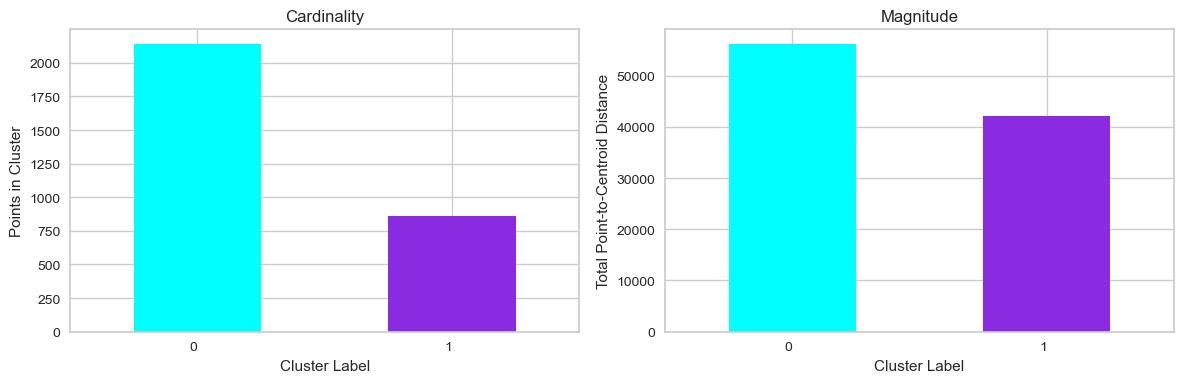

In [ ]:
diagnoses(kmeans_g2, data_genes, genes_colors)

#### 3 clusters

In [ ]:
kmeans_g3 = KMeans(n_clusters=3, random_state=1324).fit(data_genes)
kmeans_g3.labels_

array([2, 2, 1, ..., 1, 0, 0], dtype=int32)

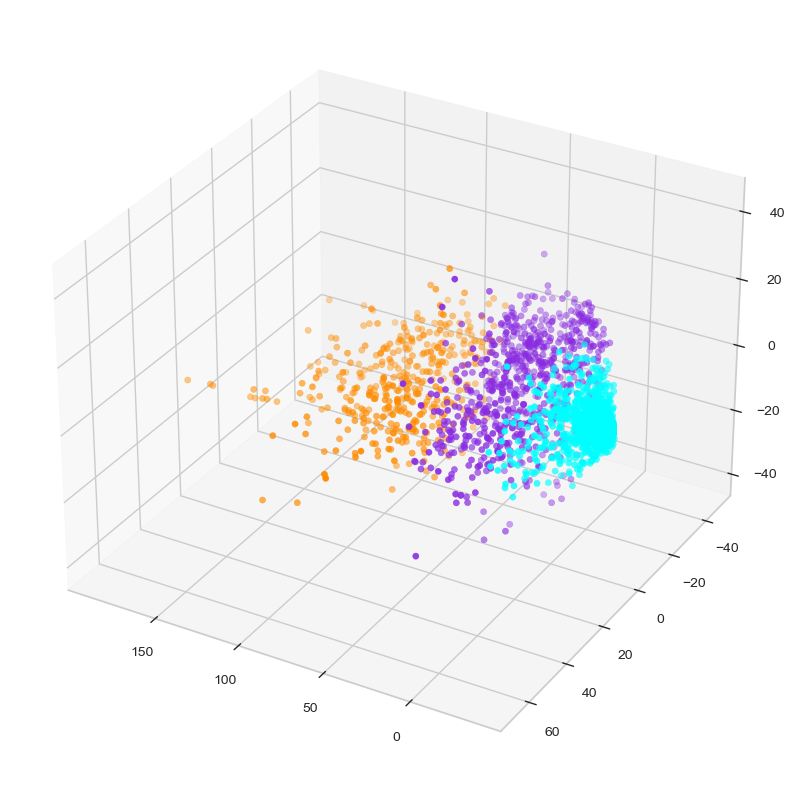

In [ ]:
KM_plot_k_int(30, 120, 3)

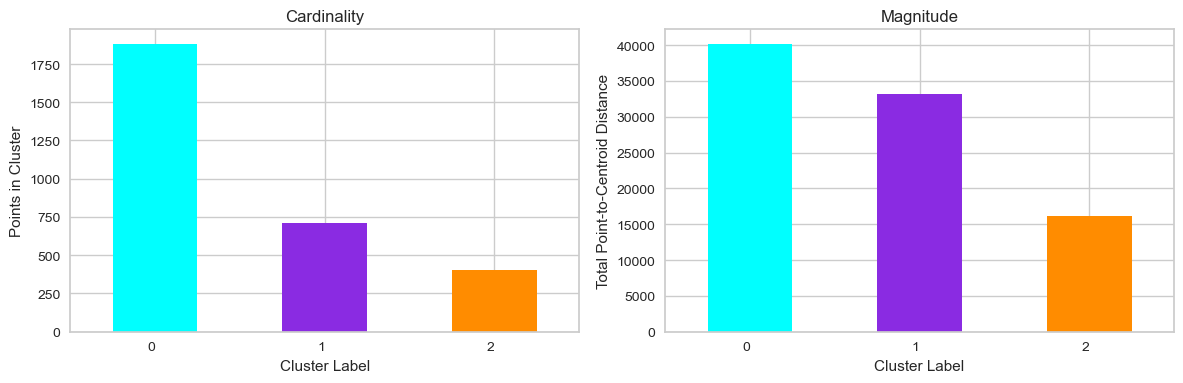

In [ ]:
diagnoses(kmeans_g3, data_genes, genes_colors)

 We also try with k=4, to see if we can spot other "classes" of genes.

#### 4 clusters

In [ ]:
kmeans_g4 = KMeans(n_clusters=4, random_state=1324).fit(data_genes)
kmeans_g4.labels_

array([3, 3, 1, ..., 1, 0, 0], dtype=int32)

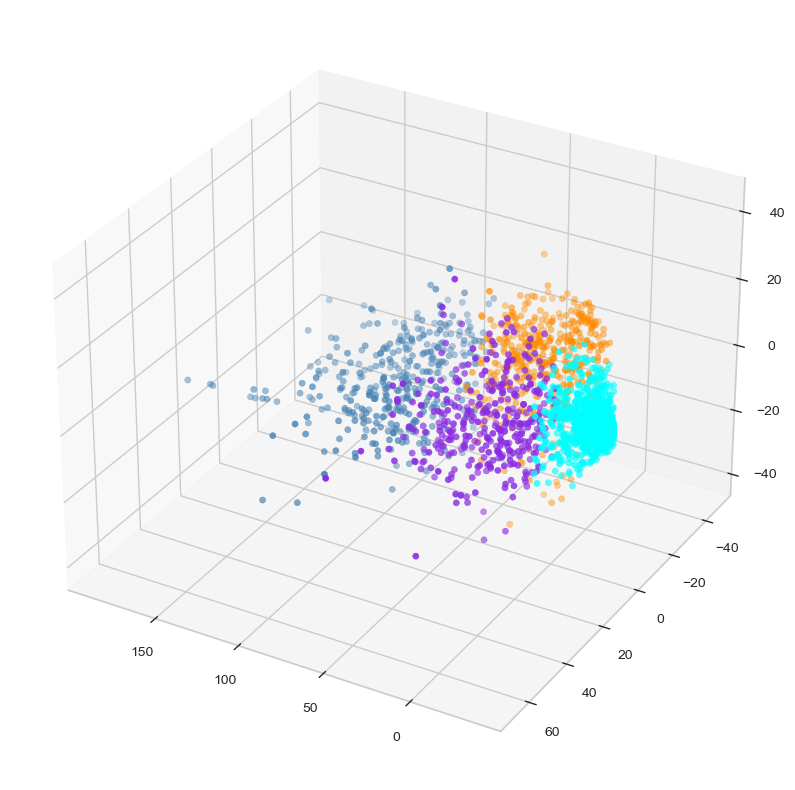

In [ ]:
KM_plot_k_int(30, 120, 4)

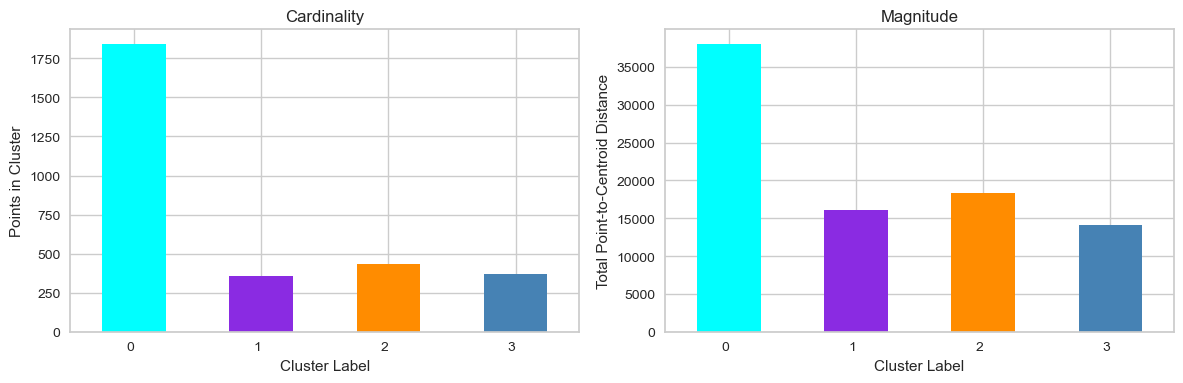

In [ ]:
diagnoses(kmeans_g4, data_genes, genes_colors)

### **Agglomerative clustering**

In [ ]:
agglomerative_g2 = AgglomerativeClustering().fit(data_pr3_g)
agglomerative_g2.labels_

array([0, 0, 0, ..., 0, 1, 1])

We also perform an agglomerative clustering, again using the euclidean distance and the ward linkage, visualizing the result with a plot.

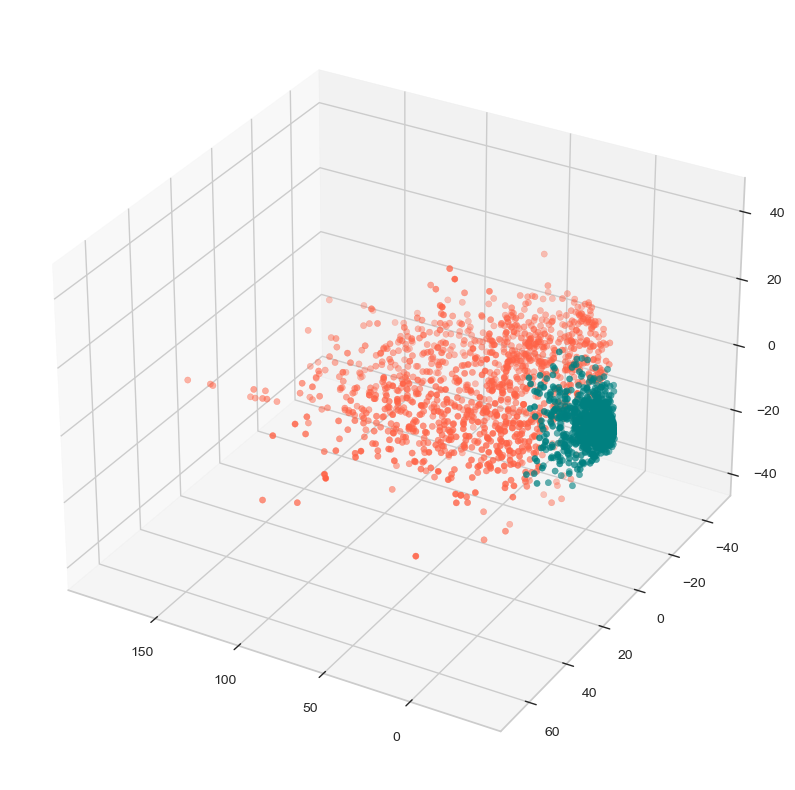

In [ ]:
AG_g_plot(30,120)

The execution of all these tasks on HCC1806 gave us very similar results. Indeed, as noticed before, the "distribution" of genes seems to be very similar between the two cell lines. The only thing we want to point out regards the 4-means clustering, in which we don't have a slightly different separation, that maybe could mean something from a biological point of view.

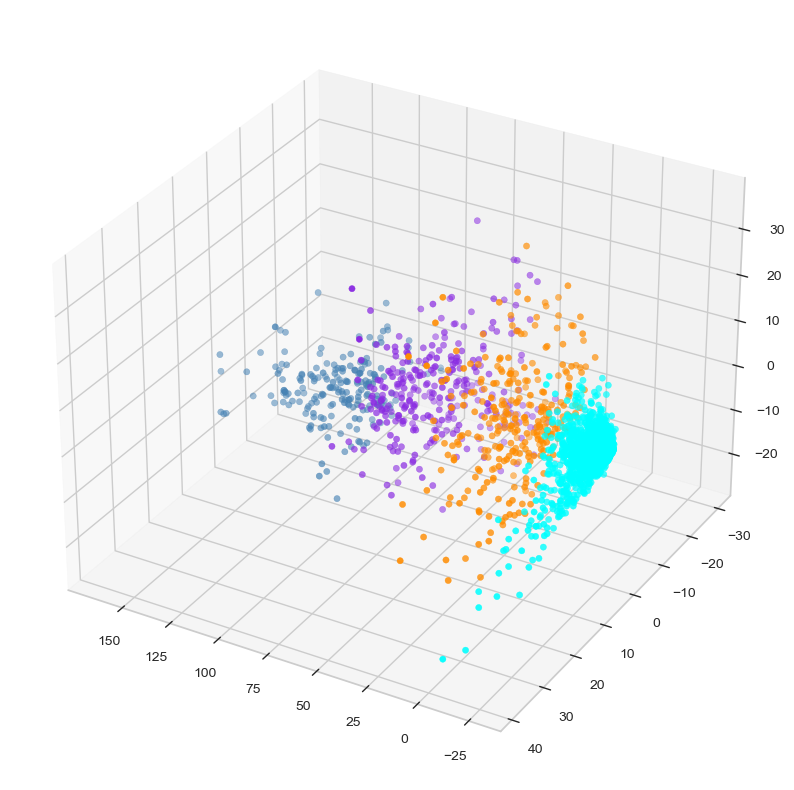

In [ ]:
KM_plot_k_int(30,120,4)

# Supervised Learning
We now delve into the heart of supervised machine learning methods to understand the dynamics of our gene expression data across the different sequencing techniques and cell types. The goal is to create models that are not only accurate but also offer insights into the nature of the data and the underlying biological processes. 

We have four datasets at our disposal - MCF7 and HCC1806, each sequenced with both SmartSeq and DropSeq techniques. For each of these datasets, we've employed a range of supervised learning algorithms: Support Vector Machines (SVM), Random Forests, and Logistic Regression. HCC1806 - DropSeq makes an exception for this, when we have also attempted a MLP Classifier.

The choice of these algorithms was influenced by their diverse strengths. SVMs are particularly adept at handling high-dimensional data, a common characteristic of gene expression datasets. Random Forests, on the other hand, are known for their robustness to overfitting and their ability to handle nonlinear relationships. Logistic Regression, while seemingly simpler, is a highly interpretable model that can provide insights into which genes are most informative in distinguishing between cell types.

To optimize the performance of each of these models, we undertook hyperparameter tuning. This process was carried out with a focus on achieving a fine balance between computational complexity and model performance. The underlying premise was to ensure that our models are not only accurate but also efficient - a crucial aspect when dealing with large-scale gene expression data.

In order to build a more powerful classifier, we exploited the power of ensemble learning: by leveraging the strengths of multiple learning algorithms, we aimed to construct an ensemble model that offers improved predictive performance and robustness. This integrative approach often helps to achieve better performance by capturing more complex underlying structures in the data.

Given the extent of our analysis, we have decided to maintain here a focus on a single dataset, i.e. MCF7 SmartSeq - this will allow us to delve deeper into the analytical process without compromising readability. However, please note that all analyses were conducted similarly across all datasets, and we will bring in results from other datasets where they offer interesting contrasts or confirmations.

In all classifiers we follow the same steps:

1. Tune the hyperparameters and select the best model;

2. Make some plots: decision boundary and accuracy vs number of features;

3. Performance on test set.


### Libraries and methods
Here, we list the libraries and methods we have used from Scikit's library. Then, we import dataset and add the target labels and we split into training and test sets. Test sets will be used in the evaluation section to assess the performance of the model on unseen data. In regards to the MCF7 dataset, we observe a relatively balanced distribution across the 2 labels. Therefore we believed accuracy was an appropriate evaluation metric for our case. Accuracy is not only straightforward and easy to interpret, but it's also widely recognized and used in the field. This will allow us to maintain clarity in our performance assessment while ensuring the results are still meaningful.

In [ ]:
#Importing the dataset and adding label
df = pd.read_csv("drive/MyDrive/Datasets/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", sep="\ ")
df = df.T
df['label'] = df.index.to_series().apply(lambda x: 'Normoxia' if 'Norm' in x else 'Hypoxia')

<ipython-input-6-c05a2eaee16d>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("drive/MyDrive/Datasets/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", sep="\ ")


In [ ]:
df["label"].value_counts() #pretty balanced! accuracy is fine

Normoxia    126
Hypoxia     124
Name: label, dtype: int64

In [ ]:
#Creating X and y
X = df.drop("label", axis = 1)
y = df["label"]

In [ ]:
#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(187, 3000) (187,) (63, 3000) (63,)


### 1. Logistic Regression

We use the standard Logistic Regression object from Scikit and we tune the coefficient C (inverse of regularization strength) within a set of values. Note that here we employed for cross validation the ```neg_log_loss`` scoring, as it is the model that deals with probabilistic outputs.

In [ ]:
log = LogisticRegression(solver='liblinear')
params_log = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

log_gs = GridSearchCV(log, params_log, cv=5, scoring=['neg_log_loss'], refit='neg_log_loss')
log_gs.fit(X_train, y_train)

In [ ]:
log_gs.best_estimator_

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
best_log = log_gs.best_estimator_

In [ ]:
log_gs.best_params_

{'C': 10, 'penalty': 'l1'}

This will be our chosen model for Logistic Regression: it will use l1 penalty and C equal to 10. As simple as it can seem, its performance is outstanding:

In [ ]:
acc_log = cross_val_score(best_log, X_train, y_train).mean() #will be used as weight in Ensemble Classifier

In [ ]:
ypredlog = best_log.predict(X_test)
accuracy_logistic = accuracy_score(y_test, ypredlog)
accuracy_logistic

1.0



We can also explore how the accuracy of the model behaves as we change the number of features we train it with. As a reference, look at this graph:

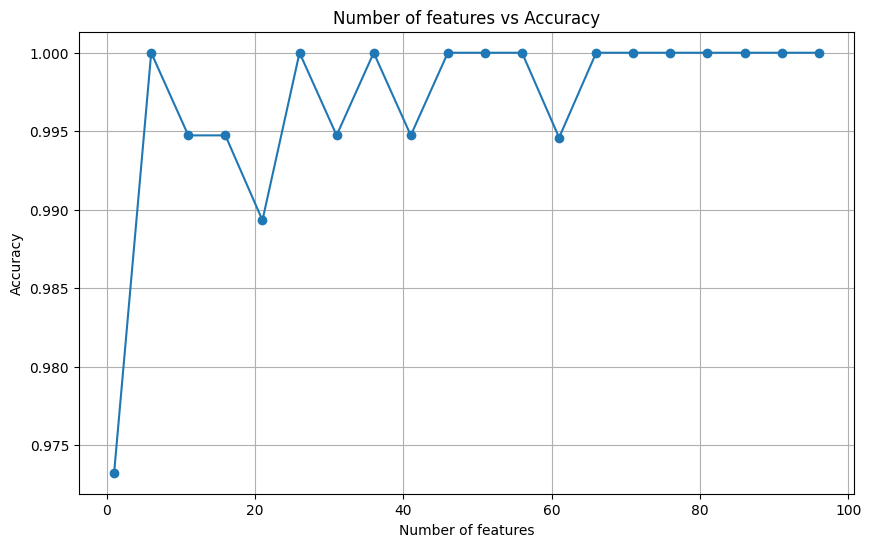

In [ ]:
features_range = range(1, 101, 5)
scores = []

for n in features_range:
    # Select top n features
    selector = SelectKBest(mutual_info_classif, k=n)
    X_new = selector.fit_transform(X_train, y_train)

    # Train the model
    model = LogisticRegression(C=10, penalty='l1', solver='liblinear')
    score = cross_val_score(model, X_new, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(features_range, scores, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Number of features vs Accuracy')
plt.grid(True)
plt.show()

In this analysis, we incrementally increased the number of features, or genes, utilized by the model in increments of five. These "best genes" were carefully selected based on their calculated mutual information, following the approach we employed in earlier sections of this project.

The model's performance accelerates rapidly, achieving perfect accuracy when about 70 genes are incorporated. This exceptional performance may be due to the excellent quality of our dataset. The genes included have been largely curated, specifically chosen for their explanatory power in distinguishing between hypoxia and normoxia conditions.

### 2. Support Vector Machines


Our next model is SVM, and to implement it we are going to use the ```SVC()``` class from Scikit.

The procedure for this section follows essentially the other ones, with a noteworthy addition of a discussion on precision-recall tradeoff. We believe this quick remark on error analysis enables a more comprehensive understanding of our model performance.

As SVM's complexity increases dramatically with dimensionality, we employed different strategies based on dataset size. For larger DropSeq datasets, we opted for Randomized Search over Grid Search for efficiency. Due to significant running times, we also had to simplify the process by reducing the number of hyperparameters to be tuned.

In [ ]:
# Define the parameter grid
param_grid = {'kernel': ['rbf', 'sigmoid', 'poly', 'linear'], 'C': [0.1, 1, 10, 100], 'gamma': [1, 10, 100], 'degree': [2, 3, 4, 5]}

# Create the SVM model
svm_model = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 270, in fit
    raise ValueError(
ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'gamma': [1, 10, 100],
                         'kernel': ['rbf', 'sigmoid', 'poly', 'linear']},
             scoring='accuracy')

In [ ]:
# Best model
best_svm = grid_search.best_estimator_

# Get the best parameter values
best_parameters = grid_search.best_params_
best_parameters

{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}

In [ ]:
# Accuracy on training data
cross_val_score(best_svm, X_train, y_train, cv=5, scoring="accuracy")

array([0.97368421, 1.        , 1.        , 1.        , 1.        ])

In [ ]:
acc_svm = cross_val_score(best_svm, X_train, y_train).mean() #will be used later

In [ ]:
# Confusion matrix
predictions = cross_val_predict(best_svm, X_train, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, predictions)
conf_matrix

array([[92,  0],
       [ 1, 94]])

In [ ]:
# With percentages
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = np.round(conf_matrix / row_sums, 2)
norm_conf_matrix

array([[1.  , 0.  ],
       [0.01, 0.99]])

In [ ]:
#Prediction and recall
print("Precision score =",conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1]))
print("Recall score =",conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]))

Precision score = 1.0
Recall score = 0.9894736842105263


**Comment on precision and recall**

In the context of our analysis, cells subjected to Hypoxia emerge as potential indicators of malign tumour. The paramount objective, therefore, would be to accurately flag these cells, considering their vital role in the onset of cancer.

Consequently, one strategy could involve orienting our classifier to prioritize the accurate identification of Hypoxia cells, even at the risk of occasional misclassifications (such as falsely labelling Normoxia cells as Hypoxia, the so-called *false positives*). This necessitates a classifier with modest recall, yet high precision.

However, this approach deviates from our initial assignment. Our principal task is to adeptly distinguish between the two cellular conditions: Hypoxia and Normoxia, without an overemphasis on either. Our mission remains unbiased discernment rather than prioritized detection, but this is something a doctor may want to consider.


**Decision Boundary**

In [ ]:
#Splitting dataset
df_train, df_test = train_test_split(df, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
df_train = df_train.transpose()

(187, 3000) (187,) (63, 3000) (63,)


In [ ]:
def find_word(string, word1, word2):

    string = ''.join(filter(str.isalpha, string))
    word1 = ''.join(filter(str.isalpha, word1))

    for i in range(len(string) - len(word1) + 1):
        if string[i:i+len(word1)] == word1:
            return word1
        
    return word2
    
def remove_double_quotes(word):
    return word.replace('"', '')

In [ ]:
df_train = df_train.rename(columns={"{}".format(i):"{}".format(remove_double_quotes(i)) for i in df_train.columns})
df_train = df_train.rename(columns={"{}".format(i):"{}".format(find_word(i, "Norm", "Hypo")) for i in df_train.columns})
df_train = df_train.transpose()
df_train = df_train.drop(columns=['label'])
df_train


"CYP1B1" "CYP1B1-AS1" "CYP1A1" "NDRG1" "DDIT4" "PFKFB3" "HK2" "AREG"  \
Hypo    14546         5799     6817     338    3631      460  1259      0   
Hypo     6734         2631      226    1203    6612     3025   961    142   
Hypo     4099         1583        0     401    1877     1691   274   1220   
Norm      196          102        1     243     266      278    78      1   
Hypo     4596         1689     5136    1496    4329     3666  3566     77   
...       ...          ...      ...     ...     ...      ...   ...    ...   
Hypo    29803        12073     8024    1414    7148     4941  2937    468   
Hypo     1338          554       14     634    3513     1360   303    558   
Hypo    12647         5175       61     608    4343     1175  1410     39   
Hypo     5954         2311        0    3884   12034     5986  5103      0   
Norm        0            0        0       0     196        3     0      1   

     "MYBL2" "ADM"  ... "CD27-AS1" "DNAI7" "MAFG" "LZTR1" "BCO2" "GRIK5"  \
Hypo      76     0  ...          0       0      0       0      0       0   
Hypo      32   838  ...         20       0     54      33      0       0   
Hypo     300   234  ...          0       0     26     151      0       0   
Norm     199     0  ...         79       0      1       0      0       0   
Hypo     173   124  ...          0       0      0       0      0       0   
...      ...   ...  ...        ...     ...    ...     ...    ...     ...   
Hypo     293   486  ...          0       0      3       0      0       0   
Hypo     178   994  ...          0       0     46       5      0       0   
Hypo       1  1946  ...         24       0     17       0      0       0   
Hypo       0  1242  ...          0       0    235       0      0       0   
Norm     461     0  ...          0       0     62       0      0       0   

     "SLC25A27" "DENND5A" "CDK5R1" "FAM13A-AS1"  
Hypo          0         0        0            0  
Hypo          0       109        0            0  
Hypo          0        58        0            0  
Norm          0        45       19            0  
Hypo          0        39        0            0  
...         ...       ...      ...          ...  
Hypo          0       129        0            0  
Hypo          0        14        0            0  
Hypo          0       101        0           22  
Hypo          0        10        0           21  
Norm          0        21        0            0  

[187 rows x 3000 columns]

In [ ]:
data_train_transpose = pd.DataFrame.transpose(df, copy=True)
data_train_transpose_lab = data_train_transpose.copy() #with labels
data_train_transpose_lab['label'] = data_train_transpose.index.to_series().apply(lambda x: 'Norm' if 'Norm' in x else 'Hypo')
# features = data_train_transpose.columns

In [ ]:
PCA2_data = PCA(n_components=2)
principalComponents_hcc2 = PCA2_data.fit_transform(df_train)
data_pr2 = pd.DataFrame(data = principalComponents_hcc2
             , columns = ['PC1', 'PC2'])
print('Explained variation per principal component: {}'.format(PCA2_data.explained_variance_ratio_)) 

Explained variation per principal component: [0.6446813  0.08999785]


In [ ]:
data_pr2_lab = data_pr2.copy()
data_pr2_lab["Condition"] = [i for i in range(len(df_train))]
for i in range(len(df_train)):
    if (df_train.index[i] == "Norm"):
        data_pr2_lab["Condition"][i] = 0
    elif (df_train.index[i] == "Hypo"):
        data_pr2_lab["Condition"][i] = 1
data_pr2_lab_copy = data_pr2_lab.copy()
data_pr2_lab_copy.drop('Condition', axis=1, inplace=True)

<ipython-input-15-4b9e55b262c8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pr2_lab["Condition"][i] = 1
<ipython-input-15-4b9e55b262c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pr2_lab["Condition"][i] = 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


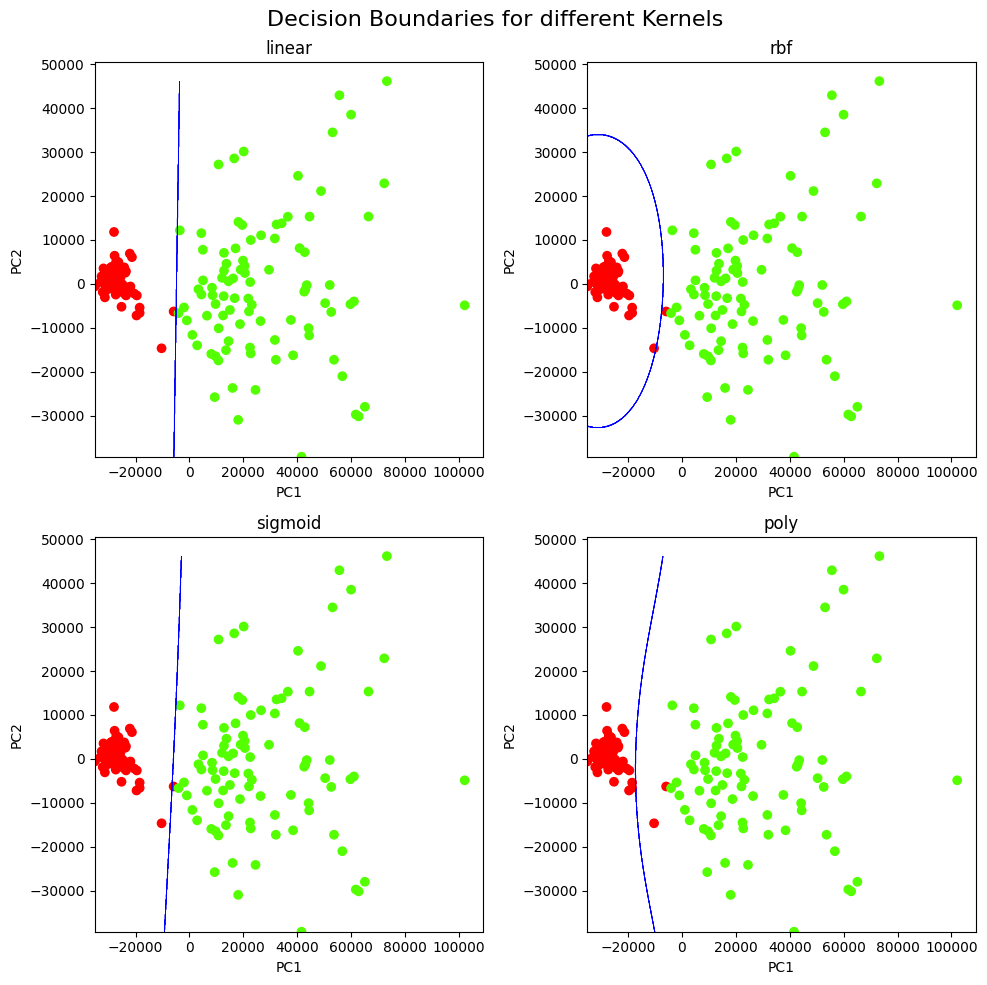

In [ ]:
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for idx, kernel in enumerate(kernels):
    svm_model = SVC(kernel=kernel, C=0.1)
    svm_model.fit(data_pr2_lab_copy, data_pr2_lab["Condition"])

    ax = axes[idx // 2][idx % 2]

    # Scatter plot of the data points (red points are cells in Normoxia, green ones are in Hypoxia)
    ax.scatter(x, y, c=data_pr2_lab["Condition"], cmap="prism")
    ax.set_title(kernel)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

    # Create a mesh grid of points
    x_min, x_max = data_pr2_lab.iloc[:, 0].min() - 1, data_pr2_lab.iloc[:, 0].max() + 1
    y_min, y_max = data_pr2_lab.iloc[:, 1].min() - 1, data_pr2_lab.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 100), np.arange(y_min, y_max, 100))

    # Obtain predicted class labels for each point in the mesh grid
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the margin
    ax.contour(xx, yy, Z, colors='b', linewidths=0.5)

plt.suptitle('Decision Boundaries for different Kernels', fontsize=16)

plt.tight_layout()
plt.show()

To analyze on the distinct properties of various kernels, we wanted to illustrate the decision boundaries rendered by each model. Given the necessity for visual representation in two dimensions, it was imperative to reduce our 3000-dimensional dataset to its two most informative axes. We accomplished this through Principal Component Analysis (PCA), selecting the two principal components that accounted for the maximum proportion of the dataset's variance. Thus, from the plots we can visualize the decision boundaries in a manner that encapsulates the critical features of our high-dimensional dataset.




**Testing the number of features**

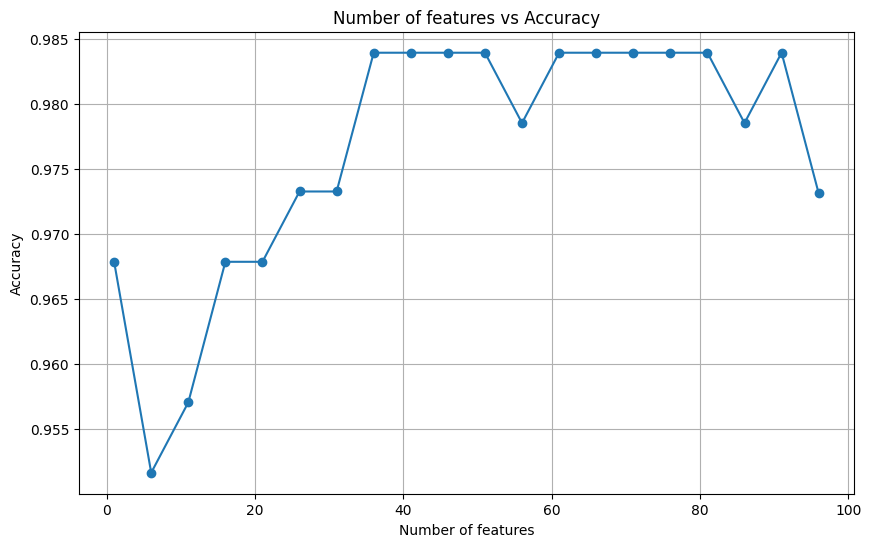

In [ ]:
features_range = range(1, 101, 5)
scores = []

for n in features_range:
    # Select top n features
    selector = SelectKBest(mutual_info_classif, k=n)
    X_new = selector.fit_transform(X_train, y_train)

    # Train the model
    model = best_svm
    score = cross_val_score(model, X_new, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(features_range, scores, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Number of features vs Accuracy')
plt.grid(True)
plt.show()

**Accuracy on test set**

In [ ]:
# Test on test
best_svm.fit(X_train, y_train)
test_accuracy = best_svm.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

### 3. Random Forest
We now move to Random Forest, which is itself a model of ensemble learning, as it bases its predictions on the set of Decision Trees it creates.

In [ ]:
rf = RandomForestClassifier(random_state=42)
params_rf = {"n_estimators": [25, 50, 100, 200, 300], "max_leaf_nodes" : np.arange(20, 100, 10)}
rf_gs = GridSearchCV(rf, params_rf, cv=5)

rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_leaf_nodes': array([20, 30, 40, 50, 60, 70, 80, 90]),
                         'n_estimators': [25, 50, 100, 200, 300]})

In [ ]:
rf_gs.best_estimator_

RandomForestClassifier(max_leaf_nodes=20, n_estimators=25, random_state=42)

In [ ]:
rf_gs.best_params_

{'max_leaf_nodes': 20, 'n_estimators': 25}

In [ ]:
best_rf = rf_gs.best_estimator_

In [ ]:
acc_rf = cross_val_score(best_rf, X_train, y_train).mean() #will be used later

1.0

Again, analyzing the number of features against the performance of the model, and the scores are quite impressive:

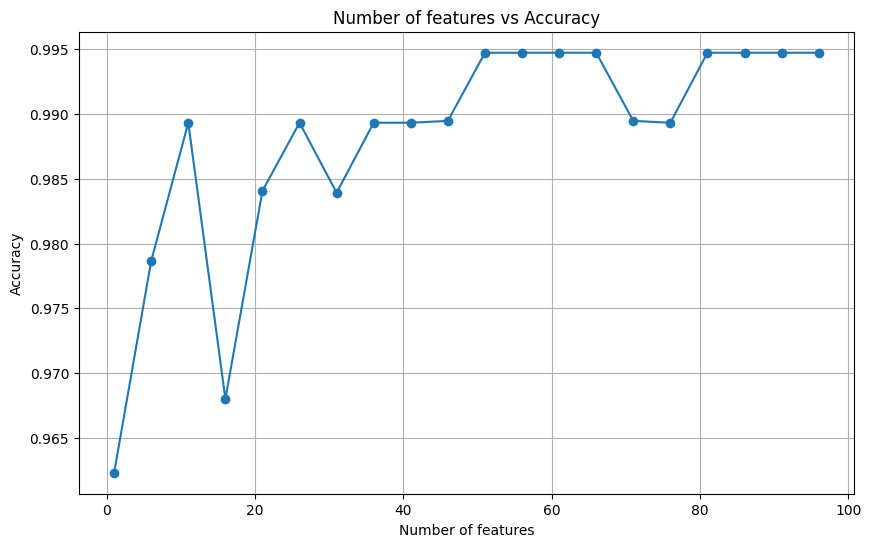

In [ ]:
scores = []

for n in features_range:
    # Select top n features
    selector = SelectKBest(mutual_info_classif, k=n)
    X_new = selector.fit_transform(X_train, y_train)

    # Train the model
    model = RandomForestClassifier(max_leaf_nodes = 20, n_estimators = 25, random_state = 42)
    score = cross_val_score(model, X_new, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(features_range, scores, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Number of features vs Accuracy')
plt.grid(True)
plt.show()


Trying to investigate which features (genes in our case) are of most importance, we employ the ```feature_importances_``` attribute of the trained RandomForest model. This attribute computes the mean decrease in impurity, which is observed when splitting the data based on a particular feature, averaged over all trees in the forest.

These genes stand out because their expression levels (either higher or lower than certain thresholds) provide pivotal information for the model to distinguish between cells that have been exposed to hypoxic versus normoxic conditions. Their higher importance scores indicate that changes in these genes' expression levels have a profound effect on the cell's response to oxygen levels, making them key players in our classification task.

In [ ]:
feature_importances = rf_gs.best_estimator_.feature_importances_
features = X.columns

# create DataFrame to hold the feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(feature_importance_df)

           Feature  Importance
103       "MT-CYB"    0.071049
477      "FAM162A"    0.068452
22         "BNIP3"    0.061850
869       "ARPC1B"    0.059913
1589        "DOLK"    0.052570
...            ...         ...
1023       "PYCR3"    0.000000
1024       "KANK3"    0.000000
1025       "KRT83"    0.000000
1026      "ZNF592"    0.000000
2999  "FAM13A-AS1"    0.000000

[3000 rows x 2 columns]


A few comments are noteworhy at this point:
- **MT-CYB (Cytochrome B)**: this gene is part of the mitochondrial DNA and it codes for a component of the electron transport chain, which is crucial for cellular respiration. Mutations in this gene have been associated with various diseases, including some forms of cancer <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1).
- **BNIP3**: this is a gene known for its role in regulating cell death and survival. It's implicated in hypoxia-induced cell death and its dysregulation has been associated with various types of cancer<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2).
- **ARPC1B**: This gene is a part of the ARP2/3 complex involved in the regulation of actin polymerization. It is essential for cell motility and integrity of the cytoskeleton. Even though a certain relationship between this specific gene and cancer has not been yet established, dysregulation of genes involved in cell motility can contribute to metastasis in cancer<a name="cite_ref-3"></a>[<sup>[3]</sup>](#cite_note-3):.

<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1): https://pubmed.ncbi.nlm.nih.gov/18245469/

<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2): https://pubmed.ncbi.nlm.nih.gov/16357180/

<a name="cite_ref-3"></a>[<sup>[3]</sup>](#cite_note-3): https://www.nature.com/articles/nrc.2018.15

When applying the same methodology to the other datasets, such as that of HCC1806, we identify another set of significant genes: **NDRG1**, well-known to be involved in stress responses, cell growth, and differentiation; it has been identified as a potential tumor suppressor gene and is often downregulated in several types of cancer<a name="cite_ref-4"></a>[<sup>[4]</sup>](#cite_note-4). **DDIT4**, familiar to regulate cell response to stress and is often upregulated in response to hypoxia<a name="cite_ref-5"></a>[<sup>[5]</sup>](#cite_note-5).

<a name="cite_ref-4"></a>[<sup>[4]</sup>](#cite_note-4): https://pubmed.ncbi.nlm.nih.gov/17316623/#:~:text=NDRG1%20is%20a%20hypoxia%2Dinducible,human%20hepatocellular%20carcinoma%20(HCC)

<a name="cite_ref-5"></a>[<sup>[5]</sup>](#cite_note-5): https://www.nature.com/articles/s41416-018-0368-3

### Ensembling

We now move to develop an ensemble learning framework. In order to prioritize those models that performed better we stratify the voting procedure in accordance with the mean accuracy exhibited by each model on the validation sets. This approach ensures a higher influence for the more accurate models within the ensemble structure.

In [ ]:
best_models = [('log', best_log), ('svm', best_svm), ('rf', best_rf)]
accuracies = [acc_log, acc_svm, acc_rf]
ensemble = VotingClassifier(best_models, weights=accuracies)
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1, penalty='l1',
                                                 solver='liblinear')),
                             ('svm',
                              SVC(C=0.1, degree=2, gamma=1, kernel='poly')),
                             ('rf',
                              RandomForestClassifier(max_leaf_nodes=20,
                                                     n_estimators=25,
                                                     random_state=42))],
                 weights=[1.0, 0.9682539682539683, 1.0])

In [ ]:
predictions = ensemble.predict(X_test)
accuracy_score(y_test, predictions)

1.0

## DropSeq HCC1808 's NN

We decided to devote a unique section of our project to the investigation of HCC1806 - DropSeq dataset. Indeed, this was the most challenging dataset we had to deal with. Its dimensionality (14682x3000) emerged as a substantial obstacle during model training. For the first time, we confronted with the difficult decision of trading off accuracy for computational efficiency. Despite enduring lengthy waits for the optimization of hyperparameters—sometimes stretching into hours—we strived to seek even slight improvements in accuracy: starting from 90% of accuracy with Random Forest, we managed to achieve 94% by finding the optimal combination of hyperparameters, although it took several hours (and cool temperature in the room!). Ultimately, our search led us to a more intricate model capable of capturing relationships that were elusive to our previous models. This was the motivation behind the implementation of a small Neural Network for this particular dataset.

In [ ]:
hcc = pd.read_csv("drive/MyDrive/Datasets/HCC1806_Filtered_Normalised_3000_Data_train.txt", sep="\ ")
hcc = hcc.T
hcc['label'] = hcc.index.to_series().apply(lambda x: 'Normoxia' if 'Norm' in x else 'Hypoxia')

<ipython-input-31-471380791b73>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  hcc = pd.read_csv("drive/MyDrive/Datasets/HCC1806_Filtered_Normalised_3000_Data_train.txt", sep="\ ")


In [ ]:
#Creating X and y
X = hcc.drop("label", axis = 1)
y = hcc["label"]

In [ ]:
#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11011, 3000) (11011,) (3671, 3000) (3671,)


In [ ]:
nn = MLPClassifier(random_state=42, batch_size='auto', max_iter=1000000, solver='sgd')

In [ ]:
# alert: this cell will run for approximately 25 minutes
params_grid = {'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)], 'learning_rate_init': [0.1, 0.01, 0.001]}
nn_gs = GridSearchCV(nn, params_grid, cv=3, verbose=2)
nn_gs.fit(X_train, y_train)

In [ ]:
# chosen MLP:
nn_best = MLPClassifier(random_state=42, batch_size='auto', max_iter=1000000, solver='sgd', hidden_layer_sizes=(100,), learning_rate_init=0.1)
nn_best.fit(X_train, y_train)

MLPClassifier(learning_rate_init=0.1, max_iter=1000000, random_state=42,
              solver='sgd')

In [ ]:
ypred = nn_best.predict(X_test)
accuracy_score(y_test, ypred)

0.9591391991283029

We are quite content with the outcome as we've achieved nearly 96% accuracy by merely adjusting a few hyperparameters of the Neural Network, a process that took about 20 minutes. In contrast, a similar 94% accuracy level was achieved previously, but it required several hours of waiting. This performance not only highlights the efficiency of the Neural Network model but also its efficacy in this specific application.

This model has been used, together with the usual others we have trained on HCC, to strive to correctly predict the *anonymous* dataset.

# Conclusion

Our group project has led us to a rigorous exploration of gene expression data, with the ultimate objective of distinguishing between hypoxic and normoxic conditions within single cells. This attempt encompassed a wide range of techniques and methodologies, from general EDA to principal component analysis, from clustering to predictive models such as logistic regression, support vector machines, random forests, neural networks, and finally ensemble learning.
We tried to make judicious decisions along the way, such as adopting randomized search over grid search for large datasets to optimize computational efficiency and time. We also highlighted the trade-offs between precision and recall. An intriguing facet of our project was the extraction of feature importance, enabling us to identify genes that play a pivotal role in hypoxic conditions. This not only offers intriguing insights into the biological processes but also holds potential for further research.
The ensemble learning approach integrated the strengths of various classifiers and reinforced prediction accuracy, with each model's vote being weighted according to its performance. This strategy lent our model robustness, enhancing our confidence in its predictive power.
Through this project, we have not only tested our data analysis and machine learning skills but also gained insights into the intricate world of genetics and cancer biology.